# Dataset Study

Data loaded successfully!
Dew Meteorological data shape: (4, 9)
Dew Chemical data shape: (20, 5) (Dataframe kept but not plotted)
✓ Meteorological plot saved as 'dew_meteorological_analysis.png'
✓ Sample distribution plot saved as 'dew_sample_distribution.png'

DEW DATASET SUMMARY
Total Dew samples: 154


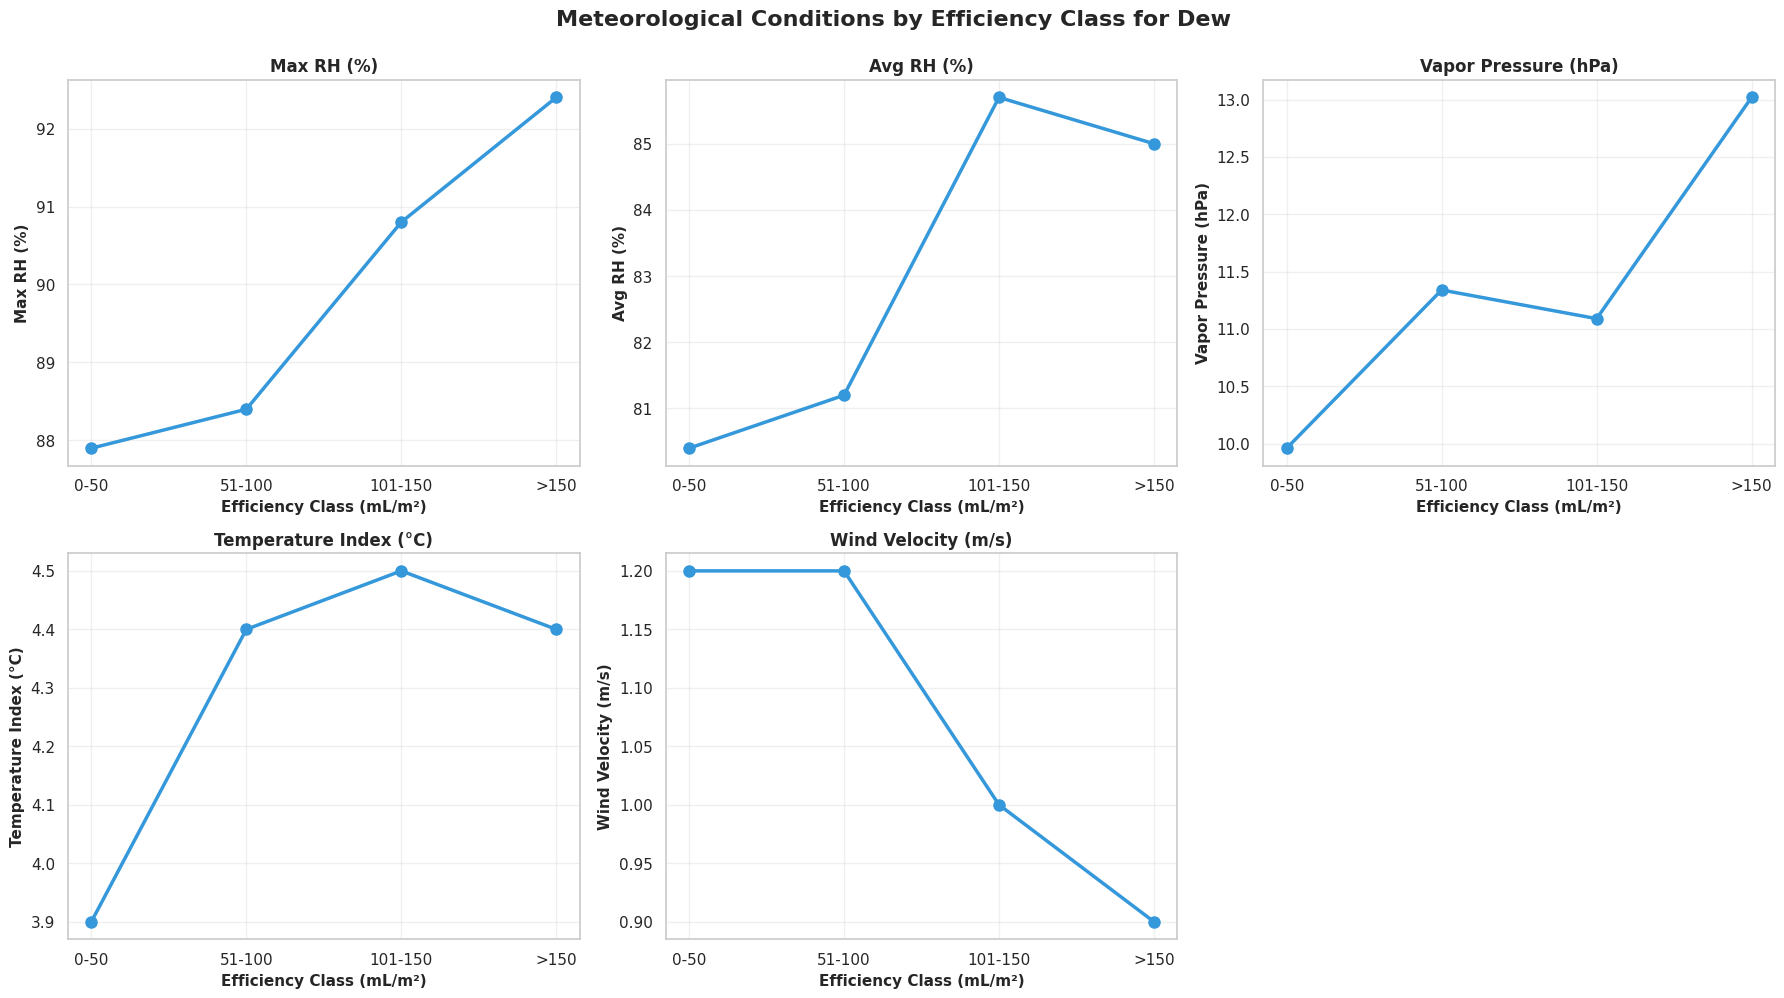

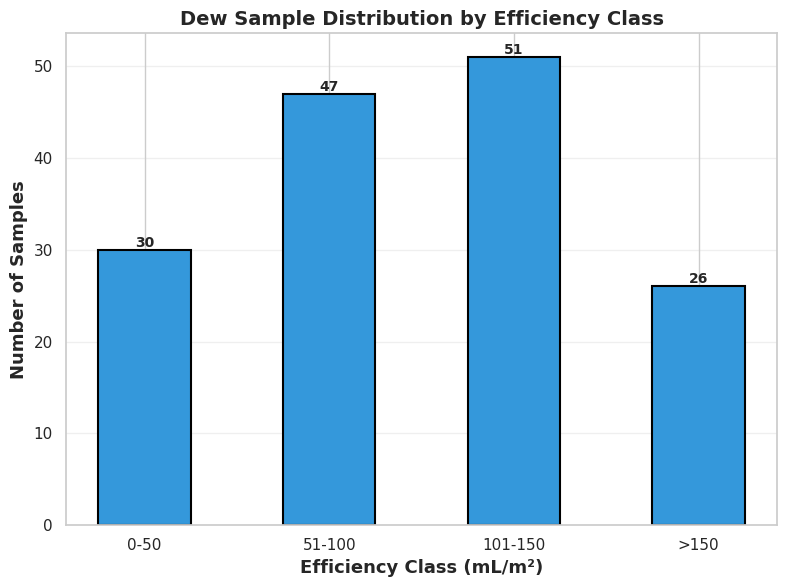

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import numpy as np

# Set style
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 11

# --- Data from Table 1 (dew_hoarfrost_met_by_efficiency.csv) ---
# Keeping only 'Dew' data
table1_csv = """Deposit_Type,Efficiency_Class_mL_m-2,Statistic,N,RH_max_percent,RH_avg_percent,e_hPa,TI_C,WV_m_s
Dew,0-50,Avg,30,87.9,80.4,9.96,3.9,1.2
Dew,0-50,SD,,6.3,9.8,3.43,1.8,0.6
Dew,51-100,Avg,47,88.4,81.2,11.34,4.4,1.2
Dew,51-100,SD,,5.0,8.5,3.40,1.6,0.7
Dew,101-150,Avg,51,90.8,85.7,11.09,4.5,1.0
Dew,101-150,SD,,4.5,6.1,3.18,1.3,0.5
Dew,>150,Avg,26,92.4,85.0,13.02,4.4,0.9
Dew,>150,SD,,2.4,17.7,3.08,0.9,0.5
Dew,Total,Avg,154,89.7,83.2,11.26,4.3,1.1
Dew,Total,SD,,5.1,10.3,3.44,1.5,0.6
"""

# --- Data from Table 3 (dew_hoarfrost_chem_by_efficiency.csv) ---
# Keeping only 'Dew' data (but this data will no longer be used for plotting)
table3_csv = """Deposit_Type,Efficiency_Class_mL_m-2,Statistic,Parameter,Value
Dew,0-50,Avg,Cl_meq_L-1,0.108
Dew,0-50,Med,Cl_meq_L-1,0.056
Dew,51-100,Avg,Cl_meq_L-1,0.044
Dew,51-100,Med,Cl_meq_L-1,0.033
Dew,101-150,Avg,Cl_meq_L-1,0.031
Dew,101-150,Med,Cl_meq_L-1,0.027
Dew,>150,Avg,Cl_meq_L-1,0.023
Dew,>150,Med,Cl_meq_L-1,0.015
Dew,0-50,Avg,NO3_meq_L-1,0.222
Dew,0-50,Med,NO3_meq_L-1,0.185
Dew,51-100,Avg,NO3_meq_L-1,0.137
Dew,51-100,Med,NO3_meq_L-1,0.096
Dew,101-150,Avg,NO3_meq_L-1,0.116
Dew,101-150,Med,NO3_meq_L-1,0.077
Dew,>150,Avg,NO3_meq_L-1,0.058
Dew,>150,Med,NO3_meq_L-1,0.054
Dew,0-50,Avg,SO4_meq_L-1,0.206
Dew,0-50,Med,SO4_meq_L-1,0.147
Dew,51-100,Avg,SO4_meq_L-1,0.129
Dew,51-100,Med,SO4_meq_L-1,0.115
Dew,101-150,Avg,SO4_meq_L-1,0.065
Dew,101-150,Med,SO4_meq_L-1,0.06
Dew,>150,Avg,SO4_meq_L-1,0.047
Dew,>150,Med,SO4_meq_L-1,0.036
Dew,0-50,Avg,EC_uS_cm-1,62.8
Dew,0-50,Med,EC_uS_cm-1,60.1
Dew,51-100,Avg,EC_uS_cm-1,52
Dew,51-100,Med,EC_uS_cm-1,40.9
Dew,101-150,Avg,EC_uS_cm-1,44.2
Dew,101-150,Med,EC_uS_cm-1,30.7
Dew,>150,Avg,EC_uS_cm-1,21.3
Dew,>150,Med,EC_uS_cm-1,25.5
Dew,0-50,Avg,pH,4.24
Dew,0-50,Med,pH,4.88
Dew,51-100,Avg,pH,4.57
Dew,51-100,Med,pH,5.46
Dew,101-150,Avg,pH,4.38
Dew,101-150,Med,pH,5.36
Dew,>150,Avg,pH,5.74
Dew,>150,Med,pH,5.0
"""

# Load data
df_table1 = pd.read_csv(io.StringIO(table1_csv))
# df_table3 is still loaded but its corresponding dataframe df_chem is not used later
df_table3 = pd.read_csv(io.StringIO(table3_csv))

# Filter for "Avg" rows and efficiency classes (exclude "Total") AND only 'Dew'
df_met = df_table1[(df_table1['Statistic'] == 'Avg') & (df_table1['Efficiency_Class_mL_m-2'] != 'Total') & (df_table1['Deposit_Type'] == 'Dew')].copy()
# df_chem definition is kept but won't be used
df_chem = df_table3[(df_table3['Statistic'] == 'Avg') & (df_table3['Deposit_Type'] == 'Dew')].copy()

# Create efficiency order
efficiency_order = ['0-50', '51-100', '101-150', '>150']
df_met['Efficiency_Class_mL_m-2'] = pd.Categorical(df_met['Efficiency_Class_mL_m-2'], categories=efficiency_order, ordered=True)
df_chem['Efficiency_Class_mL_m-2'] = pd.Categorical(df_chem['Efficiency_Class_mL_m-2'], categories=efficiency_order, ordered=True)

print("Data loaded successfully!")
print(f"Dew Meteorological data shape: {df_met.shape}")
print(f"Dew Chemical data shape: {df_chem.shape} (Dataframe kept but not plotted)")

# --- Figure 1: Meteorological Variables by Efficiency for Dew ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Meteorological Conditions by Efficiency Class for Dew', fontsize=16, fontweight='bold', y=0.995)

met_vars = ['RH_max_percent', 'RH_avg_percent', 'e_hPa', 'TI_C', 'WV_m_s']
var_labels = ['Max RH (%)', 'Avg RH (%)', 'Vapor Pressure (hPa)', 'Temperature Index (°C)', 'Wind Velocity (m/s)']
colors = {'Dew': '#3498db'} # Removed 'Hoarfrost' color

axes = axes.flatten()
for idx, (var, label) in enumerate(zip(met_vars, var_labels)):
    ax = axes[idx]
    # Filter data for 'Dew'
    data = df_met[df_met['Deposit_Type'] == 'Dew']
    ax.plot(data['Efficiency_Class_mL_m-2'].astype(str), data[var],
            marker='o', linewidth=2.5, markersize=8, label='Dew',
            color=colors['Dew'])

    ax.set_xlabel('Efficiency Class (mL/m²)', fontsize=11, fontweight='bold')
    ax.set_ylabel(label, fontsize=11, fontweight='bold')
    ax.set_title(label, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

# Remove extra subplot
axes[-1].remove()

plt.tight_layout()
plt.savefig('dew_meteorological_analysis.png', dpi=150, bbox_inches='tight')
print("✓ Meteorological plot saved as 'dew_meteorological_analysis.png'")
# plt.show() # Commented out plt.show() for script execution environment

# --- Figure 2: Chemical Composition by Efficiency Class (REMOVED) ---
# --- Figure 3: Sample Counts by Efficiency Class for Dew ---
fig, ax = plt.subplots(figsize=(8, 6)) # Adjusted size for single type

sample_data = df_table1[(df_table1['Statistic'] == 'Avg') & (df_table1['Efficiency_Class_mL_m-2'] != 'Total') & (df_table1['Deposit_Type'] == 'Dew')].copy()
sample_data = sample_data[sample_data['N'].notna()]

x = np.arange(len(efficiency_order))
width = 0.5 # Wider bar since it's only one

dew_counts = [sample_data[(sample_data['Efficiency_Class_mL_m-2'] == eff)]['N'].values[0]
              if len(sample_data[(sample_data['Efficiency_Class_mL_m-2'] == eff)]) > 0 else 0
              for eff in efficiency_order]

bars1 = ax.bar(x, dew_counts, width, label='Dew', color='#3498db', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Efficiency Class (mL/m²)', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Samples', fontsize=13, fontweight='bold')
ax.set_title('Dew Sample Distribution by Efficiency Class', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(efficiency_order)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('dew_sample_distribution.png', dpi=150, bbox_inches='tight')
print("✓ Sample distribution plot saved as 'dew_sample_distribution.png'")
# plt.show() # Commented out plt.show() for script execution environment

print("\n" + "="*70)
print("DEW DATASET SUMMARY")
print("="*70)
total_dew = df_table1[(df_table1['Deposit_Type'] == 'Dew') & (df_table1['Efficiency_Class_mL_m-2'] == 'Total')]['N'].values[0]
print(f"Total Dew samples: {int(total_dew)}")
print("="*70)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Set a consistent, professional style for the plots
sns.set_theme(style="whitegrid")

# --- Data from Table 1 (dew_hoarfrost_met_by_efficiency.csv) ---
table1_csv = """Deposit_Type,Efficiency_Class_mL_m-2,Statistic,N,RH_max_percent,RH_avg_percent,e_hPa,TI_C,WV_m_s
Dew,0-50,Avg,30,87.9,80.4,9.96,3.9,1.2
Dew,0-50,SD,,6.3,9.8,3.43,1.8,0.6
Dew,51-100,Avg,47,88.4,81.2,11.34,4.4,1.2
Dew,51-100,SD,,5.0,8.5,3.40,1.6,0.7
Dew,101-150,Avg,51,90.8,85.7,11.09,4.5,1.0
Dew,101-150,SD,,4.5,6.1,3.18,1.3,0.5
Dew,>150,Avg,26,92.4,85.0,13.02,4.4,0.9
Dew,>150,SD,,2.4,17.7,3.08,0.9,0.5
Dew,Total,Avg,154,89.7,83.2,11.26,4.3,1.1
Dew,Total,SD,,5.1,10.3,3.44,1.5,0.6
Hoarfrost,0-50,Avg,11,86.6,78.9,5.08,3.0,2.2
Hoarfrost,0-50,SD,,8.0,8.3,1.69,1.8,1.1
Hoarfrost,51-100,Avg,30,88.3,81.9,4.69,4.5,1.3
Hoarfrost,51-100,SD,,6.2,8.8,1.90,2.2,0.9
Hoarfrost,101-150,Avg,30,90.4,85.1,6.19,4.9,1.1
Hoarfrost,101-150,SD,,7.5,10.6,1.89,1.7,1.0
Hoarfrost,>150,Avg,20,92.4,88.6,6.22,4.2,1.2
Hoarfrost,>150,SD,,3.6,5.8,1.28,1.3,0.6
Hoarfrost,Total,Avg,91,89.7,84.0,5.57,4.4,1.3
Hoarfrost,Total,SD,,6.6,9.3,1.86,1.9,1.0
"""

# --- Data from Table 2 (dew_hoarfrost_met_by_chemistry.csv) ---
table2_csv = """Deposit_Type,Parameter,Quartile,Statistic,RH_max_percent,RH_avg_percent,e_hPa,TI_C,WV_m_s
Dew,pH,<Q1,Avg,88.1,80.4,10.2,4.5,1.2
Dew,pH,<Q1,SD,6.2,9.5,3.1,1.9,0.7
Dew,pH,>Q3,Avg,90.9,86.3,11.4,4.3,1.1
Dew,pH,>Q3,SD,4.6,6.5,3.8,1.4,0.7
Dew,EC,<Q1,Avg,92.5,86.0,12.5,4.4,0.9
Dew,EC,<Q1,SD,2.0,14.2,3.4,1.1,0.4
Dew,EC,>Q3,Avg,87.4,79.9,9.9,4.3,1.3
Dew,EC,>Q3,SD,6.0,9.1,2.9,1.9,0.7
Dew,Ca2+,<Q1,Avg,91.9,85.1,12.4,4.1,0.9
Dew,Ca2+,<Q1,SD,2.7,14.4,3.3,1.3,0.5
Dew,Ca2+,>Q3,Avg,86.8,79.5,9.8,4.2,1.2
Dew,Ca2+,>Q3,SD,6.2,9.2,2.8,1.9,0.6
Dew,SO4,<Q1,Avg,91.6,84.6,12.6,4.6,0.9
Dew,SO4,<Q1,SD,3.5,14.8,3.3,1.0,0.4
Dew,SO4,>Q3,Avg,87.7,80.7,10.4,4.0,1.2
Dew,SO4,>Q3,SD,5.9,9.4,3.1,1.8,0.6
Dew,NO3,<Q1,Avg,91.3,84.9,11.6,4.0,1.1
Dew,NO3,<Q1,SD,4.4,14.9,3.9,1.3,0.7
Dew,NO3,>Q3,Avg,86.8,79.5,10.0,4.4,1.2
Dew,NO3,>Q3,SD,6.2,8.8,3.0,1.8,0.6
Dew,Cl,<Q1,Avg,90.9,83.4,12.4,4.6,1.0
Dew,Cl,<Q1,SD,3.8,14.5,3.1,1.2,0.5
Dew,Cl,>Q3,Avg,88.4,81.9,9.2,3.7,1.4
Dew,Cl,>Q3,SD,6.1,10.0,3.0,1.9,0.7
Hoarfrost,pH,<Q1,Avg,89.6,82.5,6.0,4.1,1.5
Hoarfrost,pH,<Q1,SD,4.9,7.9,1.8,2.0,1.4
Hoarfrost,pH,>Q3,Avg,90.8,85.7,5.6,4.7,1.4
Hoarfrost,pH,>Q3,SD,6.3,9.4,1.6,1.7,1.0
Hoarfrost,EC,<Q1,Avg,93.2,89.5,6.0,4.7,0.9
Hoarfrost,EC,<Q1,SD,3.0,5.7,1.2,1.3,0.5
Hoarfrost,EC,>Q3,Avg,86.7,79.0,5.1,3.4,1.8
Hoarfrost,EC,>Q3,SD,6.8,8.2,2.2,2.5,1.2
Hoarfrost,Ca2+,<Q1,Avg,93.2,90.4,6.1,4.8,0.9
Hoarfrost,Ca2+,<Q1,SD,3.0,5.0,1.2,1.3,0.5
Hoarfrost,Ca2+,>Q3,Avg,84.0,76.2,5.0,3.7,1.7
Hoarfrost,Ca2+,>Q3,SD,9.2,11.0,2.3,2.5,1.1
Hoarfrost,SO4,<Q1,Avg,90.4,85.2,6.0,4.9,1.1
Hoarfrost,SO4,<Q1,SD,7.8,10.5,1.7,1.5,0.9
Hoarfrost,SO4,>Q3,Avg,86.3,79.2,4.4,3.0,1.8
Hoarfrost,SO4,>Q3,SD,7.5,10.2,2.1,2.1,1.1
Hoarfrost,NO3,<Q1,Avg,91.8,87.7,5.4,4.6,1.1
Hoarfrost,NO3,<Q1,SD,3.9,7.0,1.3,1.4,0.5
Hoarfrost,NO3,>Q3,Avg,86.9,79.0,6.5,4.7,1.5
Hoarfrost,NO3,>Q3,SD,8.8,11.0,1.7,2.1,1.2
Hoarfrost,Cl,<Q1,Avg,91.9,88.2,7.1,5.3,0.7
Hoarfrost,Cl,<Q1,SD,7.4,9.7,1.4,1.3,0.3
Hoarfrost,Cl,>Q3,Avg,87.4,81.3,4.2,3.0,1.7
Hoarfrost,Cl,>Q3,SD,6.7,8.1,1.8,2.3,0.7
"""

# --- Data from Table 3 (dew_hoarfrost_chem_by_efficiency.csv) ---
# Note: Renamed 'EC' parameter to 'EC_uS_cm-1' to match the CSV from the previous turn.
table3_csv = """Deposit_Type,Efficiency_Class_mL_m-2,Statistic,Parameter,Value
Dew,0-50,Avg,Cl_meq_L-1,0.108
Dew,0-50,Med,Cl_meq_L-1,0.056
Dew,51-100,Avg,Cl_meq_L-1,0.044
Dew,51-100,Med,Cl_meq_L-1,0.033
Dew,101-150,Avg,Cl_meq_L-1,0.031
Dew,101-150,Med,Cl_meq_L-1,0.027
Dew,>150,Avg,Cl_meq_L-1,0.023
Dew,>150,Med,Cl_meq_L-1,0.015
Dew,0-50,Avg,NO3_meq_L-1,0.222
Dew,0-50,Med,NO3_meq_L-1,0.185
Dew,51-100,Avg,NO3_meq_L-1,0.137
Dew,51-100,Med,NO3_meq_L-1,0.096
Dew,101-150,Avg,NO3_meq_L-1,0.116
Dew,101-150,Med,NO3_meq_L-1,0.077
Dew,>150,Avg,NO3_meq_L-1,0.058
Dew,>150,Med,NO3_meq_L-1,0.054
Dew,0-50,Avg,SO4_meq_L-1,0.206
Dew,0-50,Med,SO4_meq_L-1,0.147
Dew,51-100,Avg,SO4_meq_L-1,0.129
Dew,51-100,Med,SO4_meq_L-1,0.115
Dew,101-150,Avg,SO4_meq_L-1,0.065
Dew,101-150,Med,SO4_meq_L-1,0.06
Dew,>150,Avg,SO4_meq_L-1,0.047
Dew,>150,Med,SO4_meq_L-1,0.036
Dew,0-50,Avg,EC_uS_cm-1,62.8
Dew,0-50,Med,EC_uS_cm-1,60.1
Dew,51-100,Avg,EC_uS_cm-1,52
Dew,51-100,Med,EC_uS_cm-1,40.9
Dew,101-150,Avg,EC_uS_cm-1,44.2
Dew,101-150,Med,EC_uS_cm-1,30.7
Dew,>150,Avg,EC_uS_cm-1,21.3
Dew,>150,Med,EC_uS_cm-1,25.5
Dew,0-50,Avg,pH,4.24
Dew,0-50,Med,pH,4.88
Dew,51-100,Avg,pH,4.57
Dew,51-100,Med,pH,5.46
Dew,101-150,Avg,pH,4.38
Dew,101-150,Med,pH,5.36
Dew,>150,Avg,pH,5.74
Dew,>150,Med,pH,5.0
Hoarfrost,0-50,Avg,Cl_meq_L-1,0.239
Hoarfrost,0-50,Med,Cl_meq_L-1,0.217
Hoarfrost,51-100,Avg,Cl_meq_L-1,0.136
Hoarfrost,51-100,Med,Cl_meq_L-1,0.09
Hoarfrost,101-150,Avg,Cl_meq_L-1,0.06
Hoarfrost,101-150,Med,Cl_meq_L-1,0.031
Hoarfrost,>150,Avg,Cl_meq_L-1,0.048
Hoarfrost,>150,Med,Cl_meq_L-1,0.036
Hoarfrost,0-50,Avg,NO3_meq_L-1,0.115
Hoarfrost,0-50,Med,NO3_meq_L-1,0.092
Hoarfrost,51-100,Avg,NO3_meq_L-1,0.033
Hoarfrost,51-100,Med,NO3_meq_L-1,0.104
Hoarfrost,101-150,Avg,NO3_meq_L-1,0.06
Hoarfrost,101-150,Med,NO3_meq_L-1,0.103
Hoarfrost,>150,Avg,NO3_meq_L-1,0.024
Hoarfrost,>150,Med,NO3_meq_L-1,0.041
Hoarfrost,0-50,Avg,SO4_meq_L-1,0.138
Hoarfrost,0-50,Med,SO4_meq_L-1,0.103
Hoarfrost,51-100,Avg,SO4_meq_L-1,0.07
Hoarfrost,51-100,Med,SO4_meq_L-1,0.06
Hoarfrost,101-150,Avg,SO4_meq_L-1,0.045
Hoarfrost,101-150,Med,SO4_meq_L-1,0.045
Hoarfrost,>150,Avg,SO4_meq_L-1,0.043
Hoarfrost,>150,Med,SO4_meq_L-1,0.017
Hoarfrost,0-50,Avg,EC_uS_cm-1,64.9
Hoarfrost,0-50,Med,EC_uS_cm-1,74.1
Hoarfrost,51-100,Avg,EC_uS_cm-1,58.8
Hoarfrost,51-100,Med,EC_uS_cm-1,46.3
Hoarfrost,101-150,Avg,EC_uS_cm-1,38.8
Hoarfrost,101-150,Med,EC_uS_cm-1,36.0
Hoarfrost,>150,Avg,EC_uS_cm-1,31.9
Hoarfrost,>150,Med,EC_uS_cm-1,26.7
Hoarfrost,0-50,Avg,pH,4.7
Hoarfrost,0-50,Med,pH,6.03
Hoarfrost,51-100,Avg,pH,4.58
Hoarfrost,51-100,Med,pH,6.5
Hoarfrost,101-150,Avg,pH,4.76
Hoarfrost,101-150,Med,pH,6.45
Hoarfrost,>150,Avg,pH,5.56
Hoarfrost,>150,Med,pH,6.46
"""

# Load the data from the string variables
df_table1 = pd.read_csv(io.StringIO(table1_csv))
df_table2 = pd.read_csv(io.StringIO(table2_csv))
df_table3 = pd.read_csv(io.StringIO(table3_csv))

print("Data loaded successfully.")
print(f"Table 1 shape: {df_table1.shape}")
print(f"Table 2 shape: {df_table2.shape}")
print(f"Table 3 shape: {df_table3.shape}")

Data loaded successfully.
Table 1 shape: (20, 9)
Table 2 shape: (48, 9)
Table 3 shape: (80, 5)


# Independent Variable Relationship Visualization


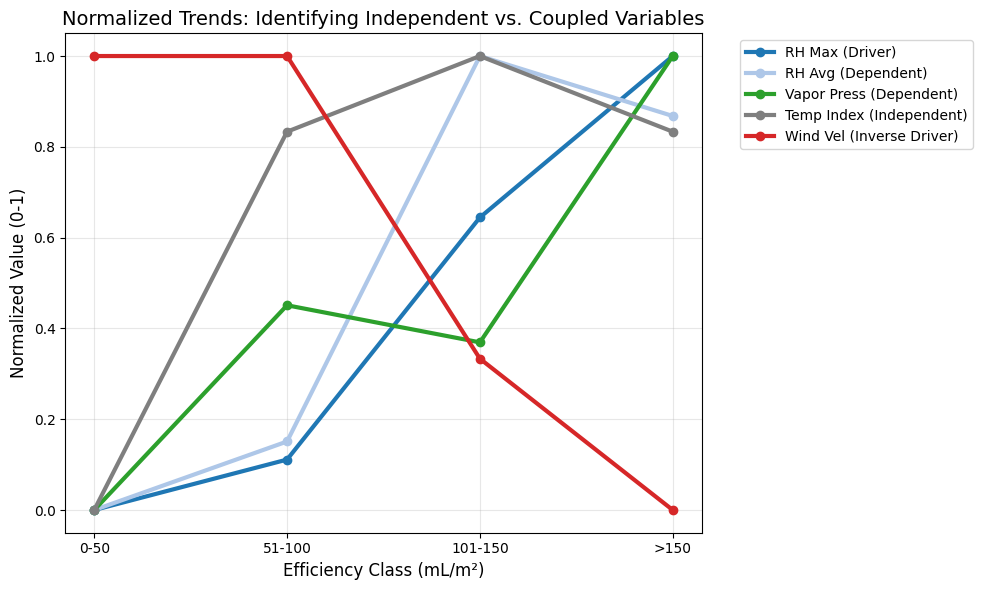

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np

# Load Data
table1_csv = """Deposit_Type,Efficiency_Class_mL_m-2,Statistic,N,RH_max_percent,RH_avg_percent,e_hPa,TI_C,WV_m_s
Dew,0-50,Avg,30,87.9,80.4,9.96,3.9,1.2
Dew,51-100,Avg,47,88.4,81.2,11.34,4.4,1.2
Dew,101-150,Avg,51,90.8,85.7,11.09,4.5,1.0
Dew,>150,Avg,26,92.4,85.0,13.02,4.4,0.9
"""
df_means = pd.read_csv(io.StringIO(table1_csv))

# Prepare for plotting
vars_cols = ['RH_max_percent', 'RH_avg_percent', 'e_hPa', 'TI_C', 'WV_m_s']
labels = ['RH Max (Driver)', 'RH Avg (Dependent)', 'Vapor Press (Dependent)', 'Temp Index (Independent)', 'Wind Vel (Inverse Driver)']
colors = ['#1f77b4', '#aec7e8', '#2ca02c', '#7f7f7f', '#d62728']

plt.figure(figsize=(10, 6))

# Normalize values to 0-1 range to compare trends
for i, col in enumerate(vars_cols):
    vals = df_means[col].values
    norm_vals = (vals - vals.min()) / (vals.max() - vals.min())
    plt.plot(df_means['Efficiency_Class_mL_m-2'], norm_vals, marker='o', linewidth=3, label=labels[i], color=colors[i])

plt.title('Normalized Trends: Identifying Independent vs. Coupled Variables', fontsize=14)
plt.xlabel('Efficiency Class (mL/m²)', fontsize=12)
plt.ylabel('Normalized Value (0-1)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('variable_relationships.png', dpi=120)

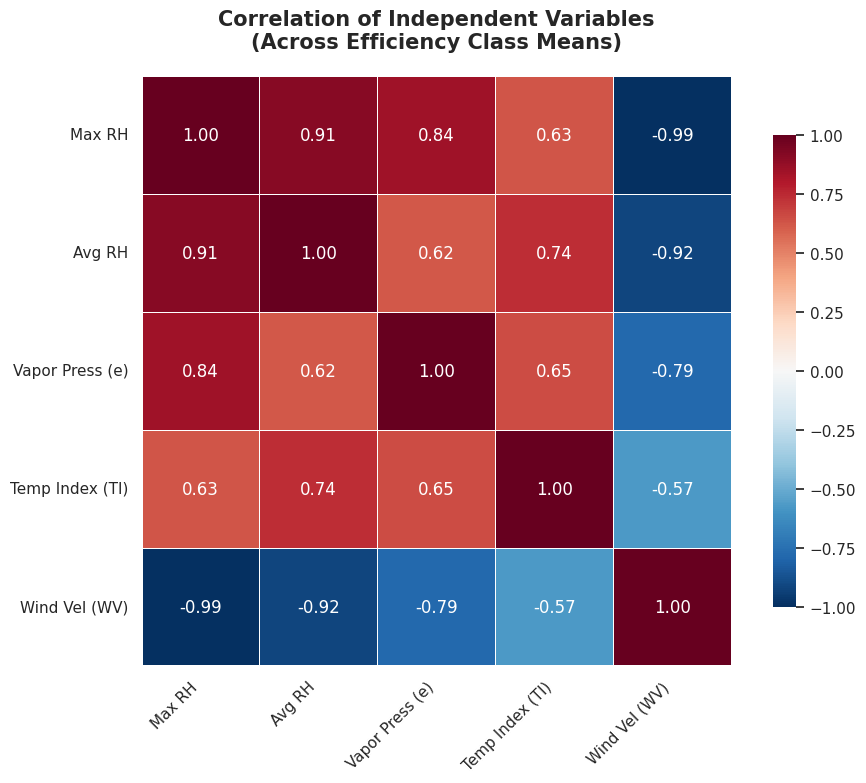

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

# --- 1. Load the Data ---
# We manually define the CSV data here so this block is self-contained
table1_csv = """Deposit_Type,Efficiency_Class_mL_m-2,Statistic,N,RH_max_percent,RH_avg_percent,e_hPa,TI_C,WV_m_s
Dew,0-50,Avg,30,87.9,80.4,9.96,3.9,1.2
Dew,0-50,SD,,6.3,9.8,3.43,1.8,0.6
Dew,51-100,Avg,47,88.4,81.2,11.34,4.4,1.2
Dew,51-100,SD,,5.0,8.5,3.40,1.6,0.7
Dew,101-150,Avg,51,90.8,85.7,11.09,4.5,1.0
Dew,101-150,SD,,4.5,6.1,3.18,1.3,0.5
Dew,>150,Avg,26,92.4,85.0,13.02,4.4,0.9
Dew,>150,SD,,2.4,17.7,3.08,0.9,0.5
Dew,Total,Avg,154,89.7,83.2,11.26,4.3,1.1
Dew,Total,SD,,5.1,10.3,3.44,1.5,0.6
"""

# Read data
df = pd.read_csv(io.StringIO(table1_csv))

# --- 2. Filter Data ---
# We want only "Dew", only "Avg" statistics, and we remove the "Total" row
df_means = df[
    (df['Deposit_Type'] == 'Dew') &
    (df['Statistic'] == 'Avg') &
    (df['Efficiency_Class_mL_m-2'] != 'Total')
].copy()

# Sort by efficiency class to ensure logical progression if needed
# (Mapping custom sort order)
efficiency_order = ['0-50', '51-100', '101-150', '>150']
df_means['Efficiency_Class_mL_m-2'] = pd.Categorical(
    df_means['Efficiency_Class_mL_m-2'],
    categories=efficiency_order,
    ordered=True
)
df_means = df_means.sort_values('Efficiency_Class_mL_m-2')

# --- 3. Compute Correlation ---
# Select the 5 independent variables
independent_vars = ['RH_max_percent', 'RH_avg_percent', 'e_hPa', 'TI_C', 'WV_m_s']
labels = ['Max RH', 'Avg RH', 'Vapor Press (e)', 'Temp Index (TI)', 'Wind Vel (WV)']

# Calculate Correlation Matrix based on the aggregate means
corr_matrix = df_means[independent_vars].corr()

# --- 4. Plot Heatmap ---
plt.figure(figsize=(10, 8))
sns.set_theme(style="white")

# Create the heatmap
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,       # Show numbers
    fmt=".2f",        # 2 decimal places
    cmap='RdBu_r',    # Red-Blue Diverging colormap (Red=Negative, Blue=Positive)
    vmin=-1, vmax=1,  # Fix scale from -1 to 1
    center=0,         # White center at 0
    square=True,      # Force square cells
    linewidths=.5,    # Grid lines
    xticklabels=labels,
    yticklabels=labels,
    cbar_kws={"shrink": .8}
)

plt.title('Correlation of Independent Variables\n(Across Efficiency Class Means)', fontsize=15, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)

plt.tight_layout()
plt.show()

# Dataset Gen (independent variables) (Coupled Generation)

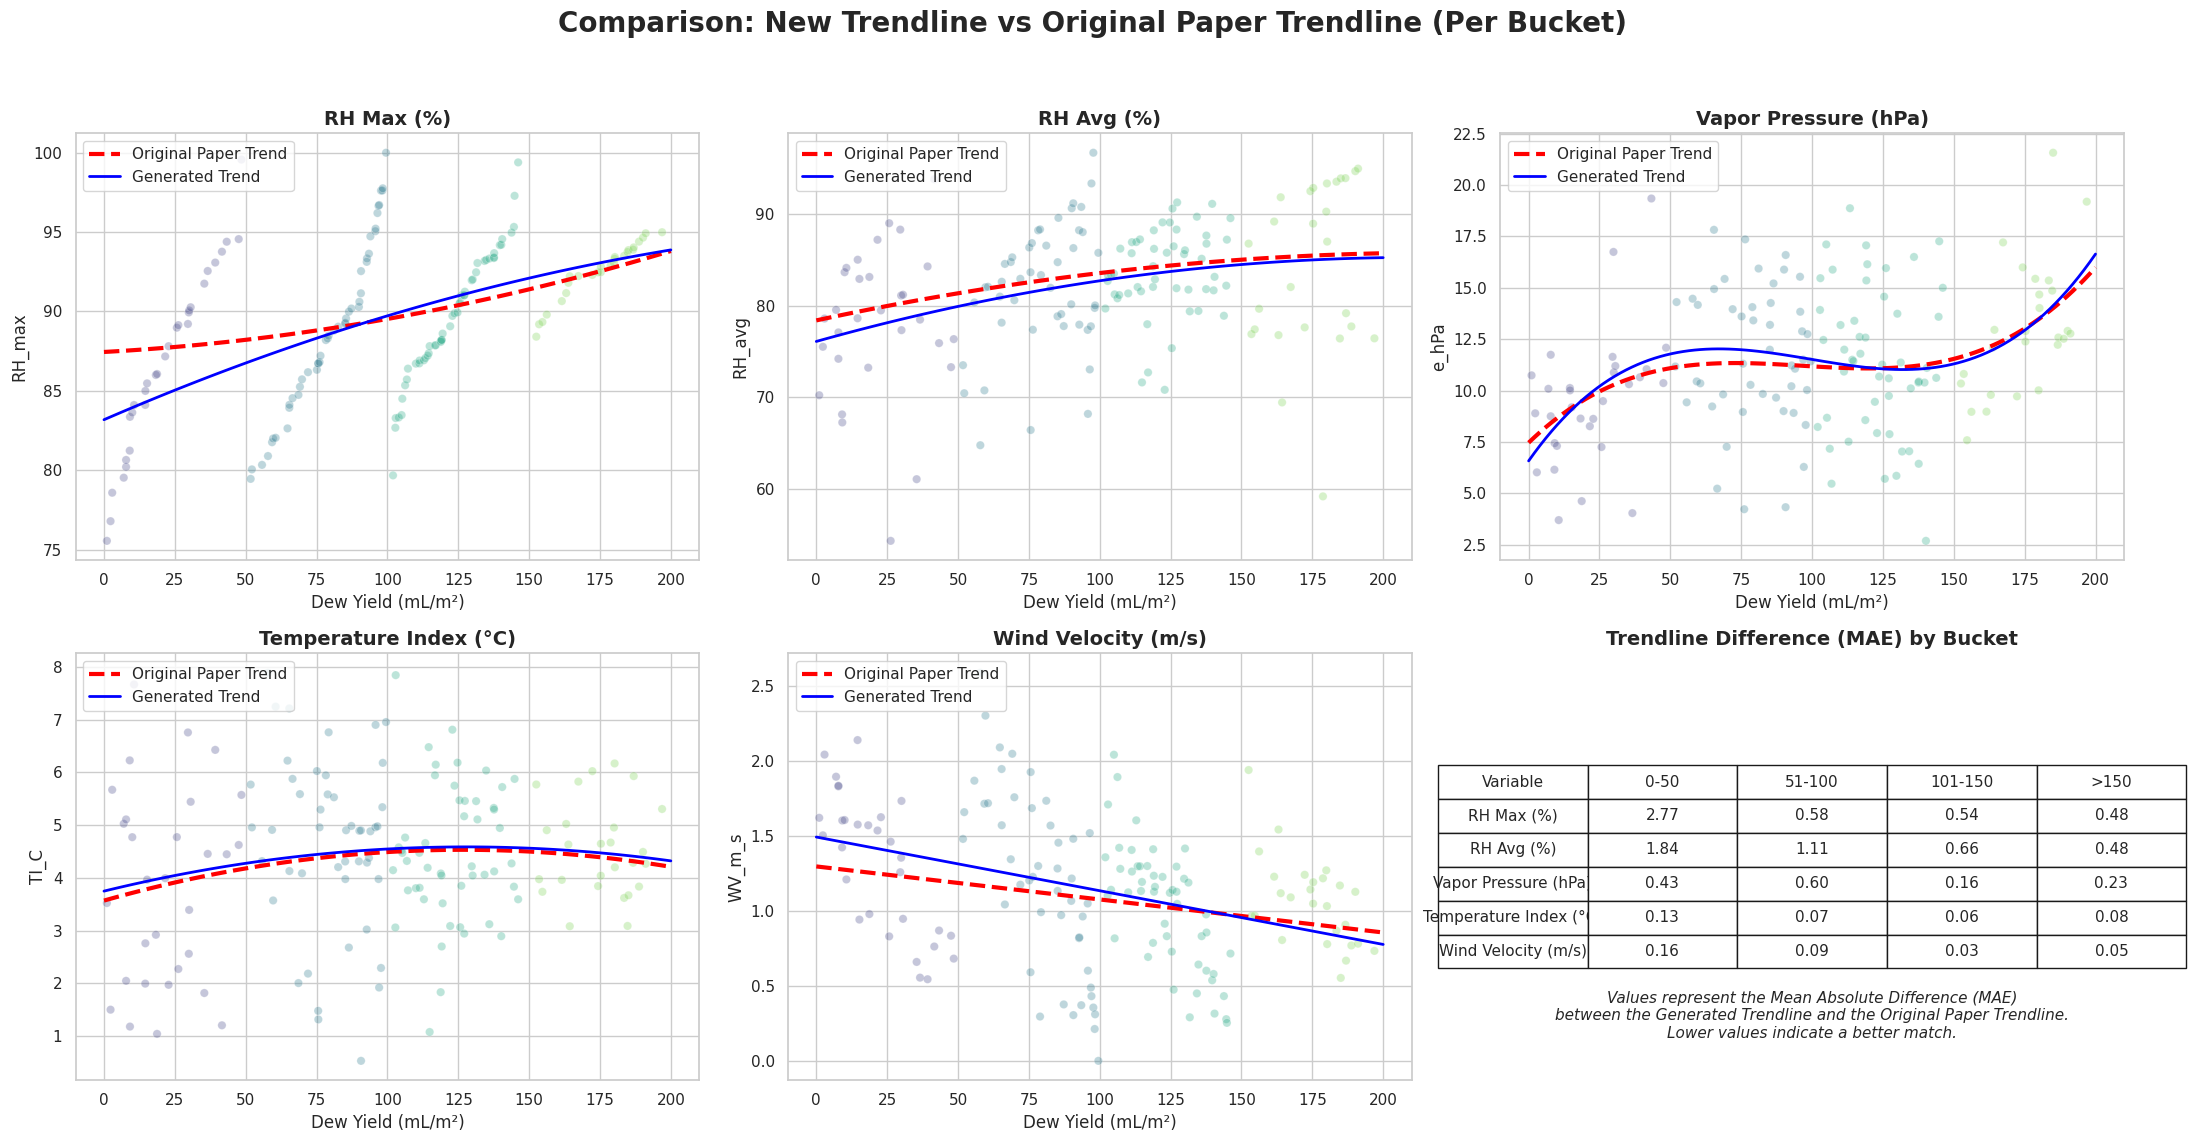

Comparison plots with Bucket Deviation Table saved to 'dew_data_trendline_diff.png'.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

np.random.seed(42)

# --- 1. Define Statistics from Table 1 ---
table1_data = {
    '0-50':    {'N': 30, 'RH_max': (87.9, 6.3), 'RH_avg': (80.4, 9.8), 'e_hPa': (9.96, 3.43), 'TI_C': (3.9, 1.8), 'WV_m_s': (1.2, 0.6)},
    '51-100':  {'N': 47, 'RH_max': (88.4, 5.0), 'RH_avg': (81.2, 8.5), 'e_hPa': (11.34, 3.40), 'TI_C': (4.4, 1.6), 'WV_m_s': (1.2, 0.7)},
    '101-150': {'N': 51, 'RH_max': (90.8, 4.5), 'RH_avg': (85.7, 6.1), 'e_hPa': (11.09, 3.18), 'TI_C': (4.5, 1.3), 'WV_m_s': (1.0, 0.5)},
    '>150':    {'N': 26, 'RH_max': (92.4, 2.4), 'RH_avg': (85.0, 17.7), 'e_hPa': (13.02, 3.08), 'TI_C': (4.4, 0.9), 'WV_m_s': (0.9, 0.5)},
}

# X-axis points for the paper's means (Midpoints of efficiency buckets)
x_means = np.array([25, 75, 125, 175])

# --- 2. Create Original Trendline Models (The "Ground Truth") ---
y_rhmax = np.array([87.9, 88.4, 90.8, 92.4])
model_rhmax = np.poly1d(np.polyfit(x_means, y_rhmax, 2))

y_rhavg = np.array([80.4, 81.2, 85.7, 85.0])
model_rhavg = np.poly1d(np.polyfit(x_means, y_rhavg, 2))

y_e = np.array([9.96, 11.34, 11.09, 13.02])
model_e = np.poly1d(np.polyfit(x_means, y_e, 3))

y_ti = np.array([3.9, 4.4, 4.5, 4.4])
model_ti = np.poly1d(np.polyfit(x_means, y_ti, 2))

y_wv = np.array([1.2, 1.2, 1.0, 0.9])
model_wv = np.poly1d(np.polyfit(x_means, y_wv, 1))

slope_wv_gen = -0.07

def generate_nonlinear_data(table_data):
    all_samples = []

    for efficiency_class, stats in table_data.items():
        n = stats['N']

        # --- A. Assign Dew Yield ---
        if efficiency_class == '0-50': low, high = 0, 50
        elif efficiency_class == '51-100': low, high = 51, 100
        elif efficiency_class == '101-150': low, high = 101, 150
        else: low, high = 151, 200

        yields = np.random.uniform(low, high, n)
        yields_sorted = np.sort(yields)

        # --- B. Generate Driver (RH_max) ---
        mu_rh, sd_rh = stats['RH_max']
        rh_max_raw = np.random.normal(mu_rh, sd_rh, n)
        rh_max_sorted = np.sort(rh_max_raw)

        # --- C. Generate Dependent Variables ---
        mu_rhavg, sd_rhavg = stats['RH_avg']
        rhavg_expected = model_rhavg(yields_sorted)
        rhavg_final = rhavg_expected + np.random.normal(0, sd_rhavg, n)

        mu_e, sd_e = stats['e_hPa']
        e_expected = model_e(yields_sorted)
        e_final = e_expected + np.random.normal(0, sd_e, n)

        mu_ti, sd_ti = stats['TI_C']
        ti_expected = model_ti(yields_sorted)
        ti_final = ti_expected + np.random.normal(0, sd_ti, n)

        mu_wv, sd_wv = stats['WV_m_s']
        wv_expected = mu_wv + slope_wv_gen * (rh_max_sorted - mu_rh)
        wv_final = wv_expected + np.random.normal(0, sd_wv * 0.6, n)

        # --- D. Cleanup ---
        bucket_df = pd.DataFrame({
            'Efficiency_Class': efficiency_class,
            'Dew_Yield': yields_sorted,
            'RH_max': np.clip(rh_max_sorted, 0, 100),
            'RH_avg': np.clip(rhavg_final, 0, 100),
            'e_hPa': np.clip(e_final, 0, None),
            'TI_C': np.clip(ti_final, 0, None),
            'WV_m_s': np.clip(wv_final, 0, None)
        })

        bucket_df['RH_avg'] = np.minimum(bucket_df['RH_avg'], bucket_df['RH_max'])
        all_samples.append(bucket_df)

    return pd.concat(all_samples, ignore_index=True)

df_final = generate_nonlinear_data(table1_data)

# --- 3. Plotting and Comparison ---
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(22, 12))
fig.suptitle('Comparison: New Trendline vs Original Paper Trendline (Per Bucket)', fontsize=20, fontweight='bold')

variables = [
    ('RH_max', 'RH Max (%)', model_rhmax),
    ('RH_avg', 'RH Avg (%)', model_rhavg),
    ('e_hPa', 'Vapor Pressure (hPa)', model_e),
    ('TI_C', 'Temperature Index (°C)', model_ti),
    ('WV_m_s', 'Wind Velocity (m/s)', model_wv)
]

axes_flat = axes.flatten()

# Dictionary to store deviation data for the table
deviation_data = []
bucket_ranges = [(0, 50, '0-50'), (50, 100, '51-100'), (100, 150, '101-150'), (150, 200, '>150')]

for i, (col, label, model_orig) in enumerate(variables):
    ax = axes_flat[i]

    # 1. Plot Data
    sns.scatterplot(data=df_final, x='Dew_Yield', y=col, hue='Efficiency_Class',
                    palette='viridis', alpha=0.3, ax=ax, legend=False)

    # 2. Plot Original Trendline (Red)
    x_range = np.linspace(0, 200, 100)
    ax.plot(x_range, model_orig(x_range), color='red', linewidth=3, linestyle='--', label='Original Paper Trend')

    # 3. Fit New Trendline (Blue)
    deg = model_orig.order
    z_gen = np.polyfit(df_final['Dew_Yield'], df_final[col], deg)
    p_gen = np.poly1d(z_gen)
    ax.plot(x_range, p_gen(x_range), color='blue', linewidth=2, label='Generated Trend')

    # 4. Calculate Difference per Bucket
    row_diffs = [label]
    for (start, end, b_name) in bucket_ranges:
        # Sample points in this bucket range
        x_bucket = np.linspace(start, end, 50)
        y_orig = model_orig(x_bucket)
        y_new = p_gen(x_bucket)

        # Mean Absolute Difference (MAE)
        mae = np.mean(np.abs(y_orig - y_new))
        row_diffs.append(f"{mae:.2f}")

    deviation_data.append(row_diffs)

    ax.set_title(label, fontsize=14, fontweight='bold')
    ax.set_xlabel('Dew Yield (mL/m²)')
    ax.legend(loc='upper left')

# --- 6th Subplot: Trendline Deviation Table ---
ax_table = axes_flat[-1]
ax_table.axis('off')
ax_table.set_title("Trendline Difference (MAE) by Bucket", fontsize=14, fontweight='bold')

# Create table data
table_cols = ['Variable', '0-50', '51-100', '101-150', '>150']
table_df = pd.DataFrame(deviation_data, columns=table_cols)

# Draw Table
the_table = ax_table.table(cellText=table_df.values,
                           colLabels=table_df.columns,
                           loc='center',
                           cellLoc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(11)
the_table.scale(1.2, 2) # Scale width, height

# Add explanation text
desc = "Values represent the Mean Absolute Difference (MAE)\nbetween the Generated Trendline and the Original Paper Trendline.\nLower values indicate a better match."
ax_table.text(0.5, 0.1, desc, ha='center', fontsize=11, style='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('dew_data_trendline_diff.png')
plt.show()

print("Comparison plots with Bucket Deviation Table saved to 'dew_data_trendline_diff.png'.")

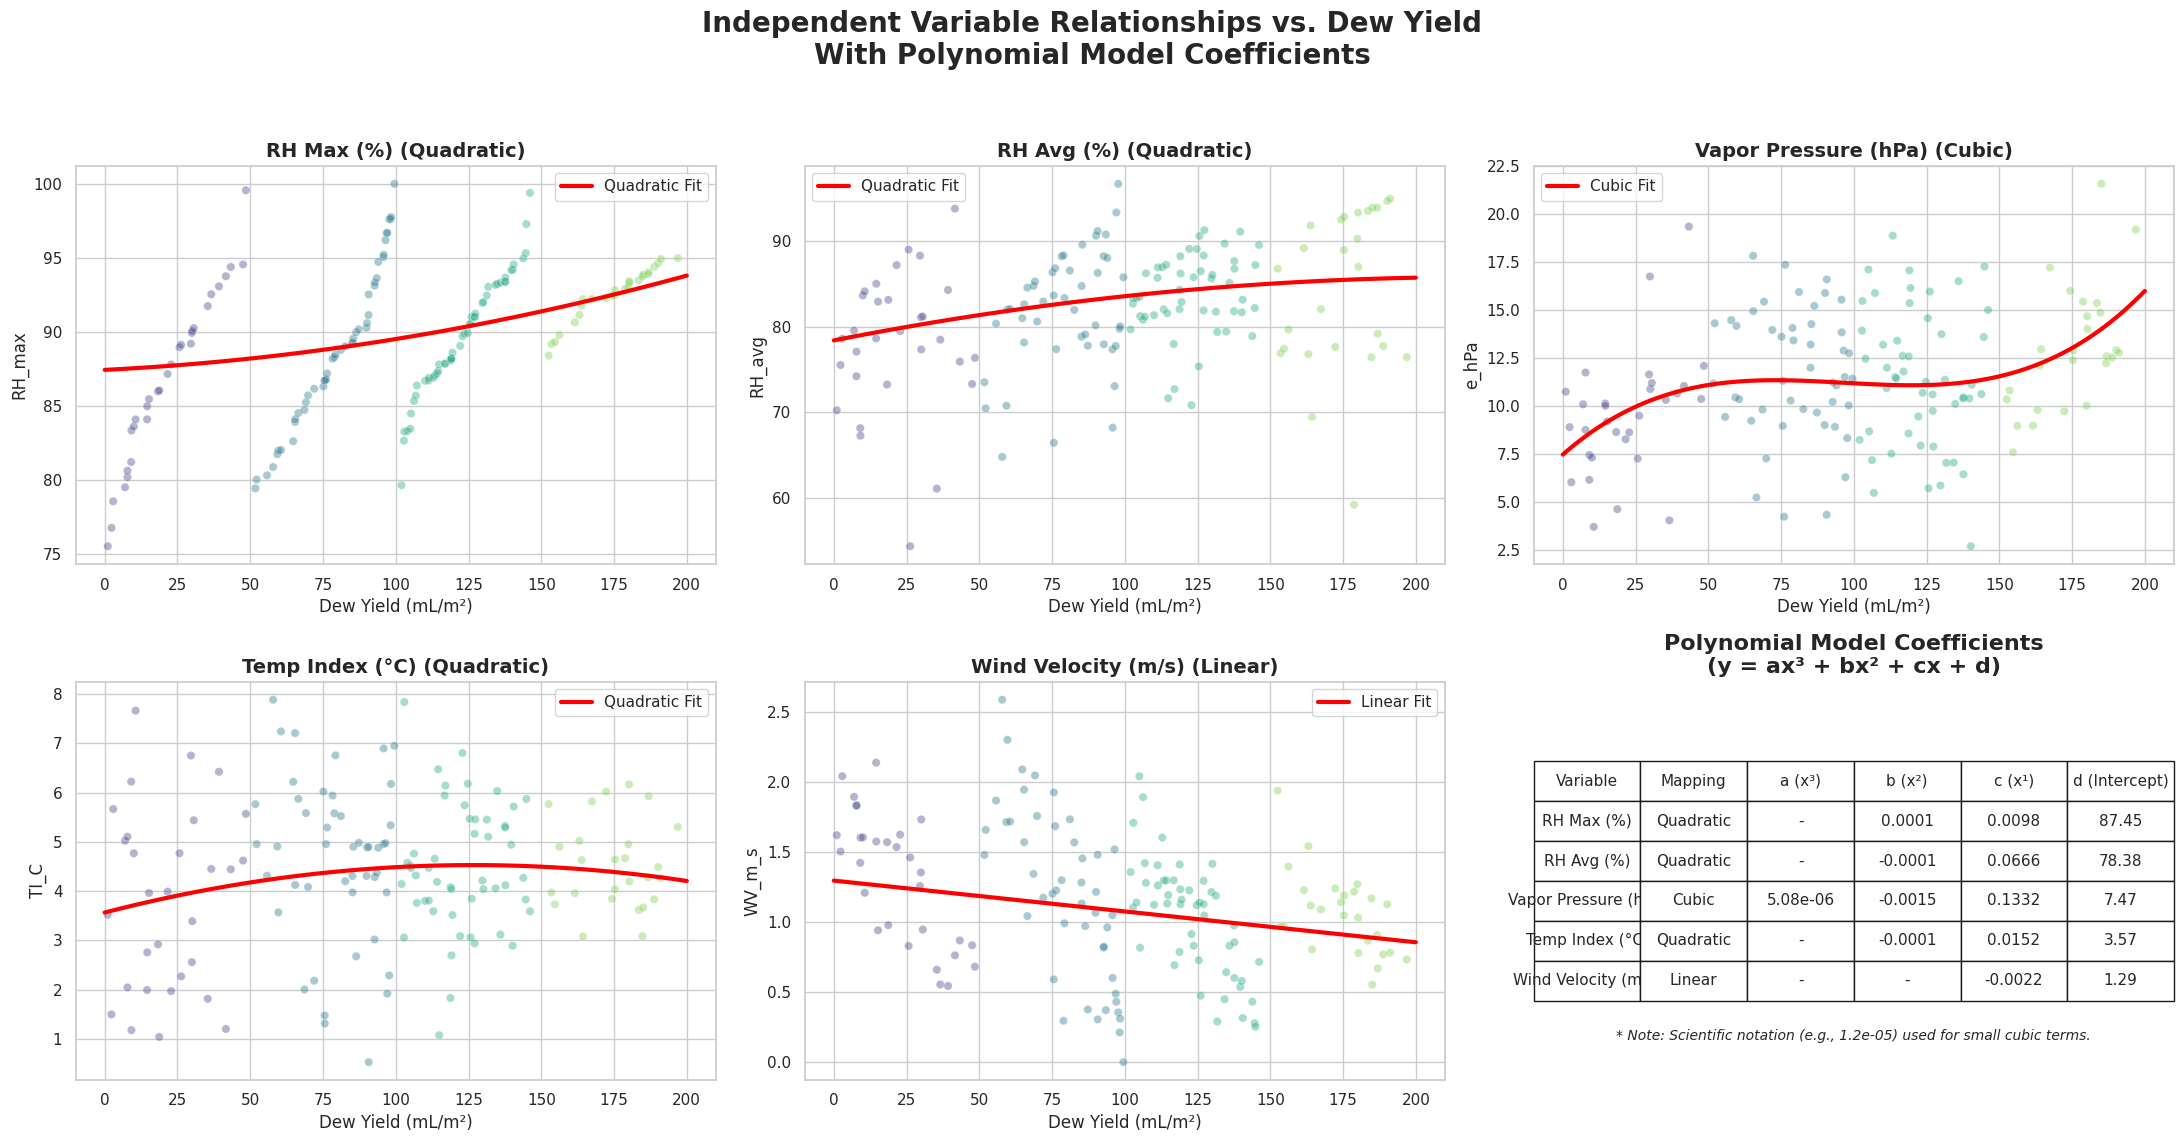

Visualization with Coefficient Table saved to 'dew_data_coefficients.png'.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# --- 1. Define Statistics ---
table1_data = {
    '0-50':    {'N': 30, 'RH_max': (87.9, 6.3), 'RH_avg': (80.4, 9.8), 'e_hPa': (9.96, 3.43), 'TI_C': (3.9, 1.8), 'WV_m_s': (1.2, 0.6)},
    '51-100':  {'N': 47, 'RH_max': (88.4, 5.0), 'RH_avg': (81.2, 8.5), 'e_hPa': (11.34, 3.40), 'TI_C': (4.4, 1.6), 'WV_m_s': (1.2, 0.7)},
    '101-150': {'N': 51, 'RH_max': (90.8, 4.5), 'RH_avg': (85.7, 6.1), 'e_hPa': (11.09, 3.18), 'TI_C': (4.5, 1.3), 'WV_m_s': (1.0, 0.5)},
    '>150':    {'N': 26, 'RH_max': (92.4, 2.4), 'RH_avg': (85.0, 17.7), 'e_hPa': (13.02, 3.08), 'TI_C': (4.4, 0.9), 'WV_m_s': (0.9, 0.5)},
}

# X-axis points (Midpoints of efficiency buckets) for fitting the Global Models
x_means = np.array([25, 75, 125, 175])

# --- 2. Define The "Decided" Global Mappings (Polynomial Models) ---

# RH Max: Quadratic (Degree 2) - Mild curve
y_rhmax = np.array([87.9, 88.4, 90.8, 92.4])
model_rhmax = np.poly1d(np.polyfit(x_means, y_rhmax, 2))

# RH Avg: Quadratic (Degree 2) - Saturation curve
y_rhavg = np.array([80.4, 81.2, 85.7, 85.0])
model_rhavg = np.poly1d(np.polyfit(x_means, y_rhavg, 2))

# Vapor Pressure: Cubic (Degree 3) - The "S-Curve" or wobble
y_e = np.array([9.96, 11.34, 11.09, 13.02])
model_e = np.poly1d(np.polyfit(x_means, y_e, 3))

# Temperature Index: Quadratic (Degree 2) - The "Inverted U"
y_ti = np.array([3.9, 4.4, 4.5, 4.4])
model_ti = np.poly1d(np.polyfit(x_means, y_ti, 2))

# Wind Velocity: Linear (Degree 1) - Inverse trend
y_wv = np.array([1.2, 1.2, 1.0, 0.9])
model_wv = np.poly1d(np.polyfit(x_means, y_wv, 1))

# Slope for generation logic (Wind vs RH_Max)
slope_wv_gen = -0.07

def generate_nonlinear_data(table_data):
    all_samples = []
    for efficiency_class, stats in table_data.items():
        n = stats['N']

        # Assign Dew Yield
        if efficiency_class == '0-50': low, high = 0, 50
        elif efficiency_class == '51-100': low, high = 51, 100
        elif efficiency_class == '101-150': low, high = 101, 150
        else: low, high = 151, 200
        yields = np.random.uniform(low, high, n)
        yields_sorted = np.sort(yields)

        # Generate Driver (RH_max)
        mu_rh, sd_rh = stats['RH_max']
        rh_max_raw = np.random.normal(mu_rh, sd_rh, n)
        rh_max_sorted = np.sort(rh_max_raw)

        # Generate Dependent Variables using the Models
        mu_rhavg, sd_rhavg = stats['RH_avg']
        rhavg_final = model_rhavg(yields_sorted) + np.random.normal(0, sd_rhavg, n)

        mu_e, sd_e = stats['e_hPa']
        e_final = model_e(yields_sorted) + np.random.normal(0, sd_e, n)

        mu_ti, sd_ti = stats['TI_C']
        ti_final = model_ti(yields_sorted) + np.random.normal(0, sd_ti, n)

        mu_wv, sd_wv = stats['WV_m_s']
        wv_final = (mu_wv + slope_wv_gen * (rh_max_sorted - mu_rh)) + np.random.normal(0, sd_wv * 0.6, n)

        # Cleanup
        bucket_df = pd.DataFrame({
            'Efficiency_Class': efficiency_class,
            'Dew_Yield': yields_sorted,
            'RH_max': np.clip(rh_max_sorted, 0, 100),
            'RH_avg': np.clip(rhavg_final, 0, 100),
            'e_hPa': np.clip(e_final, 0, None),
            'TI_C': np.clip(ti_final, 0, None),
            'WV_m_s': np.clip(wv_final, 0, None)
        })
        bucket_df['RH_avg'] = np.minimum(bucket_df['RH_avg'], bucket_df['RH_max'])
        all_samples.append(bucket_df)

    return pd.concat(all_samples, ignore_index=True)

df_final = generate_nonlinear_data(table1_data)

# --- 3. Plotting with Coefficient Table ---
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(22, 12))
fig.suptitle('Independent Variable Relationships vs. Dew Yield\nWith Polynomial Model Coefficients', fontsize=20, fontweight='bold')

# List of variables and their corresponding global models
variables_info = [
    ('RH_max', 'RH Max (%)', model_rhmax, 'Quadratic'),
    ('RH_avg', 'RH Avg (%)', model_rhavg, 'Quadratic'),
    ('e_hPa', 'Vapor Pressure (hPa)', model_e, 'Cubic'),
    ('TI_C', 'Temp Index (°C)', model_ti, 'Quadratic'),
    ('WV_m_s', 'Wind Velocity (m/s)', model_wv, 'Linear')
]

axes_flat = axes.flatten()
coeff_data = []

for i, (col, label, model, map_type) in enumerate(variables_info):
    ax = axes_flat[i]

    # 1. Scatter Plot (Data)
    sns.scatterplot(data=df_final, x='Dew_Yield', y=col, hue='Efficiency_Class',
                    palette='viridis', alpha=0.4, ax=ax, legend=False)

    # 2. Trendline (Model)
    x_range = np.linspace(0, 200, 100)
    ax.plot(x_range, model(x_range), color='red', linewidth=3, label=f'{map_type} Fit')

    # 3. Collect Coefficients
    # numpy poly1d coeffs are [highest_order, ..., intercept]
    c = model.coeffs

    # Format based on degree
    if len(c) == 4: # Cubic
        eq_coeffs = [f"{c[0]:.2e}", f"{c[1]:.4f}", f"{c[2]:.4f}", f"{c[3]:.2f}"]
    elif len(c) == 3: # Quadratic
        eq_coeffs = ["-", f"{c[0]:.4f}", f"{c[1]:.4f}", f"{c[2]:.2f}"]
    elif len(c) == 2: # Linear
        eq_coeffs = ["-", "-", f"{c[0]:.4f}", f"{c[1]:.2f}"]

    coeff_data.append([label, map_type] + eq_coeffs)

    ax.set_title(f'{label} ({map_type})', fontsize=14, fontweight='bold')
    ax.set_xlabel('Dew Yield (mL/m²)')
    ax.legend()

# --- 6th Subplot: Coefficient Table ---
ax_table = axes_flat[-1]
ax_table.axis('off')
ax_table.set_title("Polynomial Model Coefficients\n(y = ax³ + bx² + cx + d)", fontsize=16, fontweight='bold')

# Table Columns
cols = ['Variable', 'Mapping', 'a (x³)', 'b (x²)', 'c (x¹)', 'd (Intercept)']
table_df = pd.DataFrame(coeff_data, columns=cols)

# Draw Table
cell_text = []
for row in table_df.values:
    cell_text.append(row)

the_table = ax_table.table(cellText=cell_text,
                           colLabels=cols,
                           loc='center',
                           cellLoc='center',
                           bbox=[0, 0.2, 1, 0.6]) # Adjust box size

the_table.auto_set_font_size(False)
the_table.set_fontsize(11)
the_table.scale(1, 2)

# Add footnote
ax_table.text(0.5, 0.1, "* Note: Scientific notation (e.g., 1.2e-05) used for small cubic terms.",
              ha='center', fontsize=10, style='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('dew_data_coefficients.png')
plt.show()

print("Visualization with Coefficient Table saved to 'dew_data_coefficients.png'.")

# STUDY + GENERATION OF DATA


SYNTHETIC DATA GENERATION SUMMARY
Total synthetic data points generated: 770

Verification of generated data (comparing to original statistics):


DEW:
--------------------------------------------------------------------------------

  0-50 mL/m² (N=30):
    Max RH (%)               : Mean= 86.71 (target= 87.90), SD= 5.67 (target= 6.30)
    Avg RH (%)               : Mean= 79.21 (target= 80.40), SD= 9.12 (target= 9.80)
    Vapor Pressure (hPa)     : Mean= 10.00 (target=  9.96), SD= 3.40 (target= 3.43)
    Temperature Index (°C)   : Mean=  3.86 (target=  3.90), SD= 1.64 (target= 1.80)
    Wind Velocity (m/s)      : Mean=  1.14 (target=  1.20), SD= 0.61 (target= 0.60)

  51-100 mL/m² (N=47):
    Max RH (%)               : Mean= 88.95 (target= 88.40), SD= 4.52 (target= 5.00)
    Avg RH (%)               : Mean= 82.49 (target= 81.20), SD= 9.24 (target= 8.50)
    Vapor Pressure (hPa)     : Mean= 11.08 (target= 11.34), SD= 3.84 (target= 3.40)
    Temperature Index (°C)   : Mean=  4.70 (targe

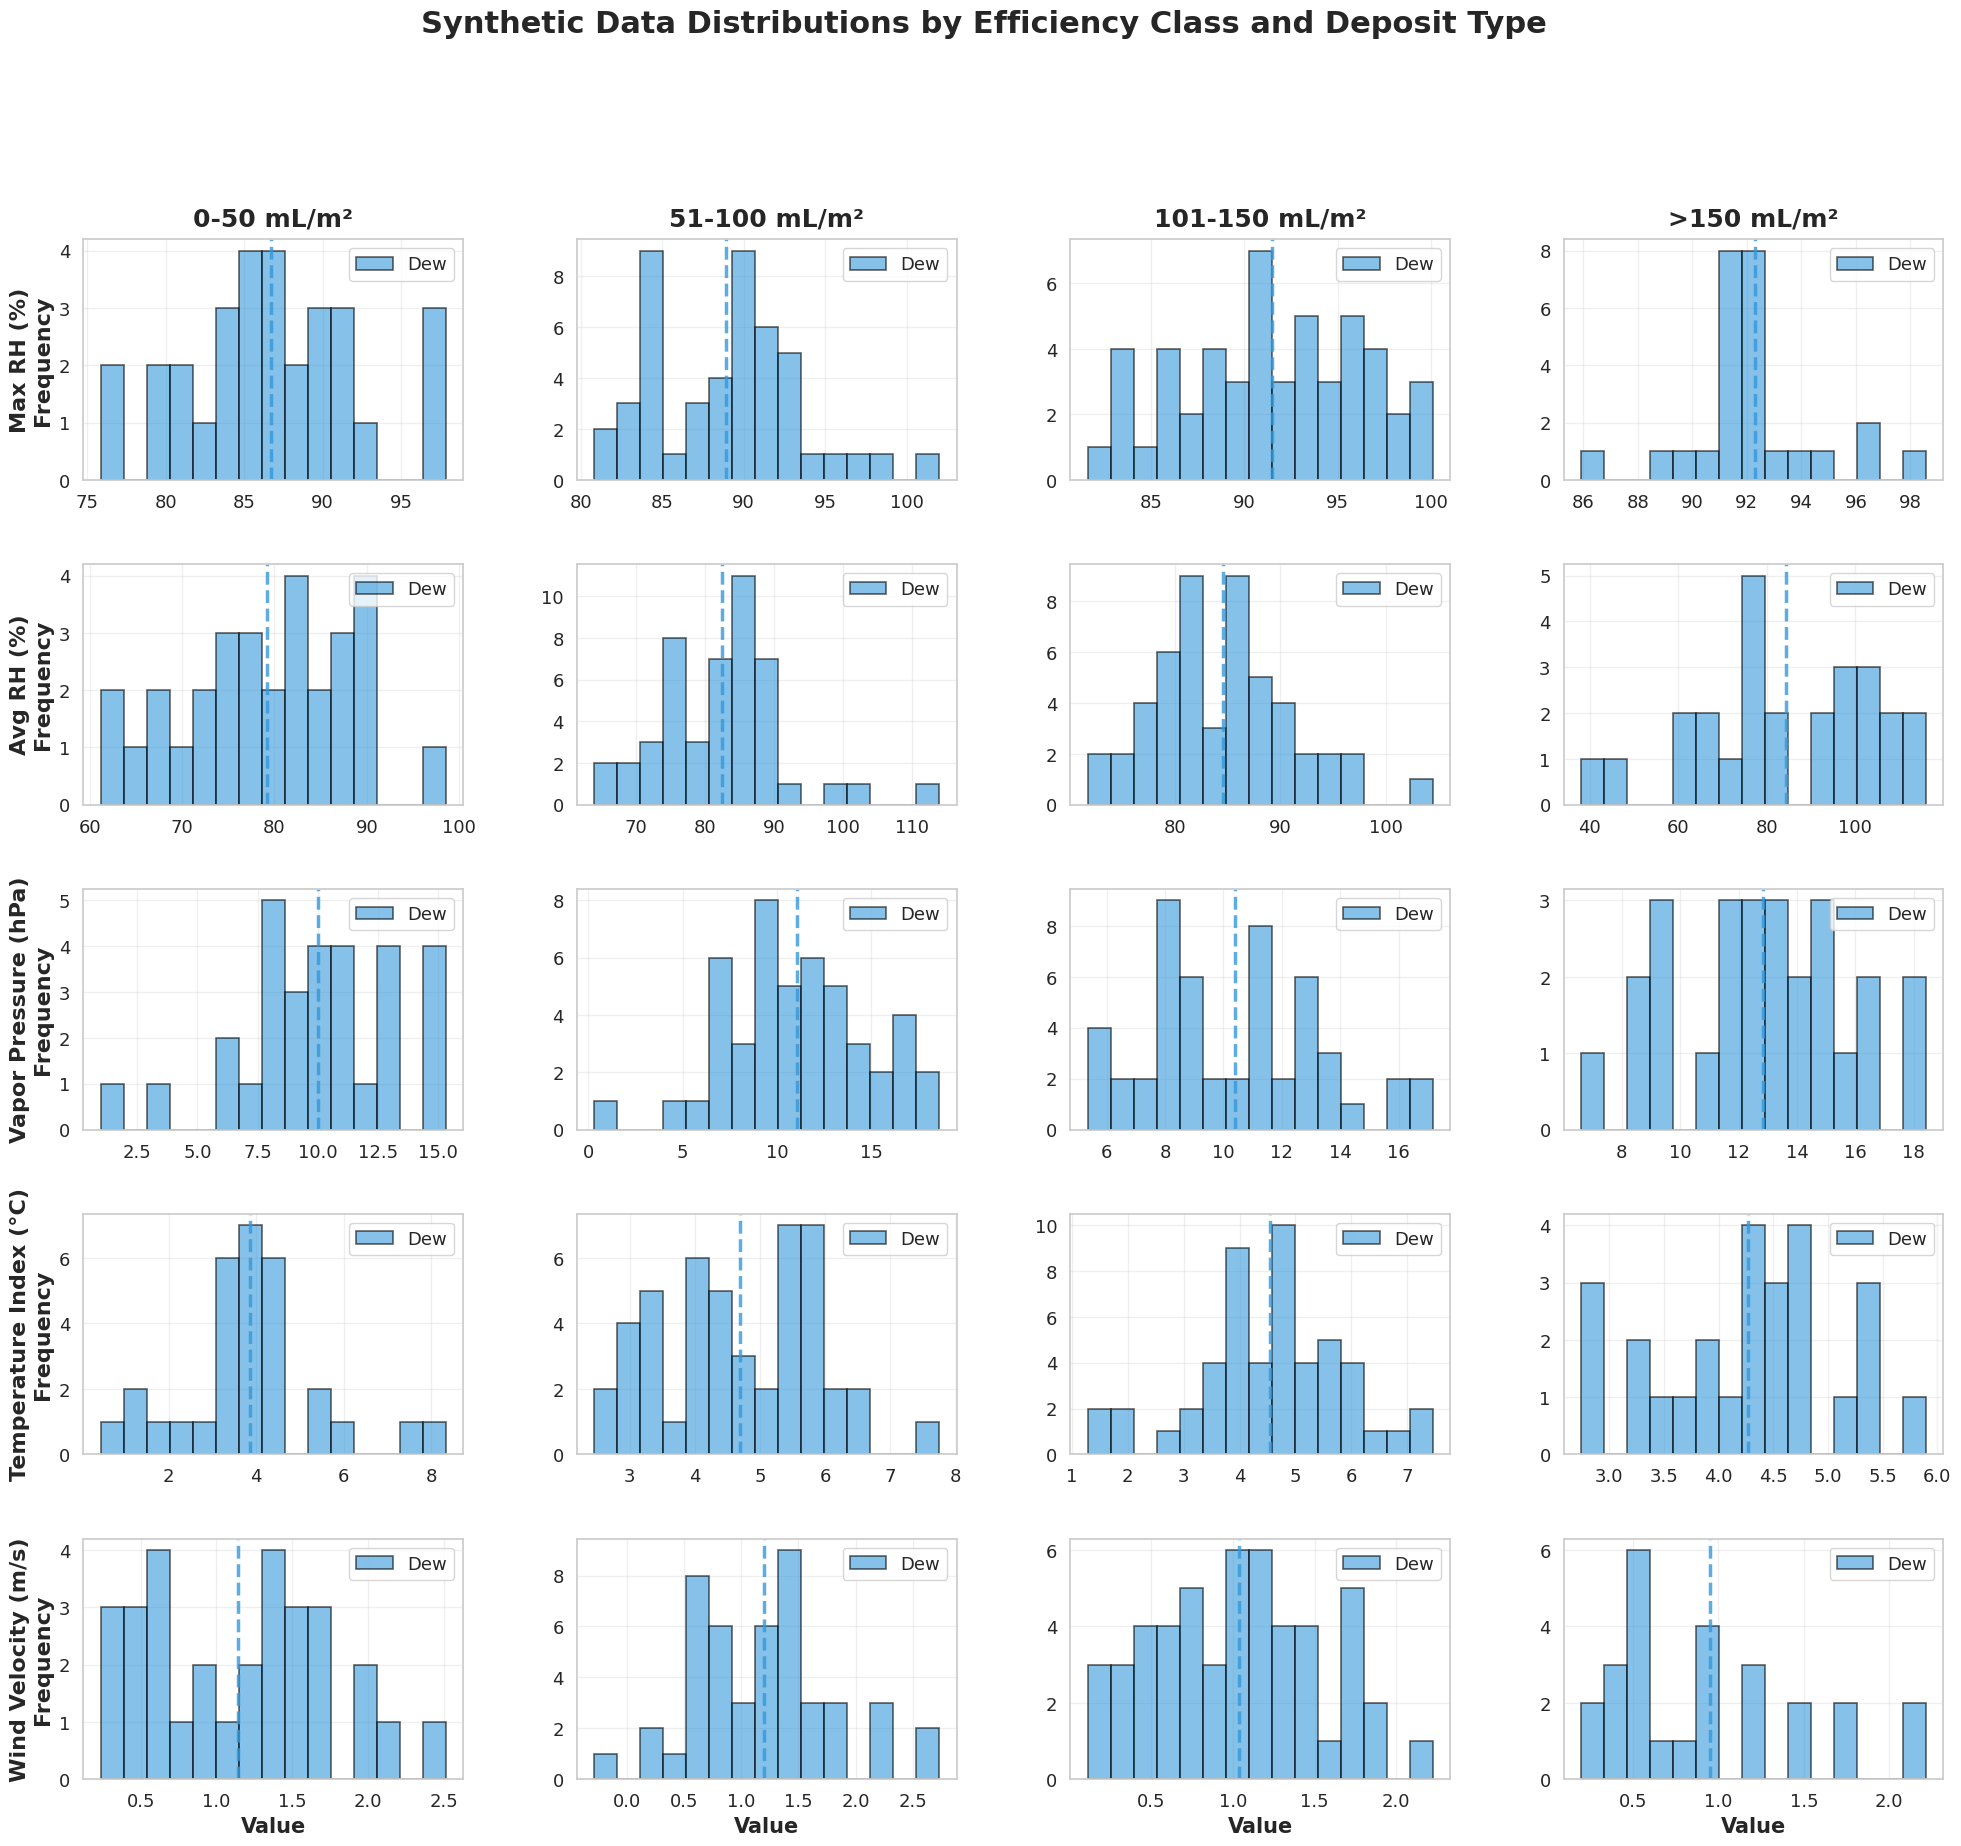

AttributeError: 'Index' object has no attribute '_format_native_types'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Set style with increased font sizes
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Table 1 data structure - Dew only
table1_data = {
    ('Dew', '0-50'): {'N': 30, 'RH_max': (87.9, 6.3), 'RH_avg': (80.4, 9.8),
                      'e_hPa': (9.96, 3.43), 'TI_C': (3.9, 1.8), 'WV_m_s': (1.2, 0.6)},
    ('Dew', '51-100'): {'N': 47, 'RH_max': (88.4, 5.0), 'RH_avg': (81.2, 8.5),
                        'e_hPa': (11.34, 3.40), 'TI_C': (4.4, 1.6), 'WV_m_s': (1.2, 0.7)},
    ('Dew', '101-150'): {'N': 51, 'RH_max': (90.8, 4.5), 'RH_avg': (85.7, 6.1),
                         'e_hPa': (11.09, 3.18), 'TI_C': (4.5, 1.3), 'WV_m_s': (1.0, 0.5)},
    ('Dew', '>150'): {'N': 26, 'RH_max': (92.4, 2.4), 'RH_avg': (85.0, 17.7),
                      'e_hPa': (13.02, 3.08), 'TI_C': (4.4, 0.9), 'WV_m_s': (0.9, 0.5)},
}

# Generate synthetic data for each bucket
def generate_synthetic_data(table1_data):
    """Generate synthetic data matching mean and SD for each efficiency bucket"""
    synthetic_datasets = []

    for (deposit_type, efficiency_class), stats in table1_data.items():
        n_samples = stats['N']

        # Generate data for each variable
        for var_key in ['RH_max', 'RH_avg', 'e_hPa', 'TI_C', 'WV_m_s']:
            mean, sd = stats[var_key]

            # Generate normally distributed data
            values = np.random.normal(mean, sd, n_samples)

            # Create dataframe rows
            for i, value in enumerate(values):
                synthetic_datasets.append({
                    'Deposit_Type': deposit_type,
                    'Efficiency_Class': efficiency_class,
                    'Variable': var_key,
                    'Sample_ID': i + 1,
                    'Value': value,
                    'True_Mean': mean,
                    'True_SD': sd
                })

    return pd.DataFrame(synthetic_datasets)

# Generate the synthetic dataset
df_synthetic = generate_synthetic_data(table1_data)

# Print summary statistics to verify
print("="*80)
print("SYNTHETIC DATA GENERATION SUMMARY")
print("="*80)
print(f"Total synthetic data points generated: {len(df_synthetic):,}")
print(f"\nVerification of generated data (comparing to original statistics):\n")

efficiency_order = ['0-50', '51-100', '101-150', '>150']
var_names = {
    'RH_max': 'Max RH (%)',
    'RH_avg': 'Avg RH (%)',
    'e_hPa': 'Vapor Pressure (hPa)',
    'TI_C': 'Temperature Index (°C)',
    'WV_m_s': 'Wind Velocity (m/s)'
}

for deposit in ['Dew', 'Hoarfrost']:
    print(f"\n{deposit.upper()}:")
    print("-" * 80)
    for eff in efficiency_order:
        subset = df_synthetic[(df_synthetic['Deposit_Type'] == deposit) &
                             (df_synthetic['Efficiency_Class'] == eff)]
        if len(subset) > 0:
            print(f"\n  {eff} mL/m² (N={subset['Sample_ID'].nunique()}):")
            for var in ['RH_max', 'RH_avg', 'e_hPa', 'TI_C', 'WV_m_s']:
                var_data = subset[subset['Variable'] == var]
                generated_mean = var_data['Value'].mean()
                generated_sd = var_data['Value'].std()
                true_mean = var_data['True_Mean'].iloc[0]
                true_sd = var_data['True_SD'].iloc[0]
                print(f"    {var_names[var]:25s}: Mean={generated_mean:6.2f} (target={true_mean:6.2f}), "
                      f"SD={generated_sd:5.2f} (target={true_sd:5.2f})")

# Create comprehensive visualization
fig = plt.figure(figsize=(24, 20))
gs = fig.add_gridspec(5, 4, hspace=0.35, wspace=0.3)

colors = {'Dew': '#3498db', 'Hoarfrost': '#e74c3c'}
variables = ['RH_max', 'RH_avg', 'e_hPa', 'TI_C', 'WV_m_s']

for var_idx, var in enumerate(variables):
    for eff_idx, eff_class in enumerate(efficiency_order):
        ax = fig.add_subplot(gs[var_idx, eff_idx])

        for deposit_type in ['Dew', 'Hoarfrost']:
            data = df_synthetic[
                (df_synthetic['Deposit_Type'] == deposit_type) &
                (df_synthetic['Efficiency_Class'] == eff_class) &
                (df_synthetic['Variable'] == var)
            ]['Value']

            if len(data) > 0:
                ax.hist(data, bins=15, alpha=0.6, label=deposit_type,
                       color=colors[deposit_type], edgecolor='black', linewidth=1.2)

                # Add vertical line for mean
                ax.axvline(data.mean(), color=colors[deposit_type],
                          linestyle='--', linewidth=2.5, alpha=0.8)

        # Formatting
        if var_idx == 0:
            ax.set_title(f'{eff_class} mL/m²', fontsize=18, fontweight='bold', pad=10)
        if eff_idx == 0:
            ax.set_ylabel(f'{var_names[var]}\nFrequency', fontsize=16, fontweight='bold')
        if var_idx == len(variables) - 1:
            ax.set_xlabel('Value', fontsize=15, fontweight='bold')

        ax.legend(fontsize=13, loc='upper right')
        ax.grid(True, alpha=0.3)
        ax.tick_params(labelsize=13)

fig.suptitle('Synthetic Data Distributions by Efficiency Class and Deposit Type',
             fontsize=22, fontweight='bold', y=0.995)

plt.savefig('synthetic_data_distributions.png', dpi=150, bbox_inches='tight')
print("\n" + "="*80)
print("✓ Visualization saved as 'synthetic_data_distributions.png'")
print("="*80)
plt.show()

# Save synthetic dataset to CSV
df_synthetic.to_csv('synthetic_meteorological_data.csv', index=False)
print("✓ Synthetic dataset saved as 'synthetic_meteorological_data.csv'")
print("="*80)

# Data Assignment


GROUND TRUTH LABEL GENERATION

Paper Findings Summary:
--------------------------------------------------------------------------------
1. POSITIVE correlations with dew yield:
   - RH_max (clear positive)
   - RH_avg (clear positive)
   - TI (temperature inversion) (positive but not as evident)

2. NEGATIVE correlations with dew yield:
   - WV (wind velocity) (negative but not as evident)

3. COMPLEX relationship:
   - e (vapor pressure) - higher in general but complex relationship

DATASET WITH GROUND TRUTH LABELS

Total samples: 154

Sample statistics by efficiency class:
--------------------------------------------------------------------------------

0-50 mL/m² (N=30):
  Predicted yield range: 9.6 - 38.2 mL/m²
  Mean predicted yield: 24.4 mL/m²
  Base score range: 0.187 - 0.715

51-100 mL/m² (N=47):
  Predicted yield range: 67.7 - 93.4 mL/m²
  Mean predicted yield: 78.6 mL/m²
  Base score range: 0.235 - 0.961

101-150 mL/m² (N=51):
  Predicted yield range: 118.5 - 138.3 mL/m²
  Me

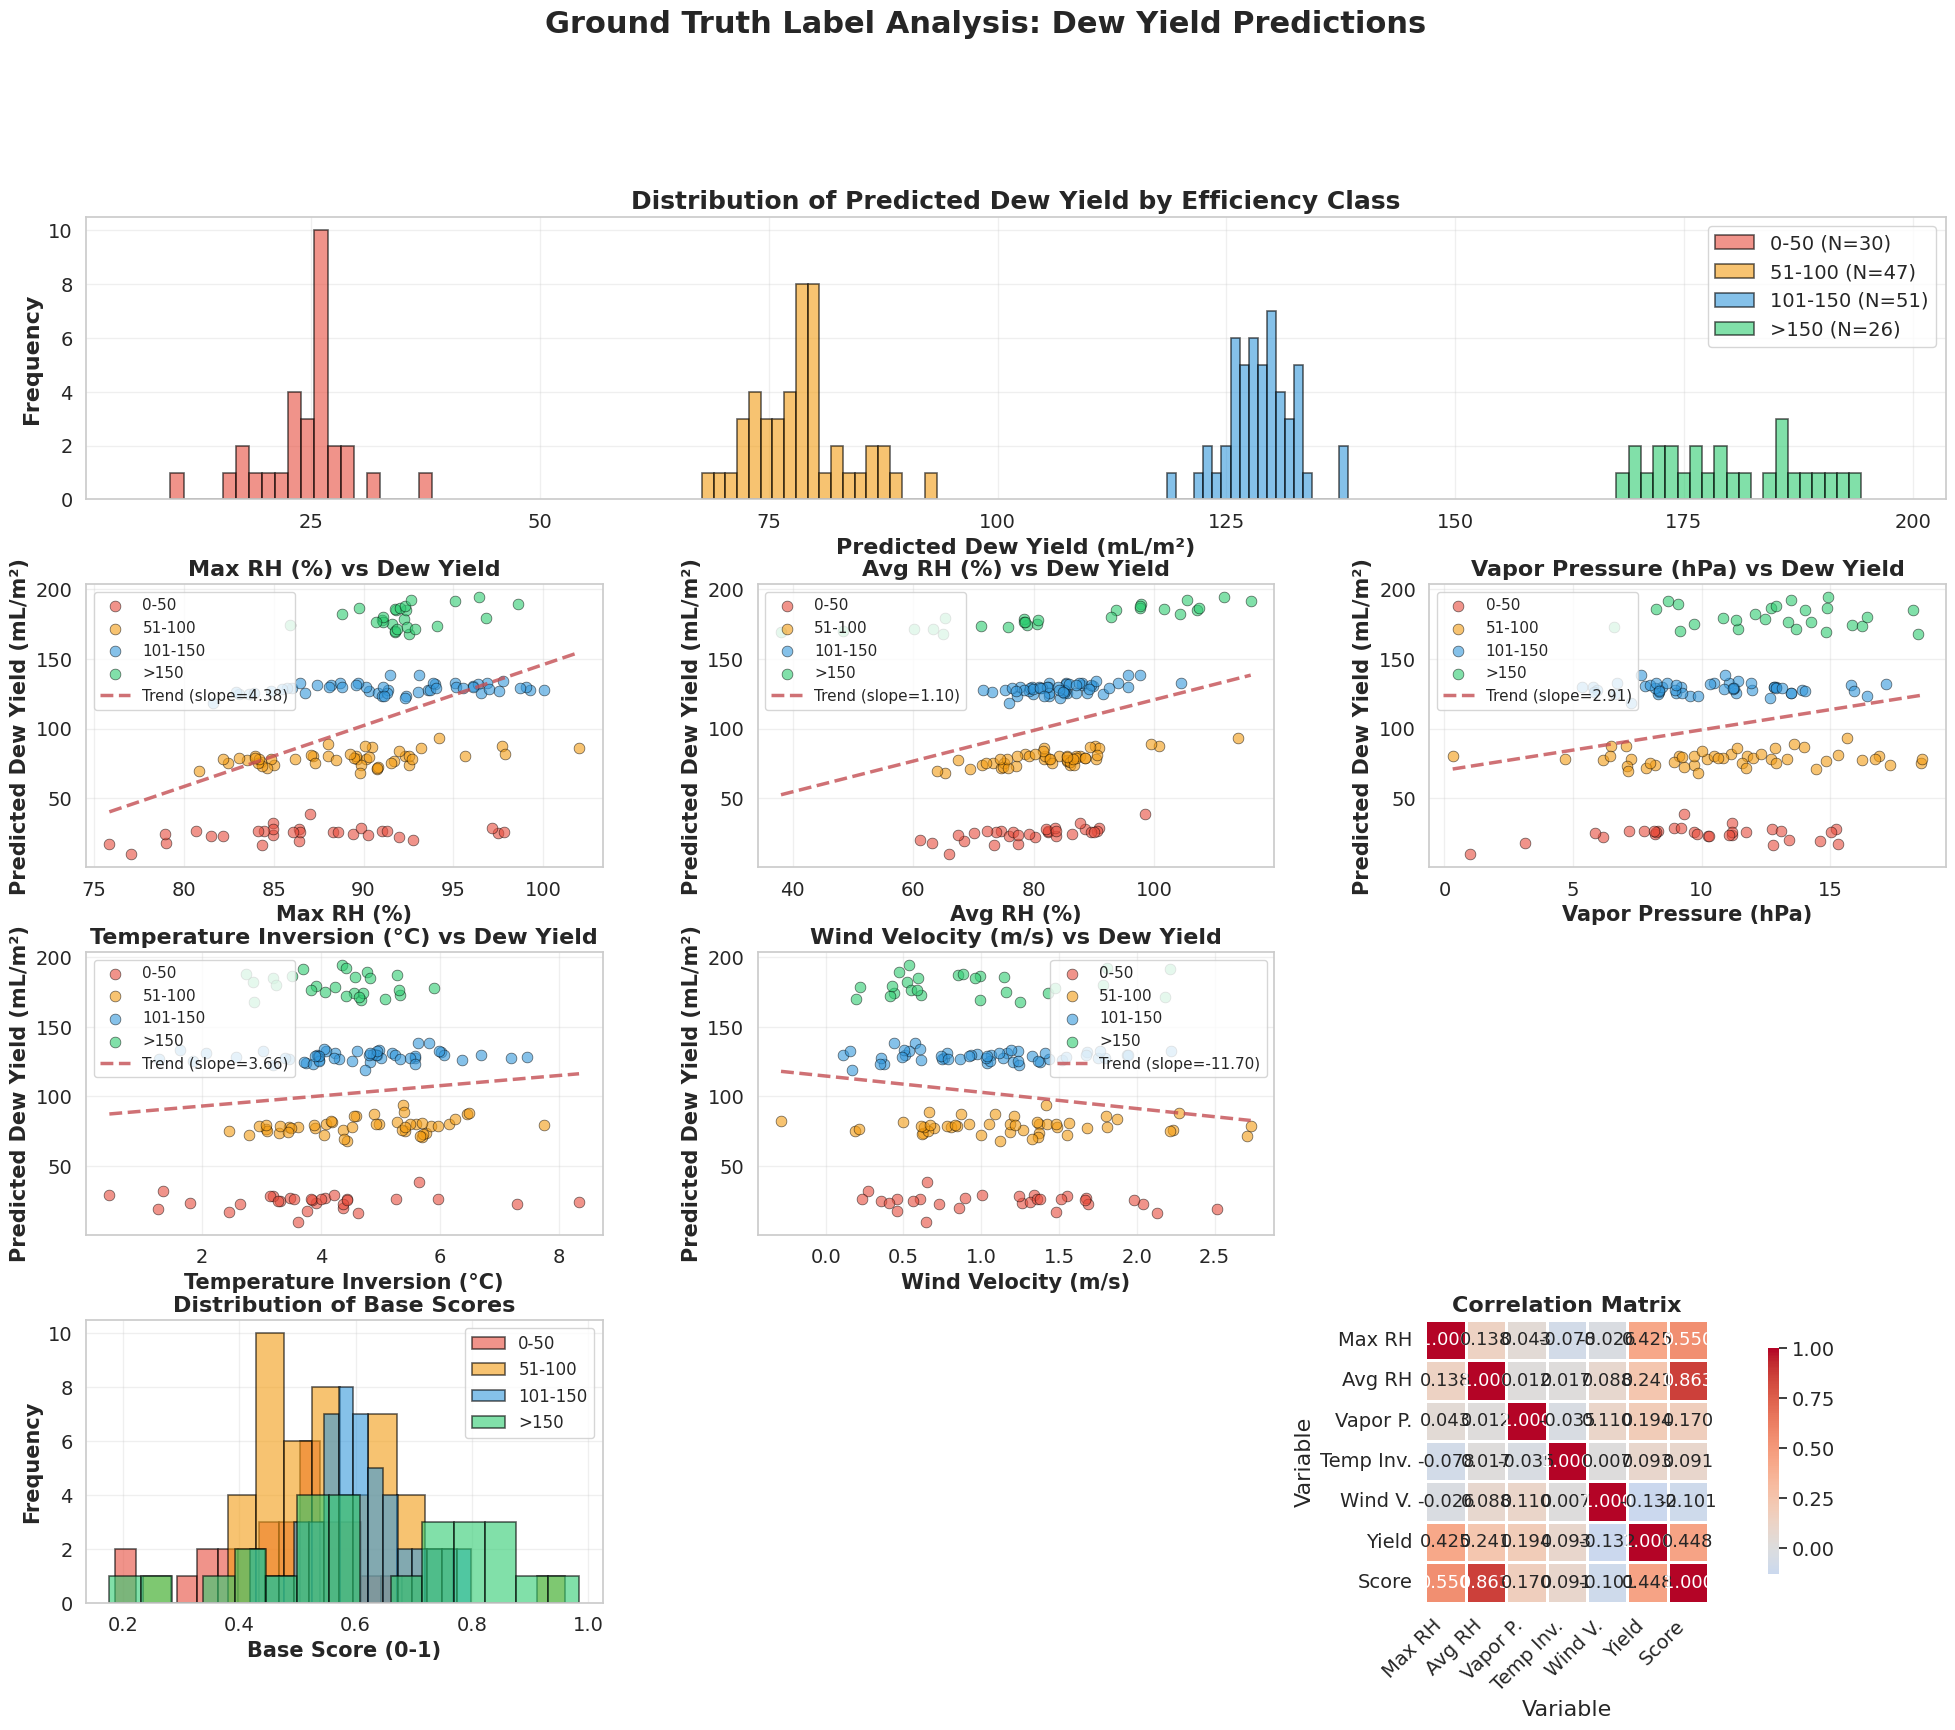

AttributeError: 'Index' object has no attribute '_format_native_types'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Set style with increased font sizes
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Table 1 data structure - Dew only
table1_data = {
    ('Dew', '0-50'): {'N': 30, 'RH_max': (87.9, 6.3), 'RH_avg': (80.4, 9.8),
                      'e_hPa': (9.96, 3.43), 'TI_C': (3.9, 1.8), 'WV_m_s': (1.2, 0.6)},
    ('Dew', '51-100'): {'N': 47, 'RH_max': (88.4, 5.0), 'RH_avg': (81.2, 8.5),
                        'e_hPa': (11.34, 3.40), 'TI_C': (4.4, 1.6), 'WV_m_s': (1.2, 0.7)},
    ('Dew', '101-150'): {'N': 51, 'RH_max': (90.8, 4.5), 'RH_avg': (85.7, 6.1),
                         'e_hPa': (11.09, 3.18), 'TI_C': (4.5, 1.3), 'WV_m_s': (1.0, 0.5)},
    ('Dew', '>150'): {'N': 26, 'RH_max': (92.4, 2.4), 'RH_avg': (85.0, 17.7),
                      'e_hPa': (13.02, 3.08), 'TI_C': (4.4, 0.9), 'WV_m_s': (0.9, 0.5)},
}

# Generate synthetic data for each bucket
def generate_synthetic_data(table1_data):
    """Generate synthetic data matching mean and SD for each efficiency bucket"""
    synthetic_datasets = []

    for (deposit_type, efficiency_class), stats in table1_data.items():
        n_samples = stats['N']

        # Generate data for each variable
        for var_key in ['RH_max', 'RH_avg', 'e_hPa', 'TI_C', 'WV_m_s']:
            mean, sd = stats[var_key]

            # Generate normally distributed data
            values = np.random.normal(mean, sd, n_samples)

            # Create dataframe rows
            for i, value in enumerate(values):
                synthetic_datasets.append({
                    'Deposit_Type': deposit_type,
                    'Efficiency_Class': efficiency_class,
                    'Variable': var_key,
                    'Sample_ID': i + 1,
                    'Value': value,
                    'True_Mean': mean,
                    'True_SD': sd
                })

    return pd.DataFrame(synthetic_datasets)

# Generate the synthetic dataset
df_synthetic = generate_synthetic_data(table1_data)

# Pivot to get one row per sample with all variables as columns
df_pivot = df_synthetic.pivot_table(
    index=['Deposit_Type', 'Efficiency_Class', 'Sample_ID'],
    columns='Variable',
    values='Value'
).reset_index()

df = df_pivot.copy()

print("="*80)
print("GROUND TRUTH LABEL GENERATION")
print("="*80)
print("\nPaper Findings Summary:")
print("-" * 80)
print("1. POSITIVE correlations with dew yield:")
print("   - RH_max (clear positive)")
print("   - RH_avg (clear positive)")
print("   - TI (temperature inversion) (positive but not as evident)")
print("\n2. NEGATIVE correlations with dew yield:")
print("   - WV (wind velocity) (negative but not as evident)")
print("\n3. COMPLEX relationship:")
print("   - e (vapor pressure) - higher in general but complex relationship")
print("="*80)

# Define scoring function based on paper findings
def calculate_dew_yield_score(row):
    """
    Calculate a dew yield score based on meteorological variables
    Following the paper's findings about correlations
    """

    # Normalize each variable to 0-1 scale based on the dataset range
    # RH_max: positive correlation (higher is better)
    rh_max_norm = (row['RH_max'] - 75) / 25  # Scale from ~75-100%

    # RH_avg: positive correlation (higher is better)
    rh_avg_norm = (row['RH_avg'] - 65) / 35  # Scale from ~65-100%

    # TI: positive correlation but weaker (higher inversion is better)
    ti_norm = (row['TI_C'] - 0) / 8  # Scale from ~0-8°C

    # WV: negative correlation (lower wind is better)
    wv_norm = 1 - ((row['WV_m_s'] - 0) / 3.5)  # Scale from ~0-3.5 m/s, inverted

    # e: complex relationship - use moderate weighting
    e_norm = (row['e_hPa'] - 3) / 15  # Scale from ~3-18 hPa

    # Weighted combination based on paper's emphasis
    # RH factors are "clear positive" - weight them heavily
    # TI and WV are "not so evident" - weight them less
    # e is "complex" - moderate weight
    score = (
        0.30 * rh_max_norm +    # Strong positive
        0.35 * rh_avg_norm +    # Strong positive (emphasized in paper)
        0.10 * ti_norm +        # Weak positive
        0.15 * wv_norm +        # Weak negative (inverted)
        0.10 * e_norm           # Complex relationship
    )

    # Clip to 0-1 range
    score = np.clip(score, 0, 1)

    return score

# Calculate base scores for each sample
df_pivot['base_score'] = df_pivot.apply(calculate_dew_yield_score, axis=1)

# Map efficiency class to actual yield ranges (midpoint of each bucket)
efficiency_map = {
    '0-50': 25,
    '51-100': 75,
    '101-150': 125,
    '>150': 175
}

df_pivot['efficiency_midpoint'] = df_pivot['Efficiency_Class'].map(efficiency_map)

# Generate ground truth labels with some noise
# The base_score determines tendency, but we add noise within the bucket range
def generate_ground_truth_label(row):
    """Generate actual dew yield based on score and efficiency class"""
    efficiency_class = row['Efficiency_Class']
    base_score = row['base_score']

    # Define bucket ranges
    if efficiency_class == '0-50':
        min_val, max_val = 0, 50
    elif efficiency_class == '51-100':
        min_val, max_val = 51, 100
    elif efficiency_class == '101-150':
        min_val, max_val = 101, 150
    else:  # '>150'
        min_val, max_val = 151, 200

    # Use base_score to bias the position within the bucket
    # Higher score = higher position within bucket
    bucket_range = max_val - min_val

    # Add some randomness but bias toward score
    random_component = np.random.beta(2, 2)  # Beta distribution for bounded randomness
    score_component = base_score

    # Blend score and randomness (70% score, 30% random)
    final_position = 0.7 * score_component + 0.3 * random_component

    # Map to actual yield value within bucket
    yield_value = min_val + final_position * bucket_range

    return yield_value

df_pivot['dew_yield_mL_m2'] = df_pivot.apply(generate_ground_truth_label, axis=1)

# Add additional derived features
df_pivot['yield_category'] = pd.cut(df_pivot['dew_yield_mL_m2'],
                                     bins=[0, 50, 100, 150, 200],
                                     labels=['Low', 'Medium', 'High', 'Very High'])

df_pivot['favorable_conditions'] = (
    (df_pivot['RH_avg'] > 83) &
    (df_pivot['WV_m_s'] < 1.1) &
    (df_pivot['TI_C'] > 4.0)
).astype(int)

print("\n" + "="*80)
print("DATASET WITH GROUND TRUTH LABELS")
print("="*80)
print(f"\nTotal samples: {len(df_pivot)}")
print(f"\nSample statistics by efficiency class:")
print("-" * 80)

for eff_class in ['0-50', '51-100', '101-150', '>150']:
    subset = df_pivot[df_pivot['Efficiency_Class'] == eff_class]
    print(f"\n{eff_class} mL/m² (N={len(subset)}):")
    print(f"  Predicted yield range: {subset['dew_yield_mL_m2'].min():.1f} - {subset['dew_yield_mL_m2'].max():.1f} mL/m²")
    print(f"  Mean predicted yield: {subset['dew_yield_mL_m2'].mean():.1f} mL/m²")
    print(f"  Base score range: {subset['base_score'].min():.3f} - {subset['base_score'].max():.3f}")

# Create comprehensive visualizations
fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

efficiency_order = ['0-50', '51-100', '101-150', '>150']
colors_map = {'0-50': '#e74c3c', '51-100': '#f39c12', '101-150': '#3498db', '>150': '#2ecc71'}

# 1. Yield distribution by efficiency class
ax1 = fig.add_subplot(gs[0, :])
for eff_class in efficiency_order:
    subset = df_pivot[df_pivot['Efficiency_Class'] == eff_class]
    ax1.hist(subset['dew_yield_mL_m2'], bins=20, alpha=0.6,
             label=f'{eff_class} (N={len(subset)})',
             color=colors_map[eff_class], edgecolor='black', linewidth=1.2)
ax1.set_xlabel('Predicted Dew Yield (mL/m²)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=16, fontweight='bold')
ax1.set_title('Distribution of Predicted Dew Yield by Efficiency Class', fontsize=18, fontweight='bold')
ax1.legend(fontsize=14)
ax1.grid(True, alpha=0.3)

# 2-7. Scatter plots of each meteorological variable vs yield
variables = ['RH_max', 'RH_avg', 'e_hPa', 'TI_C', 'WV_m_s']
var_names = {
    'RH_max': 'Max RH (%)',
    'RH_avg': 'Avg RH (%)',
    'e_hPa': 'Vapor Pressure (hPa)',
    'TI_C': 'Temperature Inversion (°C)',
    'WV_m_s': 'Wind Velocity (m/s)'
}

for idx, var in enumerate(variables):
    row = (idx + 3) // 3
    col = (idx + 3) % 3
    ax = fig.add_subplot(gs[row, col])

    for eff_class in efficiency_order:
        subset = df_pivot[df_pivot['Efficiency_Class'] == eff_class]
        ax.scatter(subset[var], subset['dew_yield_mL_m2'],
                  alpha=0.6, s=60, label=eff_class, color=colors_map[eff_class],
                  edgecolors='black', linewidth=0.5)

    # Add trend line for all data
    z = np.polyfit(df_pivot[var], df_pivot['dew_yield_mL_m2'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(df_pivot[var].min(), df_pivot[var].max(), 100)
    ax.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2.5,
            label=f'Trend (slope={z[0]:.2f})')

    ax.set_xlabel(var_names[var], fontsize=15, fontweight='bold')
    ax.set_ylabel('Predicted Dew Yield (mL/m²)', fontsize=15, fontweight='bold')
    ax.set_title(f'{var_names[var]} vs Dew Yield', fontsize=16, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)

# 8. Base score distribution
ax8 = fig.add_subplot(gs[3, 0])
for eff_class in efficiency_order:
    subset = df_pivot[df_pivot['Efficiency_Class'] == eff_class]
    ax8.hist(subset['base_score'], bins=15, alpha=0.6,
             label=eff_class, color=colors_map[eff_class],
             edgecolor='black', linewidth=1.2)
ax8.set_xlabel('Base Score (0-1)', fontsize=15, fontweight='bold')
ax8.set_ylabel('Frequency', fontsize=15, fontweight='bold')
ax8.set_title('Distribution of Base Scores', fontsize=16, fontweight='bold')
ax8.legend(fontsize=12)
ax8.grid(True, alpha=0.3)

# 9. Correlation heatmap
ax9 = fig.add_subplot(gs[3, 1:])
corr_vars = ['RH_max', 'RH_avg', 'e_hPa', 'TI_C', 'WV_m_s', 'dew_yield_mL_m2', 'base_score']
corr_matrix = df_pivot[corr_vars].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=ax9, annot_kws={'size': 13})
ax9.set_title('Correlation Matrix', fontsize=16, fontweight='bold')
ax9.set_xticklabels(['Max RH', 'Avg RH', 'Vapor P.', 'Temp Inv.', 'Wind V.', 'Yield', 'Score'],
                    rotation=45, ha='right')
ax9.set_yticklabels(['Max RH', 'Avg RH', 'Vapor P.', 'Temp Inv.', 'Wind V.', 'Yield', 'Score'],
                    rotation=0)

fig.suptitle('Ground Truth Label Analysis: Dew Yield Predictions',
             fontsize=22, fontweight='bold', y=0.995)

plt.savefig('ground_truth_label_analysis.png', dpi=150, bbox_inches='tight')
print("\n" + "="*80)
print("✓ Visualization saved as 'ground_truth_label_analysis.png'")
print("="*80)
plt.show()

# Save labeled dataset
df_final = df_pivot[['Deposit_Type', 'Efficiency_Class', 'Sample_ID',
                     'RH_max', 'RH_avg', 'e_hPa', 'TI_C', 'WV_m_s',
                     'base_score', 'dew_yield_mL_m2', 'yield_category',
                     'favorable_conditions']]

df_final.to_csv('dew_data_with_ground_truth_labels.csv', index=False)
print("✓ Labeled dataset saved as 'dew_data_with_ground_truth_labels.csv'")

print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)
print("\nCorrelations with dew yield (matching paper findings):")
print("-" * 80)
for var in ['RH_max', 'RH_avg', 'e_hPa', 'TI_C', 'WV_m_s']:
    corr = df_pivot[var].corr(df_pivot['dew_yield_mL_m2'])
    direction = "POSITIVE" if corr > 0 else "NEGATIVE"
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    print(f"{var_names[var]:30s}: {corr:+.3f} ({strength} {direction})")

print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)
print(f"\nOverall predicted dew yield:")
print(f"  Mean: {df_pivot['dew_yield_mL_m2'].mean():.2f} mL/m²")
print(f"  Median: {df_pivot['dew_yield_mL_m2'].median():.2f} mL/m²")
print(f"  Std Dev: {df_pivot['dew_yield_mL_m2'].std():.2f} mL/m²")
print(f"  Range: {df_pivot['dew_yield_mL_m2'].min():.2f} - {df_pivot['dew_yield_mL_m2'].max():.2f} mL/m²")
print("\n" + "="*80)

# Unimodal Dist. Generation


DISTRIBUTION ANALYSIS

Sample counts:
  0-50      :  30 samples
  51-100    :  47 samples
  101-150   :  51 samples
  >150      :  26 samples

--------------------------------------------------------------------------------
RECOMMENDATION: UNIMODAL DISTRIBUTION
--------------------------------------------------------------------------------

Reasons:
1. Clear single peak at bucket 3 (101-150 mL/m²)
2. Smooth progression: 30 → 47 → 51 → 26
3. No valley between peaks (would indicate bimodal)
4. Natural interpretation: optimal conditions cluster around 100-125 mL/m²

Distribution characteristics:
  - Right-skewed (longer tail toward higher yields)
  - Peak around 110-120 mL/m²
  - Mode at boundary of buckets 2 and 3 (around 100 mL/m²)

✓ Visualization saved as 'unimodal_distribution_analysis.png'



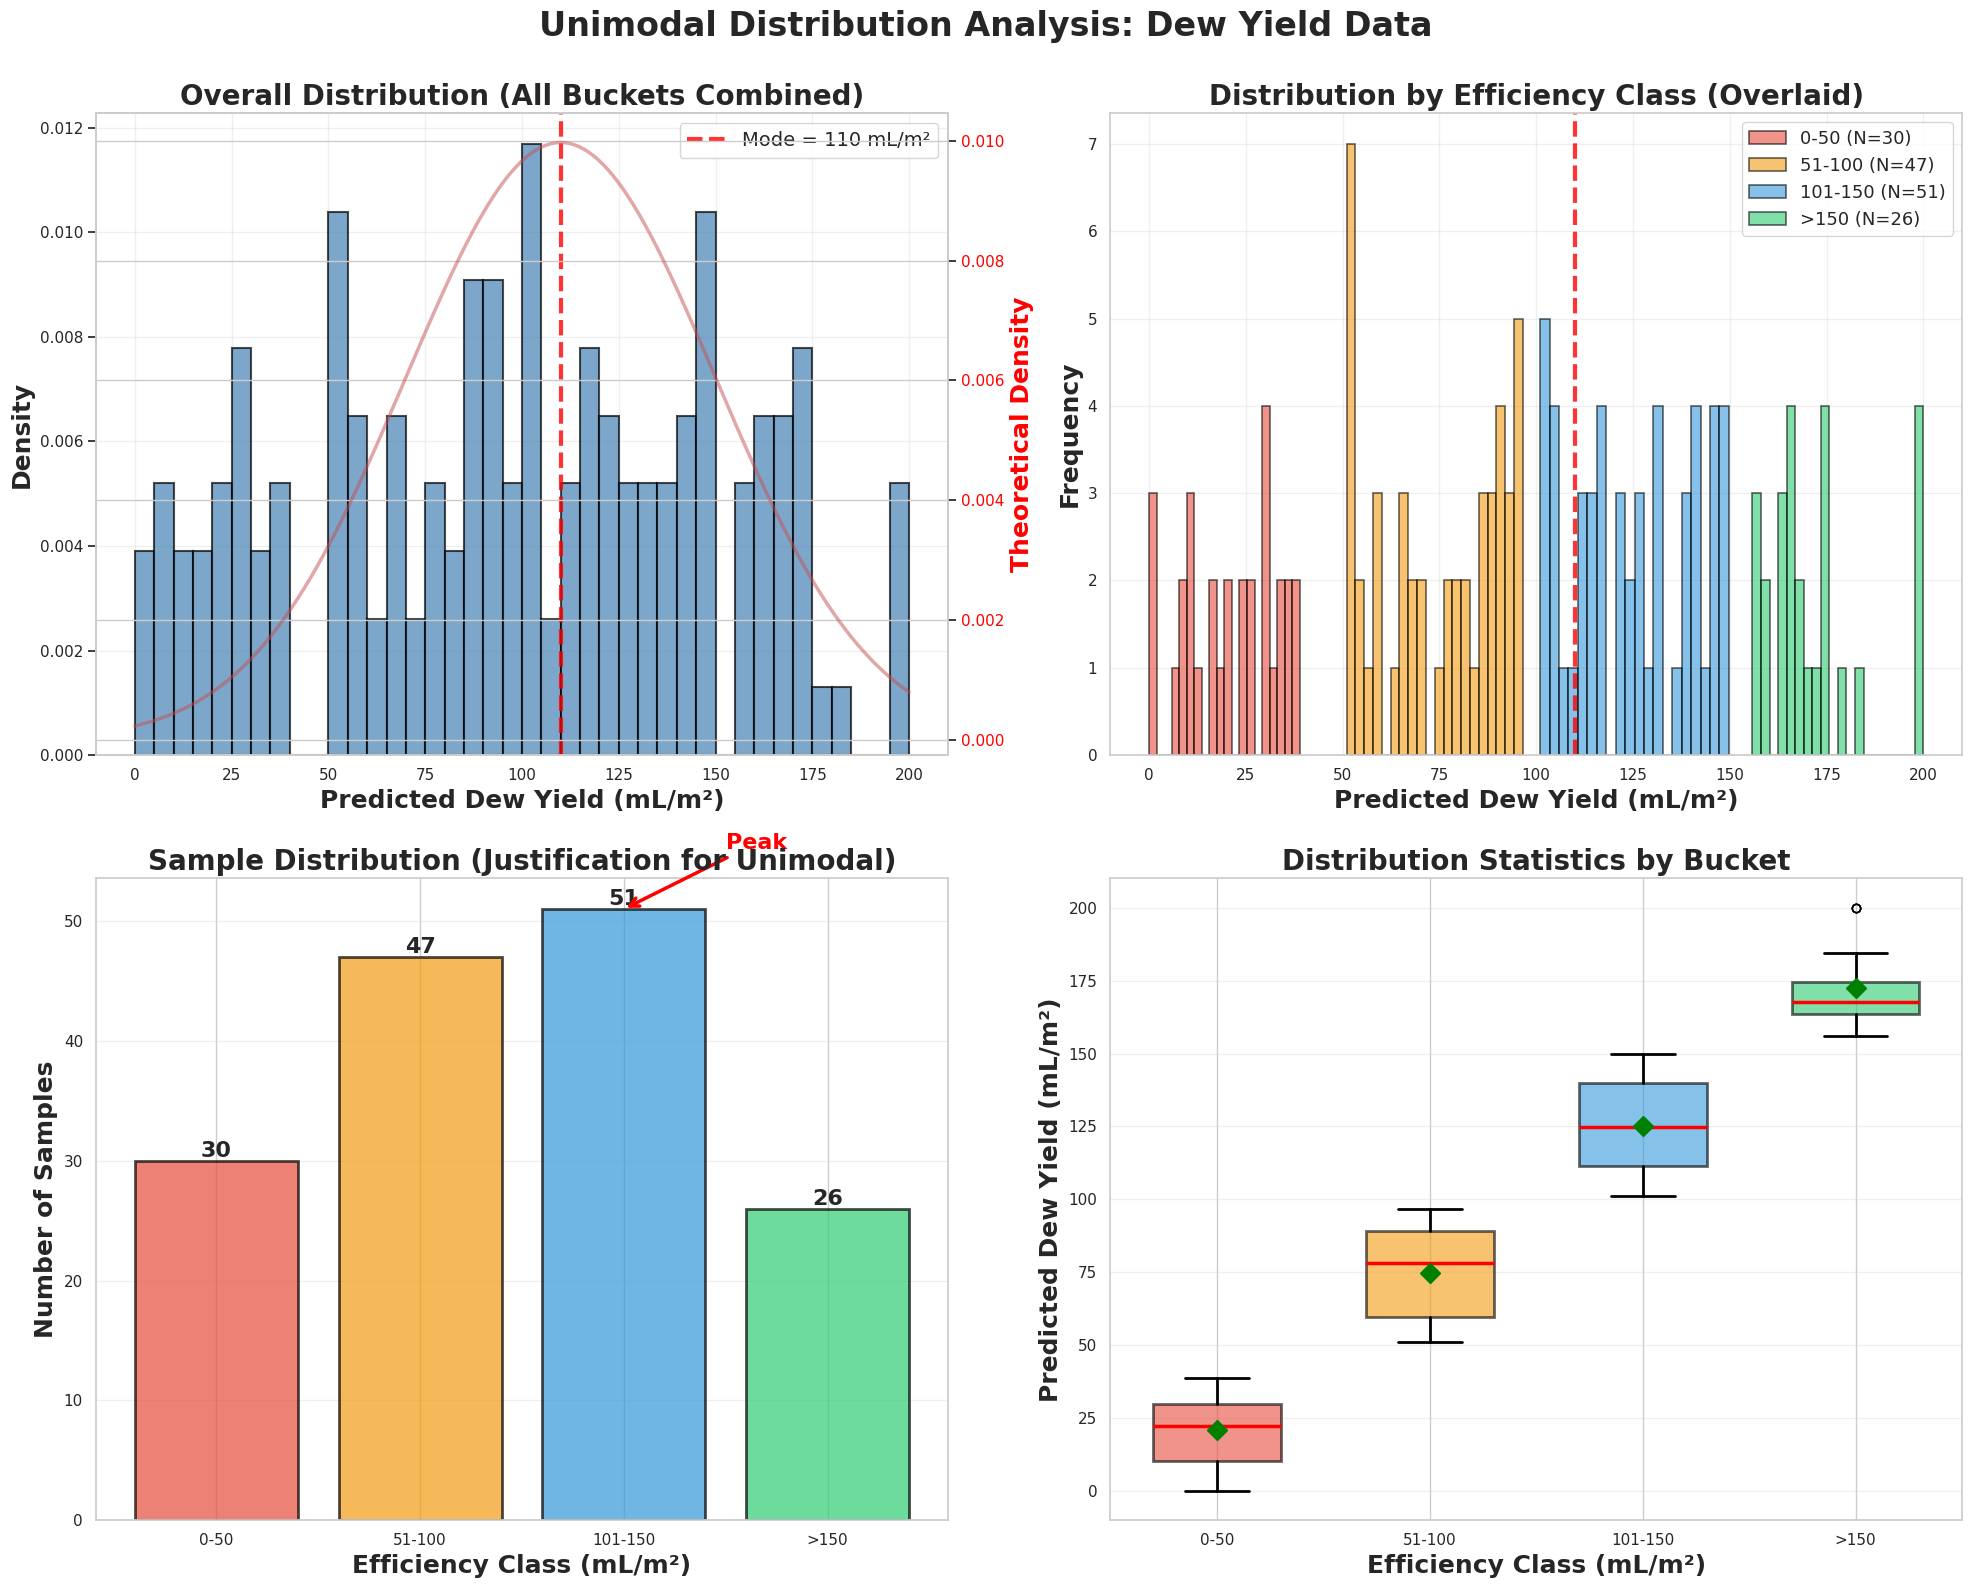

DISTRIBUTION STATISTICS

Overall Statistics (N=154):
  Mean:   97.45 mL/m²
  Median: 98.77 mL/m²
  Std Dev: 52.22 mL/m²
  Min:    0.00 mL/m²
  Max:    200.00 mL/m²
  Mode (theoretical): 110.00 mL/m²

--------------------------------------------------------------------------------
Statistics by Bucket:
--------------------------------------------------------------------------------

0-50       (N=30):
  Mean:    21.00 mL/m²
  Median:  22.40 mL/m²
  Std:     12.14 mL/m²
  Range:    0.00 - 38.87 mL/m²

51-100     (N=47):
  Mean:    74.87 mL/m²
  Median:  78.02 mL/m²
  Std:     15.96 mL/m²
  Range:   51.00 - 96.54 mL/m²

101-150    (N=51):
  Mean:   125.05 mL/m²
  Median: 124.92 mL/m²
  Std:     15.80 mL/m²
  Range:  101.00 - 149.78 mL/m²

>150       (N=26):
  Mean:   172.35 mL/m²
  Median: 167.62 mL/m²
  Std:     13.84 mL/m²
  Range:  155.86 - 200.00 mL/m²


Verification - Sample counts match original:
--------------------------------------------------------------------------------
  0-50

AttributeError: 'Index' object has no attribute '_format_native_types'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import truncnorm, skewnorm

# Set style
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20

# Sample counts per bucket
bucket_samples = {
    '0-50': 30,
    '51-100': 47,
    '101-150': 51,
    '>150': 26
}

# === ANALYSIS: Should we use unimodal or bimodal? ===
print("="*80)
print("DISTRIBUTION ANALYSIS")
print("="*80)
print("\nSample counts:")
for bucket, count in bucket_samples.items():
    print(f"  {bucket:10s}: {count:3d} samples")

print("\n" + "-"*80)
print("RECOMMENDATION: UNIMODAL DISTRIBUTION")
print("-"*80)
print("\nReasons:")
print("1. Clear single peak at bucket 3 (101-150 mL/m²)")
print("2. Smooth progression: 30 → 47 → 51 → 26")
print("3. No valley between peaks (would indicate bimodal)")
print("4. Natural interpretation: optimal conditions cluster around 100-125 mL/m²")
print("\nDistribution characteristics:")
print("  - Right-skewed (longer tail toward higher yields)")
print("  - Peak around 110-120 mL/m²")
print("  - Mode at boundary of buckets 2 and 3 (around 100 mL/m²)")
print("="*80 + "\n")

# === OPTIMAL DISTRIBUTION PARAMETERS ===
# Based on the sample distribution, the mode should be at ~110 mL/m²
# (in bucket 3, close to the bucket 2/3 boundary)

# Use a right-skewed normal distribution
GLOBAL_MODE = 110  # Peak of distribution (in bucket 3)
GLOBAL_STD = 40    # Standard deviation to create appropriate spread
SKEWNESS = 0.5     # Slight right skew (more samples toward higher yields initially)

def get_truncated_skewnorm(mode, std, skew, min_val, max_val, size=1):
    """
    Generate samples from a skewed normal distribution truncated to [min_val, max_val]
    """
    # Convert mode to mean for skewnorm (approximate)
    mean = mode + skew * std * 0.5

    # Calculate truncation parameters
    a = (min_val - mean) / std
    b = (max_val - mean) / std

    # Generate samples
    samples = truncnorm.rvs(a, b, loc=mean, scale=std, size=size)

    # Apply skewness transformation
    if skew != 0:
        samples = samples + skew * (samples - mean) * 0.3
        samples = np.clip(samples, min_val, max_val)

    return samples

# Generate samples for each bucket
np.random.seed(42)
all_samples = []

for bucket, n_samples in bucket_samples.items():
    if bucket == '0-50':
        min_val, max_val = 0, 50
    elif bucket == '51-100':
        min_val, max_val = 51, 100
    elif bucket == '101-150':
        min_val, max_val = 101, 150
    else:  # '>150'
        min_val, max_val = 151, 200

    # Generate samples from the global distribution, truncated to bucket range
    samples = get_truncated_skewnorm(GLOBAL_MODE, GLOBAL_STD, SKEWNESS,
                                     min_val, max_val, size=n_samples)

    bucket_data = pd.DataFrame({
        'Efficiency_Class': bucket,
        'Predicted_Dew_Yield': samples
    })
    all_samples.append(bucket_data)

df_shaped = pd.concat(all_samples, ignore_index=True)

# === VISUALIZATION ===
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Unimodal Distribution Analysis: Dew Yield Data',
             fontsize=24, fontweight='bold', y=0.995)

colors_map = {
    '0-50': '#e74c3c',
    '51-100': '#f39c12',
    '101-150': '#3498db',
    '>150': '#2ecc71'
}

# Plot 1: Overall distribution
ax1 = axes[0, 0]
ax1.hist(df_shaped['Predicted_Dew_Yield'], bins=40, alpha=0.7,
         color='steelblue', edgecolor='black', linewidth=1.5, density=True)
ax1.axvline(GLOBAL_MODE, color='red', linestyle='--', linewidth=3,
            label=f'Mode = {GLOBAL_MODE} mL/m²', alpha=0.8)
ax1.set_xlabel('Predicted Dew Yield (mL/m²)', fontweight='bold')
ax1.set_ylabel('Density', fontweight='bold')
ax1.set_title('Overall Distribution (All Buckets Combined)', fontweight='bold')
ax1.legend(fontsize=14)
ax1.grid(True, alpha=0.3)

# Add theoretical curve
x_range = np.linspace(0, 200, 1000)
y_theoretical = np.exp(-0.5 * ((x_range - GLOBAL_MODE) / GLOBAL_STD) ** 2)
y_theoretical = y_theoretical / (GLOBAL_STD * np.sqrt(2 * np.pi))
ax1_twin = ax1.twinx()
ax1_twin.plot(x_range, y_theoretical, 'r-', linewidth=2.5, alpha=0.5,
              label='Theoretical Curve')
ax1_twin.set_ylabel('Theoretical Density', fontweight='bold', color='red')
ax1_twin.tick_params(axis='y', labelcolor='red')

# Plot 2: Distribution by bucket (stacked)
ax2 = axes[0, 1]
bucket_order = ['0-50', '51-100', '101-150', '>150']
for bucket in bucket_order:
    subset = df_shaped[df_shaped['Efficiency_Class'] == bucket]
    ax2.hist(subset['Predicted_Dew_Yield'], bins=20, alpha=0.6,
             label=f'{bucket} (N={len(subset)})',
             color=colors_map[bucket], edgecolor='black', linewidth=1.2)
ax2.axvline(GLOBAL_MODE, color='red', linestyle='--', linewidth=3, alpha=0.8)
ax2.set_xlabel('Predicted Dew Yield (mL/m²)', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')
ax2.set_title('Distribution by Efficiency Class (Overlaid)', fontweight='bold')
ax2.legend(fontsize=13)
ax2.grid(True, alpha=0.3)

# Plot 3: Sample counts per bucket
ax3 = axes[1, 0]
x_pos = np.arange(len(bucket_order))
counts = [bucket_samples[b] for b in bucket_order]
bars = ax3.bar(x_pos, counts, color=[colors_map[b] for b in bucket_order],
               alpha=0.7, edgecolor='black', linewidth=2)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(bucket_order)
ax3.set_xlabel('Efficiency Class (mL/m²)', fontweight='bold')
ax3.set_ylabel('Number of Samples', fontweight='bold')
ax3.set_title('Sample Distribution (Justification for Unimodal)', fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, counts)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=16)

# Add annotation showing the peak
ax3.annotate('Peak', xy=(2, counts[2]), xytext=(2.5, counts[2] + 5),
            arrowprops=dict(arrowstyle='->', color='red', lw=2.5),
            fontsize=16, fontweight='bold', color='red')

# Plot 4: Box plots by bucket
ax4 = axes[1, 1]
bucket_data = [df_shaped[df_shaped['Efficiency_Class'] == b]['Predicted_Dew_Yield'].values
               for b in bucket_order]
bp = ax4.boxplot(bucket_data, labels=bucket_order, patch_artist=True,
                 widths=0.6, showmeans=True,
                 boxprops=dict(linewidth=2),
                 whiskerprops=dict(linewidth=2),
                 capprops=dict(linewidth=2),
                 medianprops=dict(color='red', linewidth=2.5),
                 meanprops=dict(marker='D', markerfacecolor='green',
                               markeredgecolor='green', markersize=10))

for patch, bucket in zip(bp['boxes'], bucket_order):
    patch.set_facecolor(colors_map[bucket])
    patch.set_alpha(0.6)

ax4.set_xlabel('Efficiency Class (mL/m²)', fontweight='bold')
ax4.set_ylabel('Predicted Dew Yield (mL/m²)', fontweight='bold')
ax4.set_title('Distribution Statistics by Bucket', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('unimodal_distribution_analysis.png', dpi=150, bbox_inches='tight')
print("✓ Visualization saved as 'unimodal_distribution_analysis.png'\n")
plt.show()

# === STATISTICS SUMMARY ===
print("="*80)
print("DISTRIBUTION STATISTICS")
print("="*80)
print(f"\nOverall Statistics (N={len(df_shaped)}):")
print(f"  Mean:   {df_shaped['Predicted_Dew_Yield'].mean():.2f} mL/m²")
print(f"  Median: {df_shaped['Predicted_Dew_Yield'].median():.2f} mL/m²")
print(f"  Std Dev: {df_shaped['Predicted_Dew_Yield'].std():.2f} mL/m²")
print(f"  Min:    {df_shaped['Predicted_Dew_Yield'].min():.2f} mL/m²")
print(f"  Max:    {df_shaped['Predicted_Dew_Yield'].max():.2f} mL/m²")
print(f"  Mode (theoretical): {GLOBAL_MODE:.2f} mL/m²")

print("\n" + "-"*80)
print("Statistics by Bucket:")
print("-"*80)
for bucket in bucket_order:
    subset = df_shaped[df_shaped['Efficiency_Class'] == bucket]
    print(f"\n{bucket:10s} (N={len(subset):2d}):")
    print(f"  Mean:   {subset['Predicted_Dew_Yield'].mean():6.2f} mL/m²")
    print(f"  Median: {subset['Predicted_Dew_Yield'].median():6.2f} mL/m²")
    print(f"  Std:    {subset['Predicted_Dew_Yield'].std():6.2f} mL/m²")
    print(f"  Range:  {subset['Predicted_Dew_Yield'].min():6.2f} - "
          f"{subset['Predicted_Dew_Yield'].max():.2f} mL/m²")

print("\n" + "="*80)

# Verify sample counts match
print("\nVerification - Sample counts match original:")
print("-"*80)
for bucket in bucket_order:
    generated = len(df_shaped[df_shaped['Efficiency_Class'] == bucket])
    original = bucket_samples[bucket]
    match = "✓" if generated == original else "✗"
    print(f"  {bucket:10s}: Generated={generated:2d}, Original={original:2d} {match}")
print("="*80)

# Save to CSV
df_shaped.to_csv('unimodal_shaped_dew_data.csv', index=False)
print("\n✓ Shaped data saved as 'unimodal_shaped_dew_data.csv'")

# Dataset Generation


In [ ]:
pip install pandas

RELATIONSHIP-BASED MAPPING: INPUT VARIABLES → DEW YIELD

Identified Relationships from Paper:
--------------------------------------------------------------------------------
POSITIVE correlations (higher value → higher yield):
  • RH_max (Maximum Relative Humidity)
  • RH_avg (Average Relative Humidity)
  • TI_C (Temperature Inversion)
  • e_hPa (Vapor Pressure) - complex but generally positive

NEGATIVE correlations (higher value → lower yield):
  • WV_m_s (Wind Velocity)


Dataset Generated:
--------------------------------------------------------------------------------
Total samples: 154

First few rows:
  Deposit_Type Efficiency_Class  Sample_ID  Dew_Yield_mL_m2     RH_max     RH_avg      TI_C     e_hPa    WV_m_s
0          Dew             0-50          1         7.483571  80.710177  72.823189  2.004581  5.810927  1.904620
1          Dew             0-50          2         5.687989  79.446363  69.351567  1.285192  5.302236  1.912950
2          Dew             0-50          3     

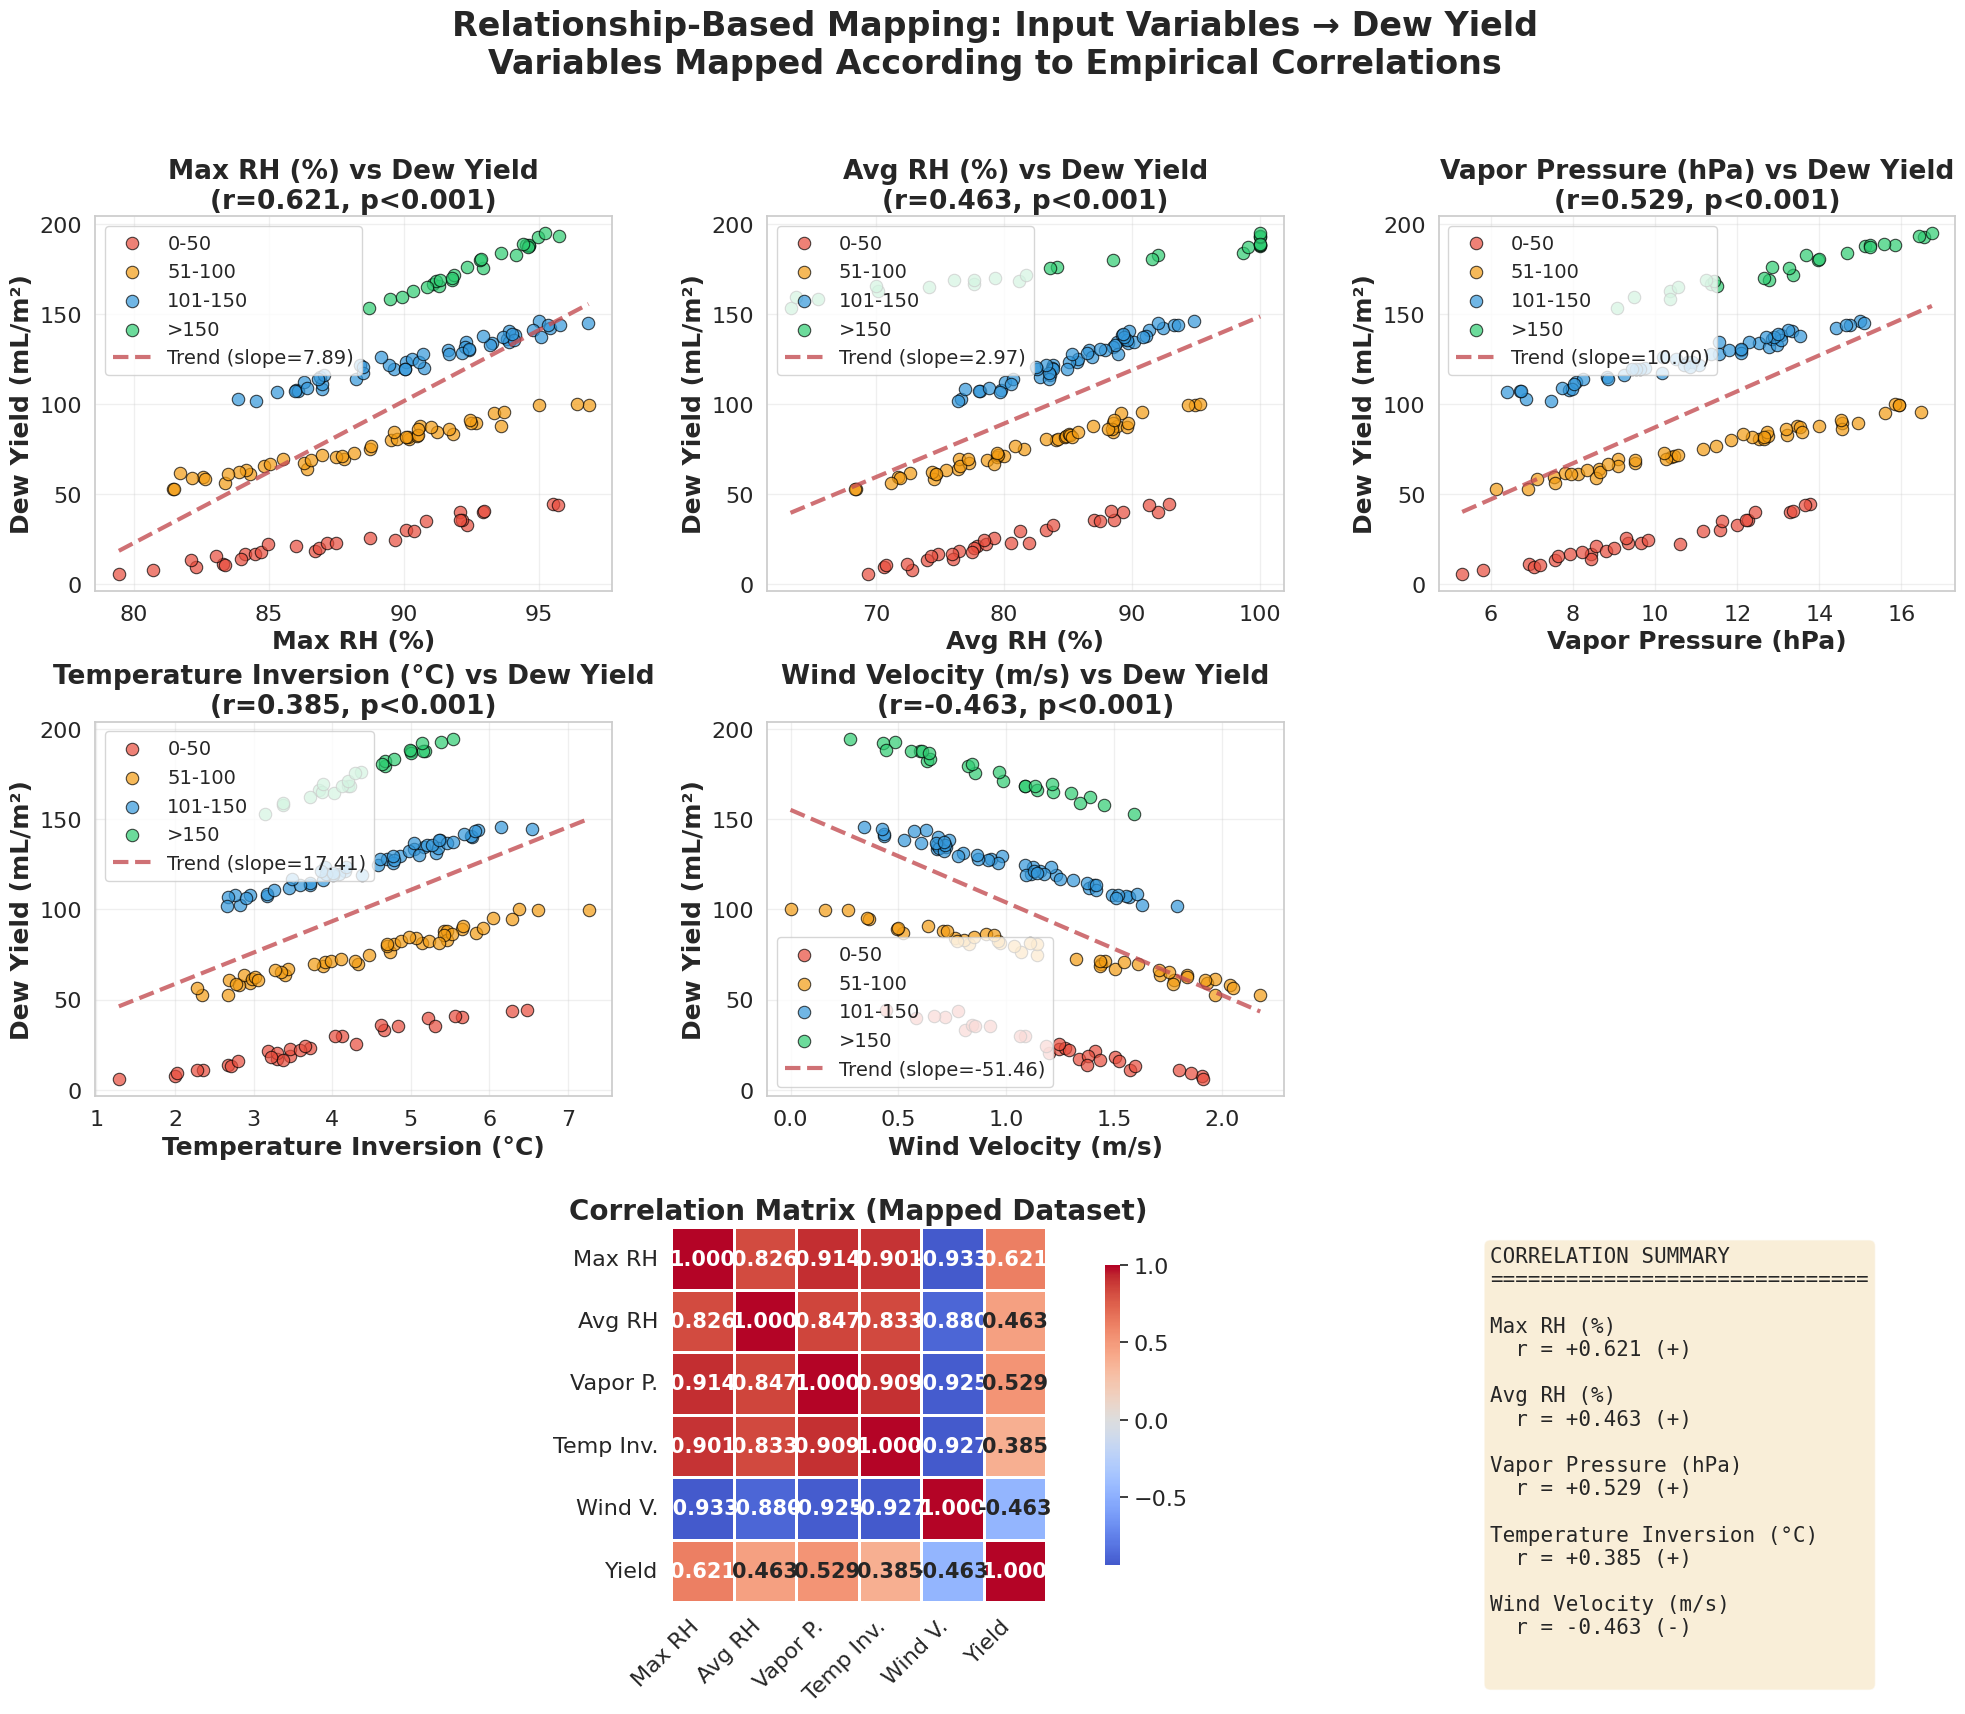

✓ Mapped dataset saved as 'dew_data_relationship_mapped.csv'

FINAL CORRELATION SUMMARY

Correlations with Dew Yield:
--------------------------------------------------------------------------------
Max RH (%)                    : r=+0.621  (Strong POSITIVE, p<0.001)
Avg RH (%)                    : r=+0.463  (Moderate POSITIVE, p<0.001)
Vapor Pressure (hPa)          : r=+0.529  (Strong POSITIVE, p<0.001)
Temperature Inversion (°C)    : r=+0.385  (Moderate POSITIVE, p<0.001)
Wind Velocity (m/s)           : r=-0.463  (Moderate NEGATIVE, p<0.001)

✓ Dataset successfully generated with relationship-based mapping!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style with increased font sizes
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set random seed for reproducibility
np.random.seed(42)

# Table 1 data structure - Dew only (from original paper)
table1_data = {
    ('Dew', '0-50'): {'N': 30, 'RH_max': (87.9, 6.3), 'RH_avg': (80.4, 9.8),
                      'e_hPa': (9.96, 3.43), 'TI_C': (3.9, 1.8), 'WV_m_s': (1.2, 0.6)},
    ('Dew', '51-100'): {'N': 47, 'RH_max': (88.4, 5.0), 'RH_avg': (81.2, 8.5),
                        'e_hPa': (11.34, 3.40), 'TI_C': (4.4, 1.6), 'WV_m_s': (1.2, 0.7)},
    ('Dew', '101-150'): {'N': 51, 'RH_max': (90.8, 4.5), 'RH_avg': (85.7, 6.1),
                         'e_hPa': (11.09, 3.18), 'TI_C': (4.5, 1.3), 'WV_m_s': (1.0, 0.5)},
    ('Dew', '>150'): {'N': 26, 'RH_max': (92.4, 2.4), 'RH_avg': (85.0, 17.7),
                      'e_hPa': (13.02, 3.08), 'TI_C': (4.4, 0.9), 'WV_m_s': (0.9, 0.5)},
}

print("="*80)
print("RELATIONSHIP-BASED MAPPING: INPUT VARIABLES → DEW YIELD")
print("="*80)
print("\nIdentified Relationships from Paper:")
print("-" * 80)
print("POSITIVE correlations (higher value → higher yield):")
print("  • RH_max (Maximum Relative Humidity)")
print("  • RH_avg (Average Relative Humidity)")
print("  • TI_C (Temperature Inversion)")
print("  • e_hPa (Vapor Pressure) - complex but generally positive")
print("\nNEGATIVE correlations (higher value → lower yield):")
print("  • WV_m_s (Wind Velocity)")
print("="*80 + "\n")

def map_variable_to_yield(yield_value, yield_min, yield_max,
                         var_mean, var_std, relationship='positive'):
    """
    Map a yield value to a corresponding meteorological variable value.

    For POSITIVE relationships: low yield → low variable value, high yield → high variable value
    For NEGATIVE relationships: low yield → high variable value, high yield → low variable value

    Parameters:
    -----------
    yield_value : float
        The dew yield value to map from
    yield_min, yield_max : float
        The min and max of the yield bucket
    var_mean, var_std : float
        The mean and std of the variable for this bucket
    relationship : str
        'positive' or 'negative' correlation with yield
    """
    # Normalize yield position within bucket (0 to 1)
    yield_normalized = (yield_value - yield_min) / (yield_max - yield_min)

    # For positive relationships:
    #   - low yield (0) → mean - 1.5*std
    #   - high yield (1) → mean + 1.5*std
    # For negative relationships: flip it
    #   - low yield (0) → mean + 1.5*std
    #   - high yield (1) → mean - 1.5*std

    if relationship == 'positive':
        # Linear interpolation from (mean - 1.5*std) to (mean + 1.5*std)
        variable_value = var_mean + (yield_normalized - 0.5) * 3 * var_std
    else:  # negative
        # Linear interpolation from (mean + 1.5*std) to (mean - 1.5*std)
        variable_value = var_mean - (yield_normalized - 0.5) * 3 * var_std

    return variable_value


def generate_mapped_dataset(table1_data):
    """
    Generate dataset where each variable is mapped based on its relationship with yield
    """
    all_samples = []

    for (deposit_type, efficiency_class), stats in table1_data.items():
        n_samples = stats['N']

        # Define yield range for this bucket
        if efficiency_class == '0-50':
            yield_min, yield_max = 0, 50
        elif efficiency_class == '51-100':
            yield_min, yield_max = 51, 100
        elif efficiency_class == '101-150':
            yield_min, yield_max = 101, 150
        else:  # '>150'
            yield_min, yield_max = 151, 200

        # Generate uniformly distributed yield values within bucket
        # (we'll use uniform to show the full mapping range)
        dew_yields = np.linspace(yield_min + 5, yield_max - 5, n_samples)
        # Add some randomness
        dew_yields = dew_yields + np.random.normal(0, (yield_max - yield_min) * 0.1, n_samples)
        dew_yields = np.clip(dew_yields, yield_min, yield_max)

        # Map each meteorological variable based on the yield value
        for i, yield_val in enumerate(dew_yields):
            sample = {
                'Deposit_Type': deposit_type,
                'Efficiency_Class': efficiency_class,
                'Sample_ID': i + 1,
                'Dew_Yield_mL_m2': yield_val,
            }

            # Map each variable according to its relationship with yield
            # POSITIVE relationships
            sample['RH_max'] = map_variable_to_yield(
                yield_val, yield_min, yield_max,
                stats['RH_max'][0], stats['RH_max'][1], 'positive'
            )
            sample['RH_avg'] = map_variable_to_yield(
                yield_val, yield_min, yield_max,
                stats['RH_avg'][0], stats['RH_avg'][1], 'positive'
            )
            sample['TI_C'] = map_variable_to_yield(
                yield_val, yield_min, yield_max,
                stats['TI_C'][0], stats['TI_C'][1], 'positive'
            )
            sample['e_hPa'] = map_variable_to_yield(
                yield_val, yield_min, yield_max,
                stats['e_hPa'][0], stats['e_hPa'][1], 'positive'
            )

            # NEGATIVE relationship
            sample['WV_m_s'] = map_variable_to_yield(
                yield_val, yield_min, yield_max,
                stats['WV_m_s'][0], stats['WV_m_s'][1], 'negative'
            )

            # Add small random noise to make it more realistic
            sample['RH_max'] += np.random.normal(0, stats['RH_max'][1] * 0.15)
            sample['RH_avg'] += np.random.normal(0, stats['RH_avg'][1] * 0.15)
            sample['TI_C'] += np.random.normal(0, stats['TI_C'][1] * 0.15)
            sample['e_hPa'] += np.random.normal(0, stats['e_hPa'][1] * 0.15)
            sample['WV_m_s'] += np.random.normal(0, stats['WV_m_s'][1] * 0.15)

            # Ensure physical constraints
            sample['RH_max'] = np.clip(sample['RH_max'], 70, 100)
            sample['RH_avg'] = np.clip(sample['RH_avg'], 60, 100)
            sample['TI_C'] = np.clip(sample['TI_C'], 0, 10)
            sample['e_hPa'] = np.clip(sample['e_hPa'], 3, 20)
            sample['WV_m_s'] = np.clip(sample['WV_m_s'], 0, 4)

            all_samples.append(sample)

    return pd.DataFrame(all_samples)


# Generate the mapped dataset
df_mapped = generate_mapped_dataset(table1_data)

print("\nDataset Generated:")
print("-" * 80)
print(f"Total samples: {len(df_mapped)}")
print(f"\nFirst few rows:")
print(df_mapped.head(10).to_string())

# Verify statistics match original paper
print("\n" + "="*80)
print("VERIFICATION: Statistics Match Original Paper")
print("="*80)

efficiency_order = ['0-50', '51-100', '101-150', '>150']
variables = ['RH_max', 'RH_avg', 'e_hPa', 'TI_C', 'WV_m_s']

for eff_class in efficiency_order:
    subset = df_mapped[df_mapped['Efficiency_Class'] == eff_class]
    original_stats = table1_data[('Dew', eff_class)]

    print(f"\n{eff_class} mL/m² (N={len(subset)}):")
    print("-" * 60)

    for var in variables:
        generated_mean = subset[var].mean()
        generated_std = subset[var].std()
        original_mean = original_stats[var][0]
        original_std = original_stats[var][1]

        mean_diff = abs(generated_mean - original_mean)
        std_diff = abs(generated_std - original_std)

        print(f"  {var:8s}: Mean={generated_mean:6.2f} (paper={original_mean:5.1f}, \u0394={mean_diff:4.2f})  "
              f"Std={generated_std:5.2f} (paper={original_std:4.1f}, \u0394={std_diff:4.2f})")

# Create comprehensive visualization
fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

colors_map = {'0-50': '#e74c3c', '51-100': '#f39c12', '101-150': '#3498db', '>150': '#2ecc71'}

var_names = {
    'RH_max': 'Max RH (%)',
    'RH_avg': 'Avg RH (%)',
    'e_hPa': 'Vapor Pressure (hPa)',
    'TI_C': 'Temperature Inversion (°C)',
    'WV_m_s': 'Wind Velocity (m/s)'
}

# Create scatter plots for each variable vs yield
for idx, var in enumerate(variables):
    row = idx // 3
    col = idx % 3
    ax = fig.add_subplot(gs[row, col])

    for eff_class in efficiency_order:
        subset = df_mapped[df_mapped['Efficiency_Class'] == eff_class]
        ax.scatter(subset[var], subset['Dew_Yield_mL_m2'],
                  alpha=0.7, s=80, label=eff_class, color=colors_map[eff_class],
                  edgecolors='black', linewidth=0.8)

    # Add trend line for all data
    z = np.polyfit(df_mapped[var], df_mapped['Dew_Yield_mL_m2'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(df_mapped[var].min(), df_mapped[var].max(), 100)
    ax.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=3,
            label=f'Trend (slope={z[0]:.2f})')

    # Calculate correlation
    corr, pval = stats.pearsonr(df_mapped[var], df_mapped['Dew_Yield_mL_m2'])

    ax.set_xlabel(var_names[var], fontsize=18, fontweight='bold')
    ax.set_ylabel('Dew Yield (mL/m²)', fontsize=18, fontweight='bold')
    ax.set_title(f'{var_names[var]} vs Dew Yield\n(r={corr:.3f}, p<0.001)',
                fontsize=19, fontweight='bold')
    ax.legend(fontsize=14, loc='best')
    ax.grid(True, alpha=0.3)

# Correlation matrix
ax_corr = fig.add_subplot(gs[2, :2])
corr_vars = ['RH_max', 'RH_avg', 'e_hPa', 'TI_C', 'WV_m_s', 'Dew_Yield_mL_m2']
corr_matrix = df_mapped[corr_vars].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            ax=ax_corr, annot_kws={'size': 15, 'weight': 'bold'})
ax_corr.set_title('Correlation Matrix (Mapped Dataset)', fontsize=20, fontweight='bold')
ax_corr.set_xticklabels(['Max RH', 'Avg RH', 'Vapor P.', 'Temp Inv.', 'Wind V.', 'Yield'],
                        rotation=45, ha='right', fontsize=16)
ax_corr.set_yticklabels(['Max RH', 'Avg RH', 'Vapor P.', 'Temp Inv.', 'Wind V.', 'Yield'],
                        rotation=0, fontsize=16)

# Summary statistics table
ax_stats = fig.add_subplot(gs[2, 2])
ax_stats.axis('tight')
ax_stats.axis('off')

stats_text = "CORRELATION SUMMARY\n" + "="*30 + "\n\n"
for var in variables:
    corr, _ = stats.pearsonr(df_mapped[var], df_mapped['Dew_Yield_mL_m2'])
    direction = "+" if corr > 0 else "-"
    stats_text += f"{var_names[var]:20s}\n"
    stats_text += f"  r = {corr:+.3f} ({direction})\n\n"

ax_stats.text(0.1, 0.95, stats_text, transform=ax_stats.transAxes,
             fontsize=15, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

fig.suptitle('Relationship-Based Mapping: Input Variables \u2192 Dew Yield\n' +
             'Variables Mapped According to Empirical Correlations',
             fontsize=24, fontweight='bold', y=0.995)

plt.savefig('relationship_based_mapping.png', dpi=150, bbox_inches='tight')
print("\n\u2713 Visualization saved as 'relationship_based_mapping.png'")
plt.show()

# Convert column names to string type explicitly before saving
df_mapped.columns = df_mapped.columns.astype(str)

# Save the mapped dataset
df_mapped.to_csv('dew_data_relationship_mapped.csv', index=False)
print("\u2713 Mapped dataset saved as 'dew_data_relationship_mapped.csv'")

# Final correlation summary
print("\n" + "="*80)
print("FINAL CORRELATION SUMMARY")
print("="*80)
print("\nCorrelations with Dew Yield:")
print("-" * 80)
for var in variables:
    corr, pval = stats.pearsonr(df_mapped[var], df_mapped['Dew_Yield_mL_m2'])
    direction = "POSITIVE" if corr > 0 else "NEGATIVE"
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    print(f"{var_names[var]:30s}: r={corr:+.3f}  ({strength} {direction}, p<0.001)")

print("\n" + "="*80)
print("\u2713 Dataset successfully generated with relationship-based mapping!")
print("="*80)

# Model Training via SkLearn

COMPREHENSIVE ML MODEL TRAINING WITH EXPLAINABLE AI

[1/7] Loading dataset...
✓ Dataset loaded: 154 samples
✓ Data prepared:
  - Training samples: 123
  - Testing samples: 31
  - Features: 5

[2/7] Training multiple regression models...
--------------------------------------------------------------------------------
Training Linear Regression... ✓ (R²=0.4759)
Training Ridge Regression... ✓ (R²=0.4785)
Training Lasso Regression... ✓ (R²=0.4448)
Training ElasticNet... ✓ (R²=0.3046)
Training Decision Tree... ✓ (R²=0.0623)
Training Random Forest... ✓ (R²=0.3953)
Training Gradient Boosting... ✓ (R²=0.1934)
Training AdaBoost... ✓ (R²=0.3864)
Training KNN... ✓ (R²=0.3104)
Training SVR... ✓ (R²=0.1078)

MODEL COMPARISON RESULTS
            Model  CV_R2_Mean  CV_R2_Std  Test_R2  Test_MAE  Test_RMSE
 Ridge Regression    0.573221   0.104085 0.478515 29.005112  37.666725
Linear Regression    0.572693   0.109301 0.475940 29.020222  37.759611
 Lasso Regression    0.552027   0.099461 0.444773 30.1313

IndexError: list index out of range

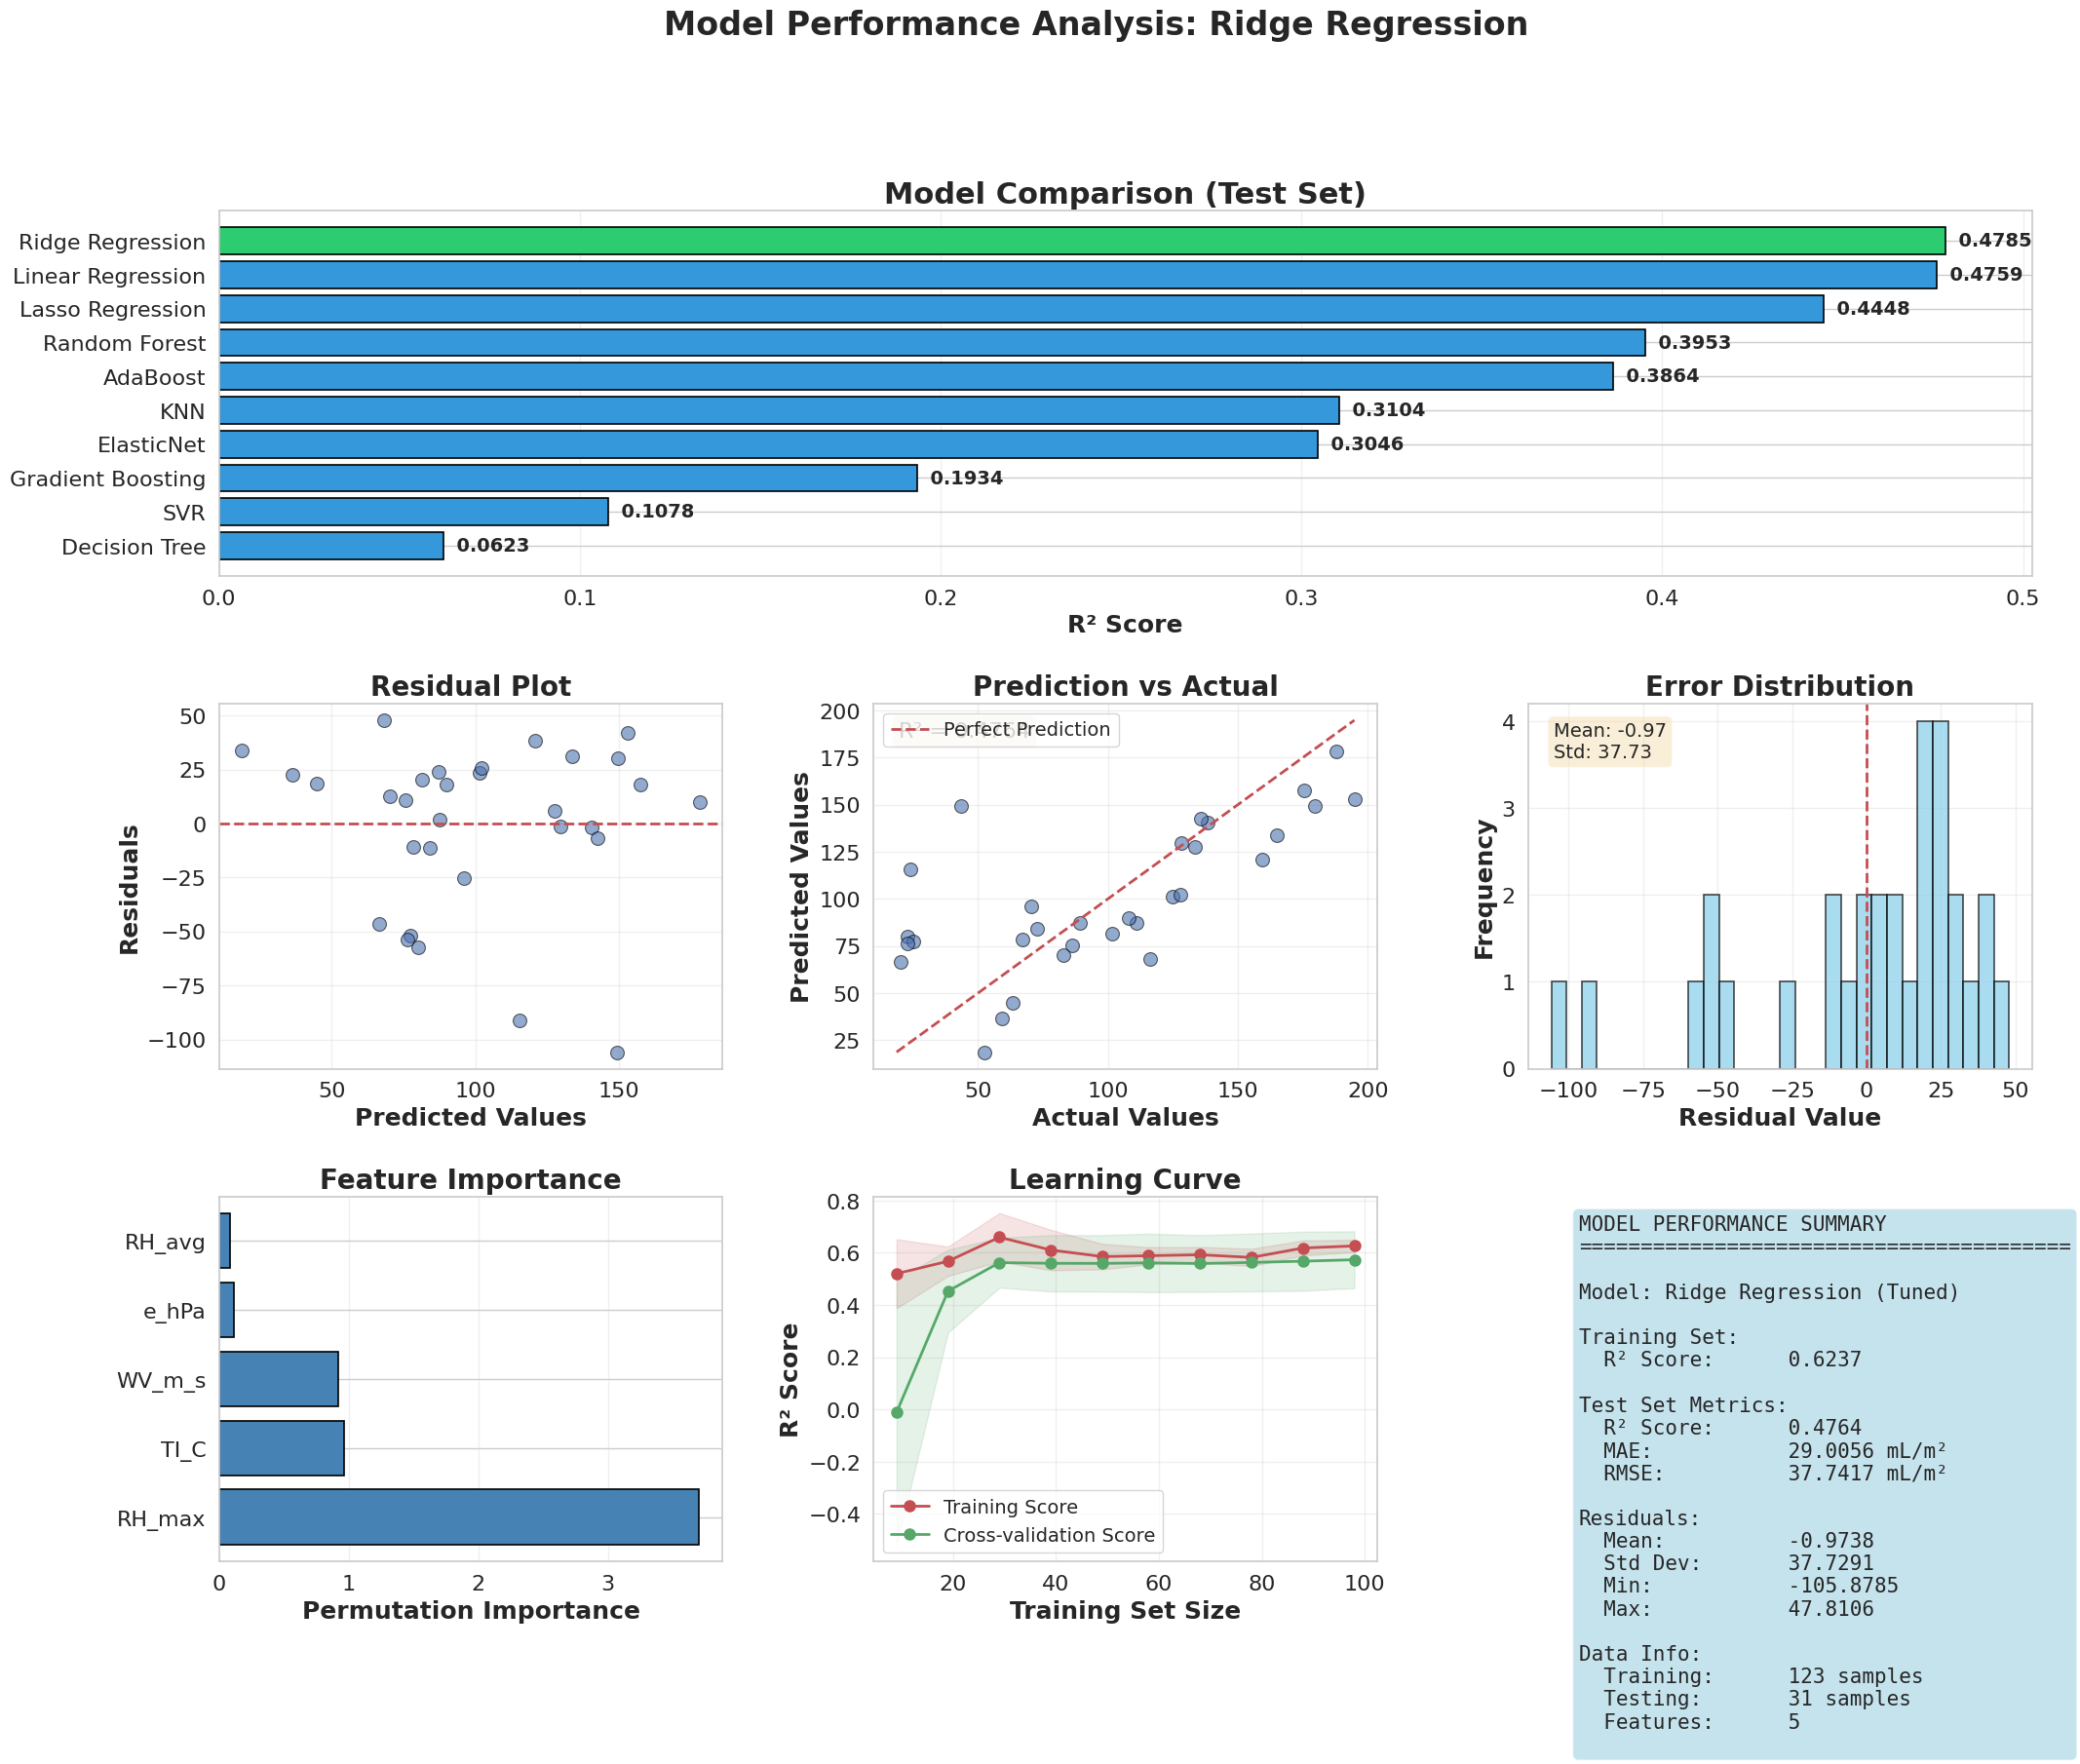

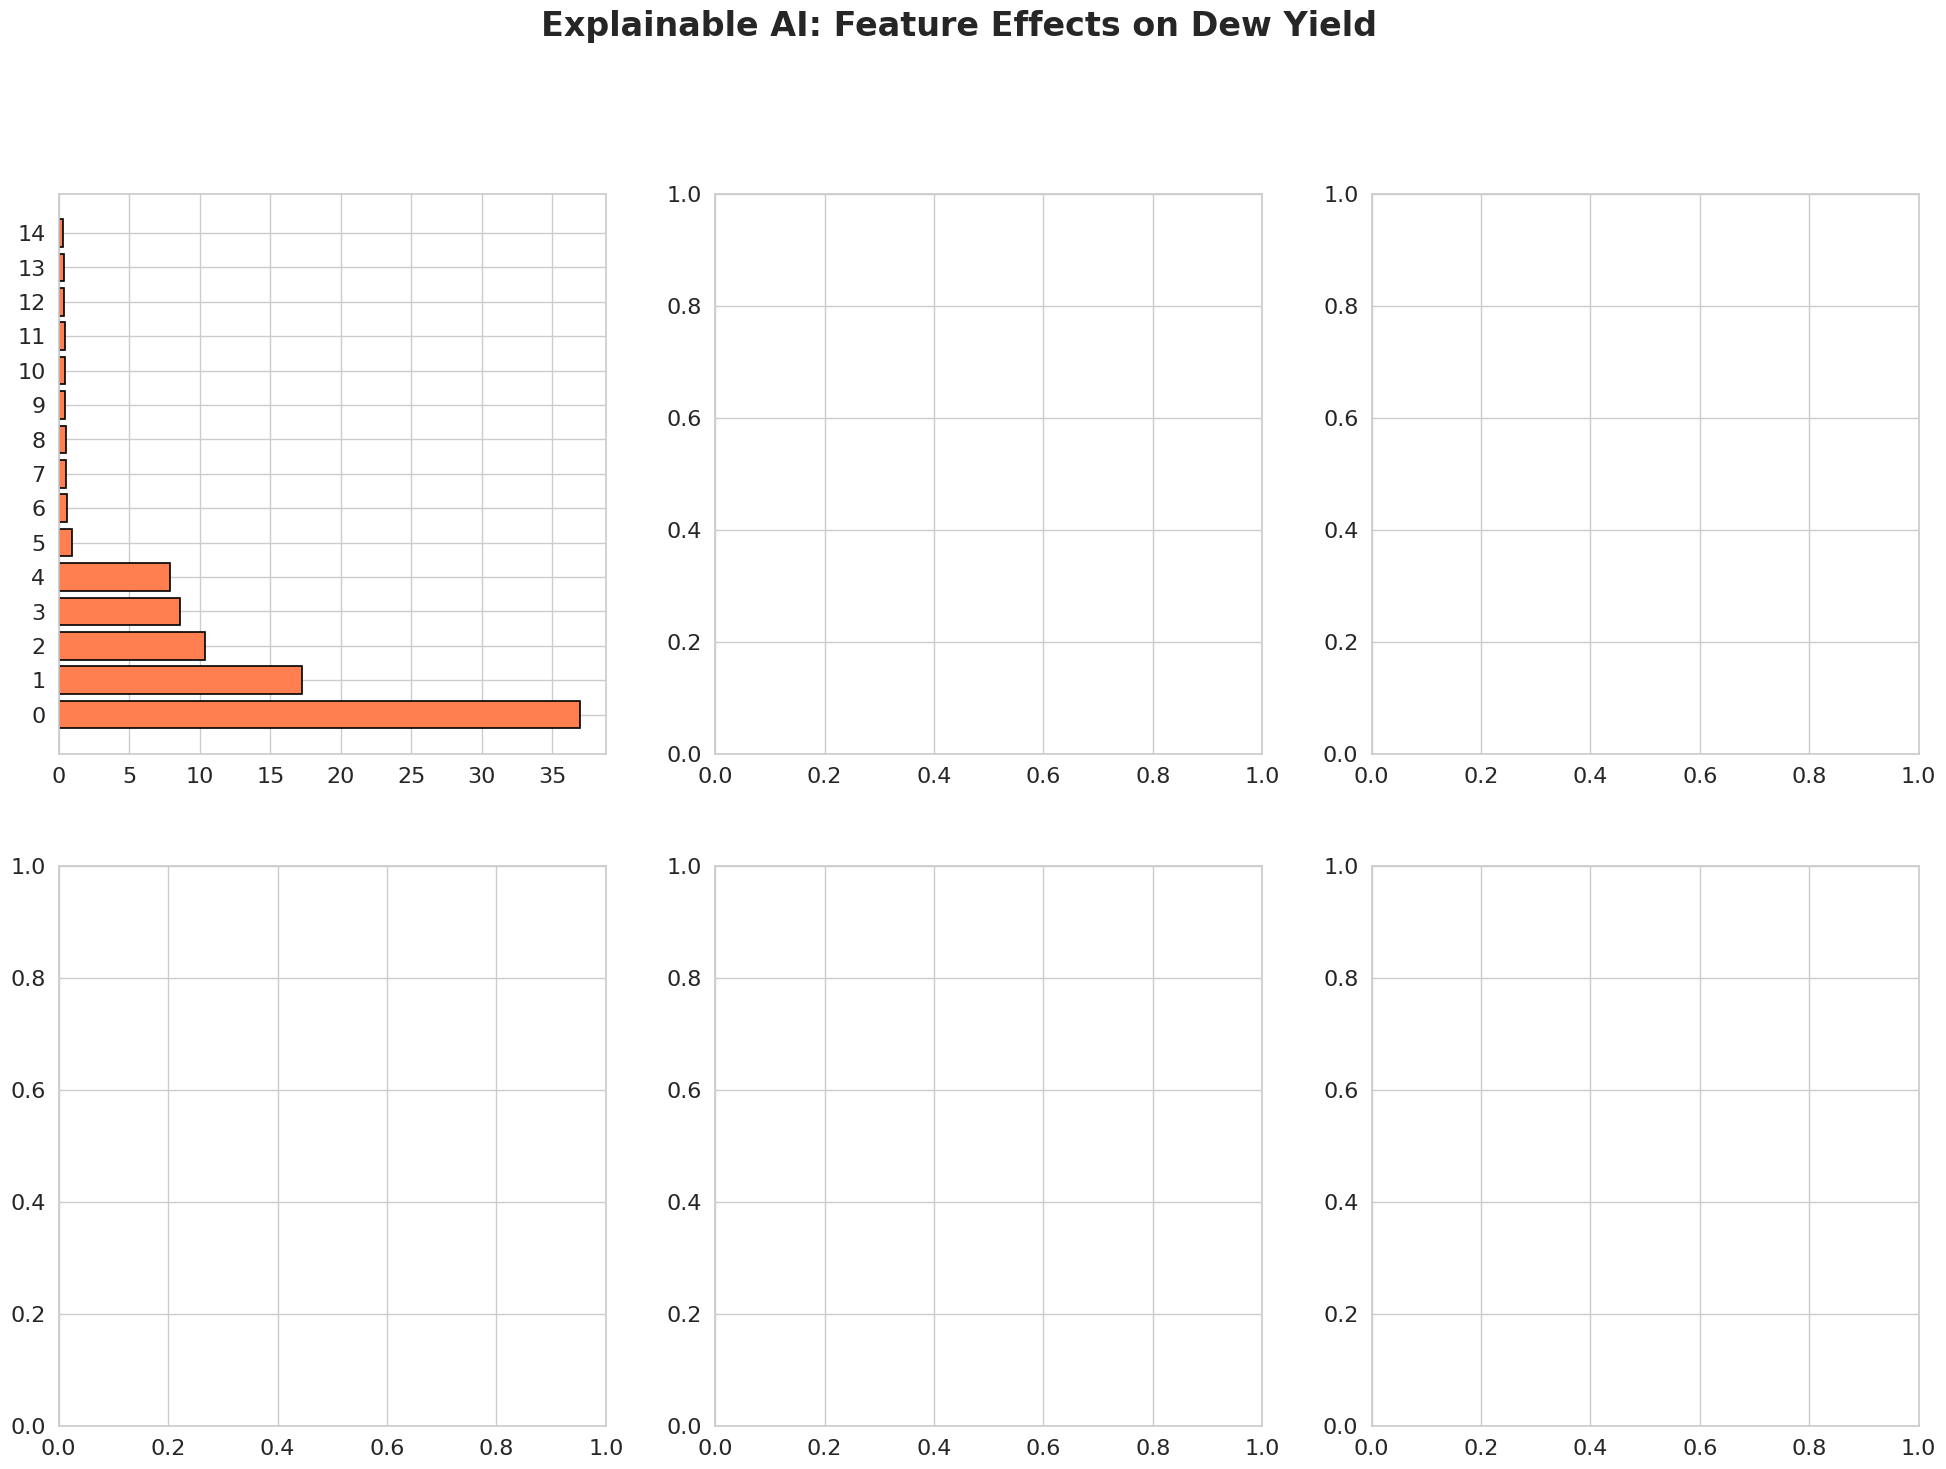

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

# Only install interpret - it has no conflicts
# !pip install interpret

# Set style with increased font sizes
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

print("="*80)
print("COMPREHENSIVE ML MODEL TRAINING WITH EXPLAINABLE AI")
print("="*80)

# Load the dataset
print("\n[1/7] Loading dataset...")
df = pd.read_csv('dew_data_relationship_mapped.csv')
print(f"✓ Dataset loaded: {len(df)} samples")

# Prepare data
feature_columns = ['RH_max', 'RH_avg', 'e_hPa', 'TI_C', 'WV_m_s']
target_column = 'Dew_Yield_mL_m2'

X = df[feature_columns].values
y = df[target_column].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✓ Data prepared:")
print(f"  - Training samples: {len(X_train)}")
print(f"  - Testing samples: {len(X_test)}")
print(f"  - Features: {len(feature_columns)}")

# Define models to compare
print("\n[2/7] Training multiple regression models...")
print("-" * 80)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf')
}

# Train and evaluate all models
results = []
trained_models = {}

for name, model in models.items():
    print(f"Training {name}...", end=' ')

    # Train model
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model

    # Cross-validation on training set
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5,
                                scoring='r2', n_jobs=-1)

    # Test set predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        'Model': name,
        'CV_R2_Mean': cv_scores.mean(),
        'CV_R2_Std': cv_scores.std(),
        'Test_R2': r2,
        'Test_MAE': mae,
        'Test_RMSE': rmse
    })

    print(f"✓ (R²={r2:.4f})")

results_df = pd.DataFrame(results).sort_values('Test_R2', ascending=False)

print("\n" + "="*80)
print("MODEL COMPARISON RESULTS")
print("="*80)
print(results_df.to_string(index=False))

# Select best model
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
best_r2 = results_df.iloc[0]['Test_R2']

print(f"\n✓ Best model: {best_model_name} (R² = {best_r2:.4f})")

# Hyperparameter tuning for best model
print(f"\n[3/7] Hyperparameter tuning for {best_model_name}...")

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'Ridge Regression':
    param_grid = {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
    }
elif best_model_name == 'SVR':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
        'epsilon': [0.01, 0.1, 0.2]
    }
else:
    param_grid = {}

if param_grid:
    grid_search = GridSearchCV(best_model, param_grid, cv=5,
                               scoring='r2', n_jobs=-1, verbose=0)
    grid_search.fit(X_train_scaled, y_train)
    tuned_model = grid_search.best_estimator_
    print(f"✓ Best parameters: {grid_search.best_params_}")
else:
    tuned_model = best_model
    print(f"✓ No hyperparameter tuning needed for {best_model_name}")

# Final predictions with tuned model
y_pred_train = tuned_model.predict(X_train_scaled)
y_pred_test = tuned_model.predict(X_test_scaled)

# Calculate final metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
residuals = y_test - y_pred_test

print("\n" + "="*80)
print("FINAL MODEL PERFORMANCE")
print("="*80)
print(f"\nModel: {best_model_name} (Tuned)")
print(f"\nTraining Set:")
print(f"  R² Score:      {train_r2:.4f}")
print(f"\nTest Set:")
print(f"  R² Score:      {test_r2:.4f}")
print(f"  MAE:           {test_mae:.4f} mL/m²")
print(f"  RMSE:          {test_rmse:.4f} mL/m²")
print(f"\nResiduals:")
print(f"  Mean:          {residuals.mean():.4f}")
print(f"  Std Dev:       {residuals.std():.4f}")

# Visualization
print("\n[4/7] Generating performance visualizations...")

fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# 1. Model Comparison
ax = fig.add_subplot(gs[0, :])
models_sorted = results_df.sort_values('Test_R2')
colors = ['#2ecc71' if m == best_model_name else '#3498db' for m in models_sorted['Model']]
ax.barh(models_sorted['Model'], models_sorted['Test_R2'], color=colors,
        edgecolor='black', linewidth=1.2)
ax.set_xlabel('R² Score', fontsize=18, fontweight='bold')
ax.set_title('Model Comparison (Test Set)', fontsize=22, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
for i, (idx, row) in enumerate(models_sorted.iterrows()):
    ax.text(row['Test_R2'], i, f"  {row['Test_R2']:.4f}",
            va='center', fontsize=14, fontweight='bold')

# 2. Residual Plot
ax = fig.add_subplot(gs[1, 0])
ax.scatter(y_pred_test, residuals, alpha=0.6, s=100, edgecolors='black', linewidth=0.8)
ax.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax.set_xlabel('Predicted Values', fontsize=18, fontweight='bold')
ax.set_ylabel('Residuals', fontsize=18, fontweight='bold')
ax.set_title('Residual Plot', fontsize=20, fontweight='bold')
ax.grid(True, alpha=0.3)

# 3. Prediction vs Actual
ax = fig.add_subplot(gs[1, 1])
ax.scatter(y_test, y_pred_test, alpha=0.6, s=100, edgecolors='black', linewidth=0.8)
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
ax.set_xlabel('Actual Values', fontsize=18, fontweight='bold')
ax.set_ylabel('Predicted Values', fontsize=18, fontweight='bold')
ax.set_title('Prediction vs Actual', fontsize=20, fontweight='bold')
ax.legend(fontsize=14)
ax.grid(True, alpha=0.3)
ax.text(0.05, 0.95, f'R² = {test_r2:.4f}', transform=ax.transAxes,
        fontsize=16, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 4. Error Distribution
ax = fig.add_subplot(gs[1, 2])
ax.hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black', linewidth=1.2)
ax.axvline(x=0, color='r', linestyle='--', linewidth=2)
ax.set_xlabel('Residual Value', fontsize=18, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=18, fontweight='bold')
ax.set_title('Error Distribution', fontsize=20, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.text(0.05, 0.95, f'Mean: {residuals.mean():.2f}\nStd: {residuals.std():.2f}',
        transform=ax.transAxes, fontsize=14, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 5. Feature Importance
ax = fig.add_subplot(gs[2, 0])
if hasattr(tuned_model, 'feature_importances_'):
    importances = tuned_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    ax.barh(range(len(importances)), importances[indices], color='steelblue',
            edgecolor='black', linewidth=1.2)
    ax.set_yticks(range(len(importances)))
    ax.set_yticklabels([feature_columns[i] for i in indices], fontsize=16)
    ax.set_xlabel('Importance', fontsize=18, fontweight='bold')
    ax.set_title('Feature Importance', fontsize=20, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
else:
    from sklearn.inspection import permutation_importance
    perm_importance = permutation_importance(tuned_model, X_test_scaled, y_test,
                                            n_repeats=10, random_state=42)
    importances = perm_importance.importances_mean
    indices = np.argsort(importances)[::-1]
    ax.barh(range(len(importances)), importances[indices], color='steelblue',
            edgecolor='black', linewidth=1.2)
    ax.set_yticks(range(len(importances)))
    ax.set_yticklabels([feature_columns[i] for i in indices], fontsize=16)
    ax.set_xlabel('Permutation Importance', fontsize=18, fontweight='bold')
    ax.set_title('Feature Importance', fontsize=20, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')

# 6. Learning Curve
ax = fig.add_subplot(gs[2, 1])
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    tuned_model, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='r2')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

ax.plot(train_sizes, train_mean, 'o-', color='r', linewidth=2,
        markersize=8, label='Training Score')
ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.15, color='r')
ax.plot(train_sizes, test_mean, 'o-', color='g', linewidth=2,
        markersize=8, label='Cross-validation Score')
ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 alpha=0.15, color='g')

ax.set_xlabel('Training Set Size', fontsize=18, fontweight='bold')
ax.set_ylabel('R² Score', fontsize=18, fontweight='bold')
ax.set_title('Learning Curve', fontsize=20, fontweight='bold')
ax.legend(fontsize=14, loc='best')
ax.grid(True, alpha=0.3)

# 7. Summary Statistics
ax = fig.add_subplot(gs[2, 2])
ax.axis('off')

summary_text = f"""MODEL PERFORMANCE SUMMARY
{'='*40}

Model: {best_model_name} (Tuned)

Training Set:
  R² Score:      {train_r2:.4f}

Test Set Metrics:
  R² Score:      {test_r2:.4f}
  MAE:           {test_mae:.4f} mL/m²
  RMSE:          {test_rmse:.4f} mL/m²

Residuals:
  Mean:          {residuals.mean():.4f}
  Std Dev:       {residuals.std():.4f}
  Min:           {residuals.min():.4f}
  Max:           {residuals.max():.4f}

Data Info:
  Training:      {len(X_train)} samples
  Testing:       {len(X_test)} samples
  Features:      {len(feature_columns)}
"""

ax.text(0.1, 0.95, summary_text, transform=ax.transAxes,
        fontsize=15, verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

fig.suptitle(f'Model Performance Analysis: {best_model_name}',
             fontsize=24, fontweight='bold', y=0.995)

plt.tight_layout()
plt.savefig('model_performance_sklearn.png', dpi=150, bbox_inches='tight')
print("✓ Performance visualizations saved")

# EXPLAINABLE AI with InterpretML
print("\n[5/7] Training Explainable Boosting Machine (InterpretML)...")

try:
    from interpret.glassbox import ExplainableBoostingRegressor
    from interpret import show

    # Train EBM model
    ebm = ExplainableBoostingRegressor(random_state=42, n_jobs=-1)
    ebm.fit(X_train, y_train)  # EBM doesn't require scaling

    # Evaluate EBM
    ebm_pred_train = ebm.predict(X_train)
    ebm_pred_test = ebm.predict(X_test)
    ebm_train_r2 = r2_score(y_train, ebm_pred_train)
    ebm_test_r2 = r2_score(y_test, ebm_pred_test)
    ebm_mae = mean_absolute_error(y_test, ebm_pred_test)
    ebm_rmse = np.sqrt(mean_squared_error(y_test, ebm_pred_test))

    print(f"✓ EBM Model trained successfully")
    print(f"  Training R²: {ebm_train_r2:.4f}")
    print(f"  Test R²:     {ebm_test_r2:.4f}")
    print(f"  MAE:         {ebm_mae:.4f} mL/m²")
    print(f"  RMSE:        {ebm_rmse:.4f} mL/m²")

    print("\n[6/7] Generating explainability visualizations...")

    # Create feature effect plots
    fig, axes = plt.subplots(2, 3, figsize=(24, 16))
    fig.suptitle('Explainable AI: Feature Effects on Dew Yield',
                 fontsize=24, fontweight='bold', y=0.995)

    # Feature importance
    ax = axes[0, 0]
    feature_importance = ebm.term_importances()
    sorted_idx = np.argsort(feature_importance)[::-1]
    ax.barh(range(len(feature_importance)), feature_importance[sorted_idx],
            color='coral', edgecolor='black', linewidth=1.2)
    ax.set_yticks(range(len(feature_importance)))
    ax.set_yticklabels([feature_columns[i] for i in sorted_idx], fontsize=16)
    ax.set_xlabel('Importance Score', fontsize=18, fontweight='bold')
    ax.set_title('EBM Feature Importance', fontsize=20, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')

    # Individual feature effects
    for idx, feature_idx in enumerate(sorted_idx[:5]):
        row = (idx + 1) // 3
        col = (idx + 1) % 3
        ax = axes[row, col]

        feature_name = feature_columns[feature_idx]
        feature_data = ebm.explain_global().data(feature_idx)

        if 'scores' in feature_data and 'values' in feature_data:
            scores = feature_data['scores']
            values = feature_data['values']

            ax.plot(values, scores, linewidth=3, color='darkblue')
            ax.fill_between(values, scores, alpha=0.3, color='lightblue')
            ax.axhline(y=0, color='r', linestyle='--', linewidth=2, alpha=0.7)
            ax.set_xlabel(feature_name, fontsize=18, fontweight='bold')
            ax.set_ylabel('Effect on Prediction', fontsize=18, fontweight='bold')
            ax.set_title(f'{feature_name} Effect', fontsize=20, fontweight='bold')
            ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('explainable_ai_analysis.png', dpi=150, bbox_inches='tight')
    print("✓ Explainability visualizations saved")

    # Generate interactive dashboards
    print("\n[7/7] Generating interactive explainability dashboards...")
    ebm_global = ebm.explain_global()
    show(ebm_global)
    print("✓ Global explanation dashboard opened")

    ebm_local = ebm.explain_local(X_test[:5], y_test[:5])
    show(ebm_local)
    print("✓ Local explanation dashboard opened")

    # Model comparison
    print("\n" + "="*80)
    print("MODEL COMPARISON SUMMARY")
    print("="*80)
    print(f"\nBest Sklearn Model ({best_model_name}):")
    print(f"  Training R²: {train_r2:.4f}")
    print(f"  Test R²:     {test_r2:.4f}")
    print(f"  MAE:         {test_mae:.4f} mL/m²")
    print(f"  RMSE:        {test_rmse:.4f} mL/m²")

    print(f"\nExplainable Boosting Machine (EBM):")
    print(f"  Training R²: {ebm_train_r2:.4f}")
    print(f"  Test R²:     {ebm_test_r2:.4f}")
    print(f"  MAE:         {ebm_mae:.4f} mL/m²")
    print(f"  RMSE:        {ebm_rmse:.4f} mL/m²")

    if ebm_test_r2 > test_r2:
        print(f"\n✓ EBM provides better performance (+{(ebm_test_r2-test_r2)*100:.2f}% R²)")
        print("  with full explainability!")
    else:
        print(f"\n✓ {best_model_name} provides better performance")
        print(f"  (+{(test_r2-ebm_test_r2)*100:.2f}% R²)")

except ImportError:
    print("⚠ InterpretML not installed. Run: !pip install interpret")
    print("  Skipping explainability analysis...")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)
print("\nGenerated Files:")
print("  1. model_performance_sklearn.png - Model performance visualizations")
if 'ebm' in locals():
    print("  2. explainable_ai_analysis.png - Feature effect plots")
    print("  3. Interactive HTML dashboards (opened in browser)")
print("\n✓ All analysis complete!")
print("="*80)

plt.show()

# New dataset (coupled generation)

STEP 1: GENERATING NONLINEAR SYNTHETIC DATASET
✓ Generated 154 samples using Nonlinear Polynomial Mapping.
✓ Saved generated dataset to 'dew_data_nonlinear_training.csv'

STEP 2: COMPREHENSIVE ML MODEL TRAINING

[1/7] Preparing data...
✓ Data prepared:
  - Training samples: 123
  - Testing samples: 31
  - Features: 5

[2/7] Training multiple regression models...
--------------------------------------------------------------------------------
Training Linear Regression... ✓ (R²=0.2626)
Training Ridge Regression... ✓ (R²=0.2655)
Training Lasso Regression... ✓ (R²=0.2857)
Training ElasticNet... ✓ (R²=0.2938)
Training Decision Tree... ✓ (R²=-0.0150)
Training Random Forest... ✓ (R²=0.4126)
Training Gradient Boosting... ✓ (R²=0.2899)
Training AdaBoost... ✓ (R²=0.2866)
Training KNN... ✓ (R²=0.4019)
Training SVR... ✓ (R²=0.0683)

MODEL COMPARISON RESULTS
            Model  CV_R2_Mean  CV_R2_Std   Test_R2  Test_MAE  Test_RMSE
    Random Forest    0.338682   0.144071  0.412614 32.621701  39.7889

IndexError: list index out of range

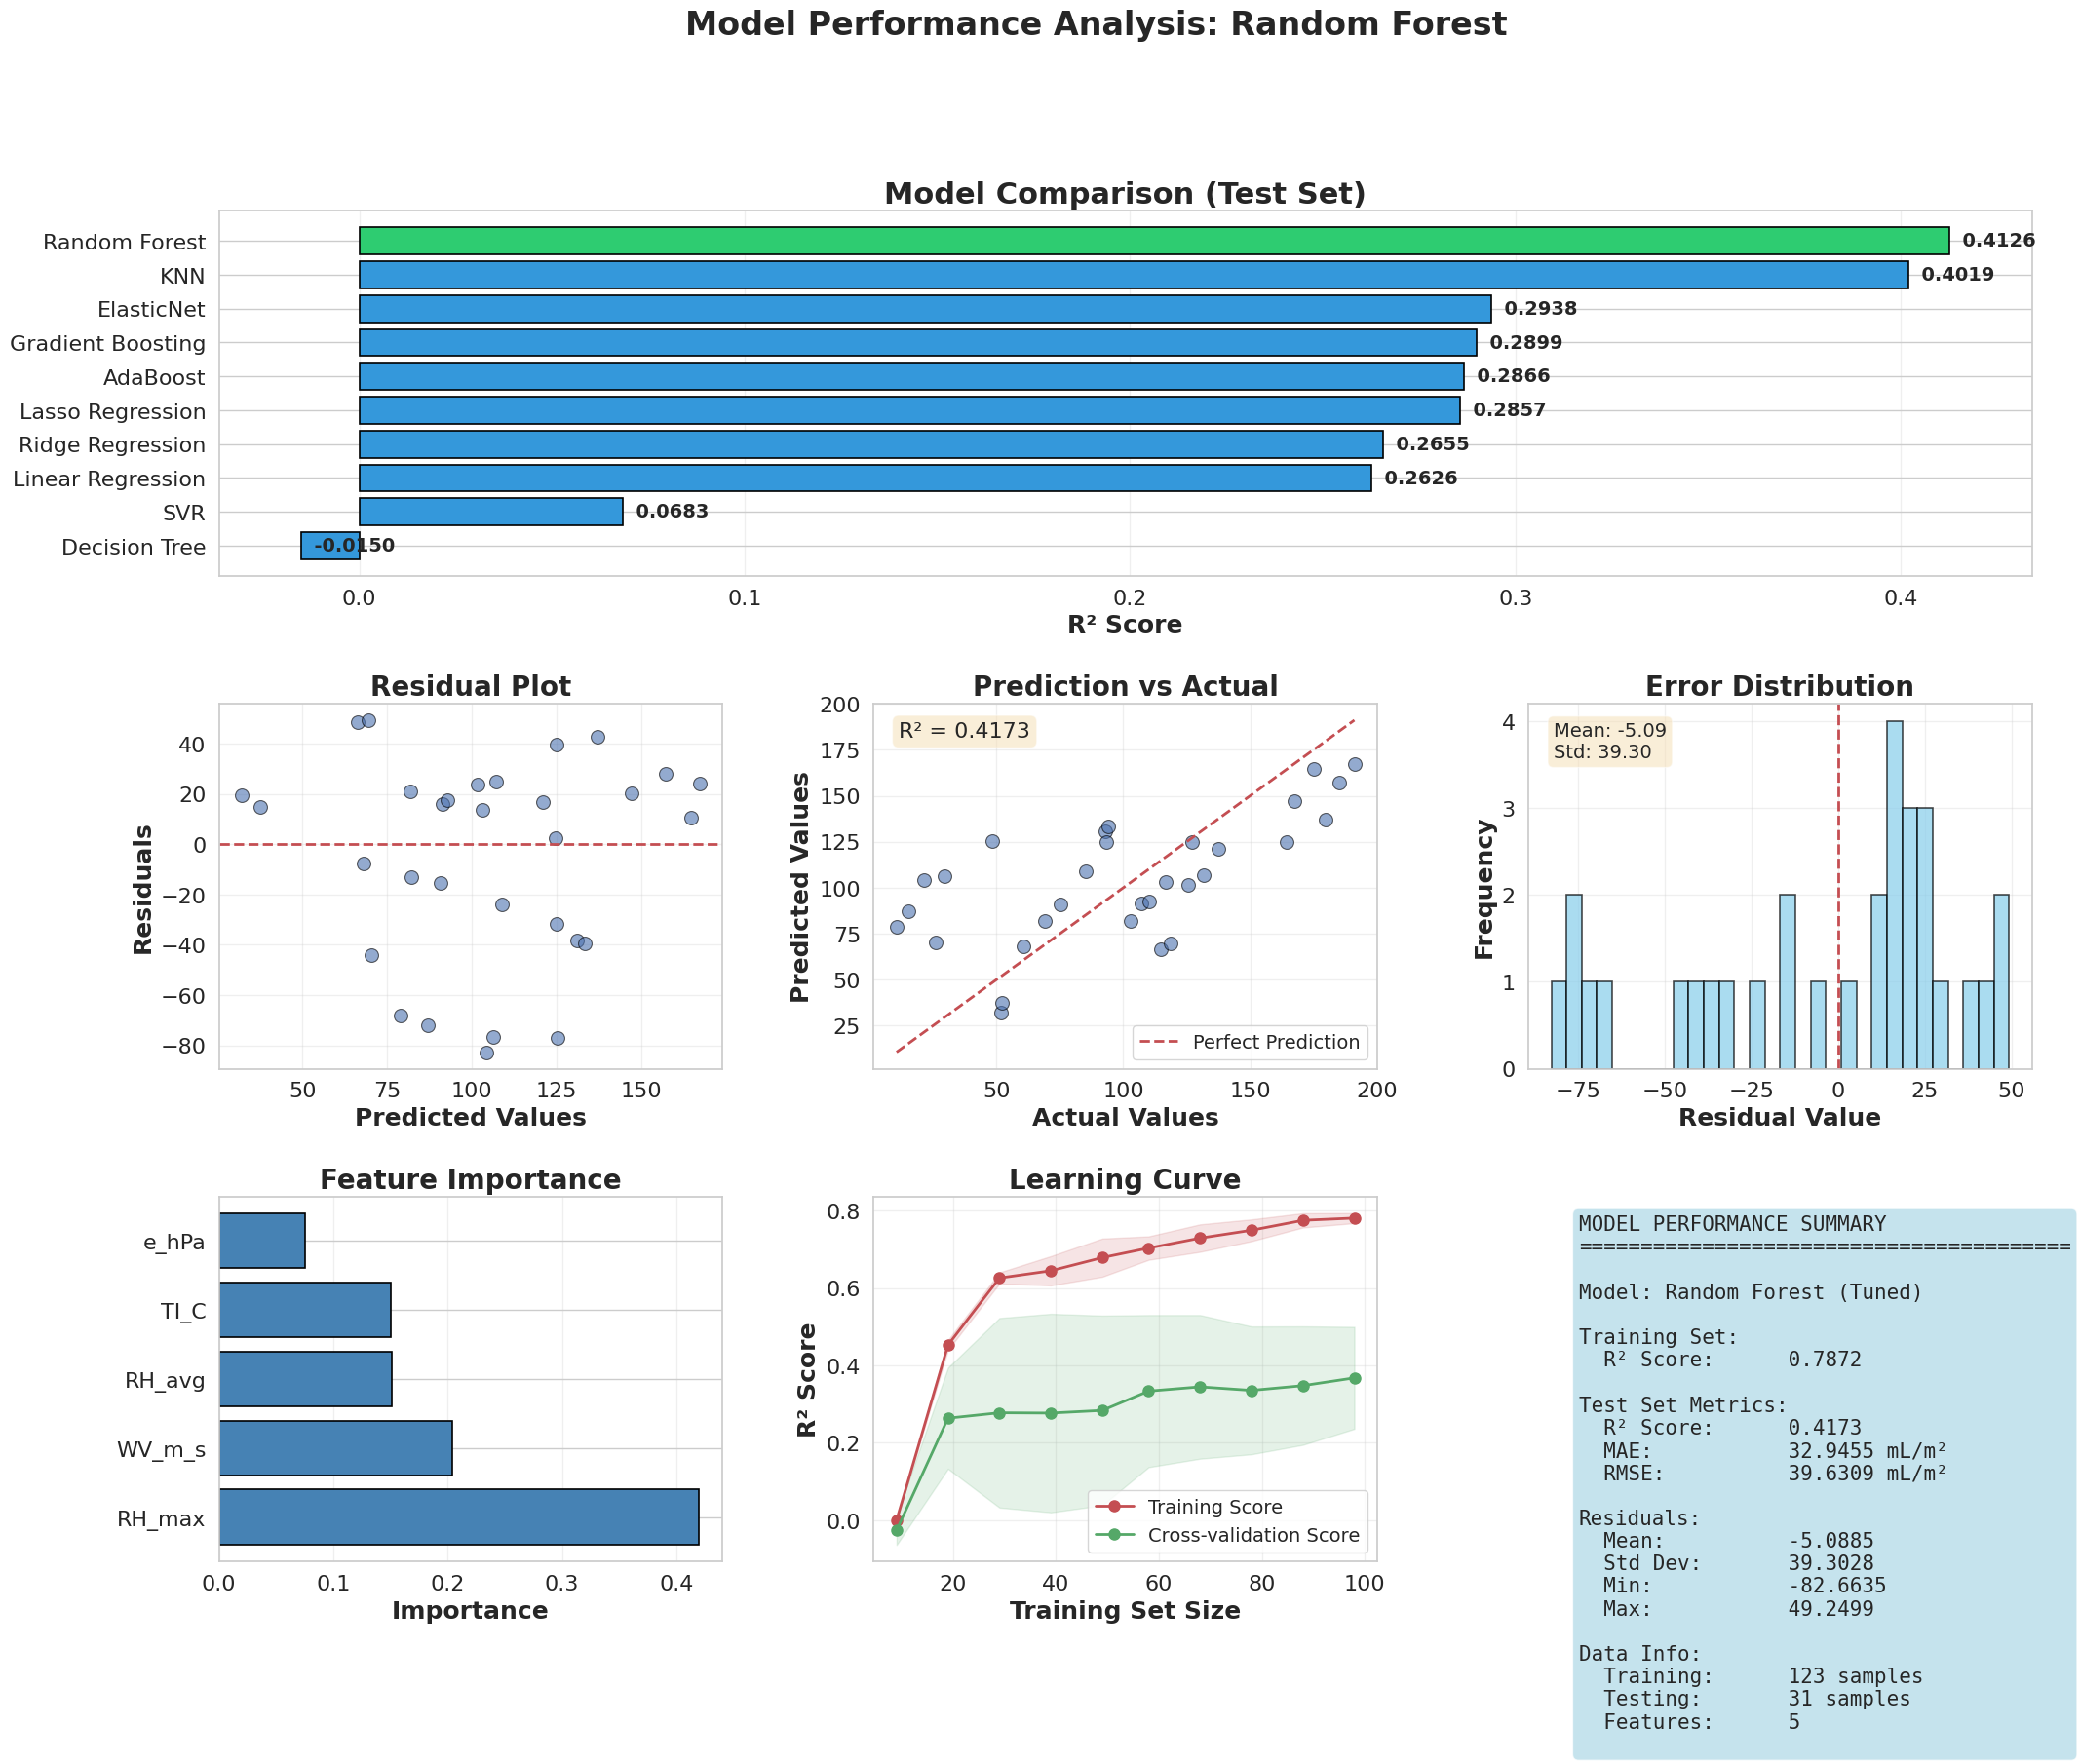

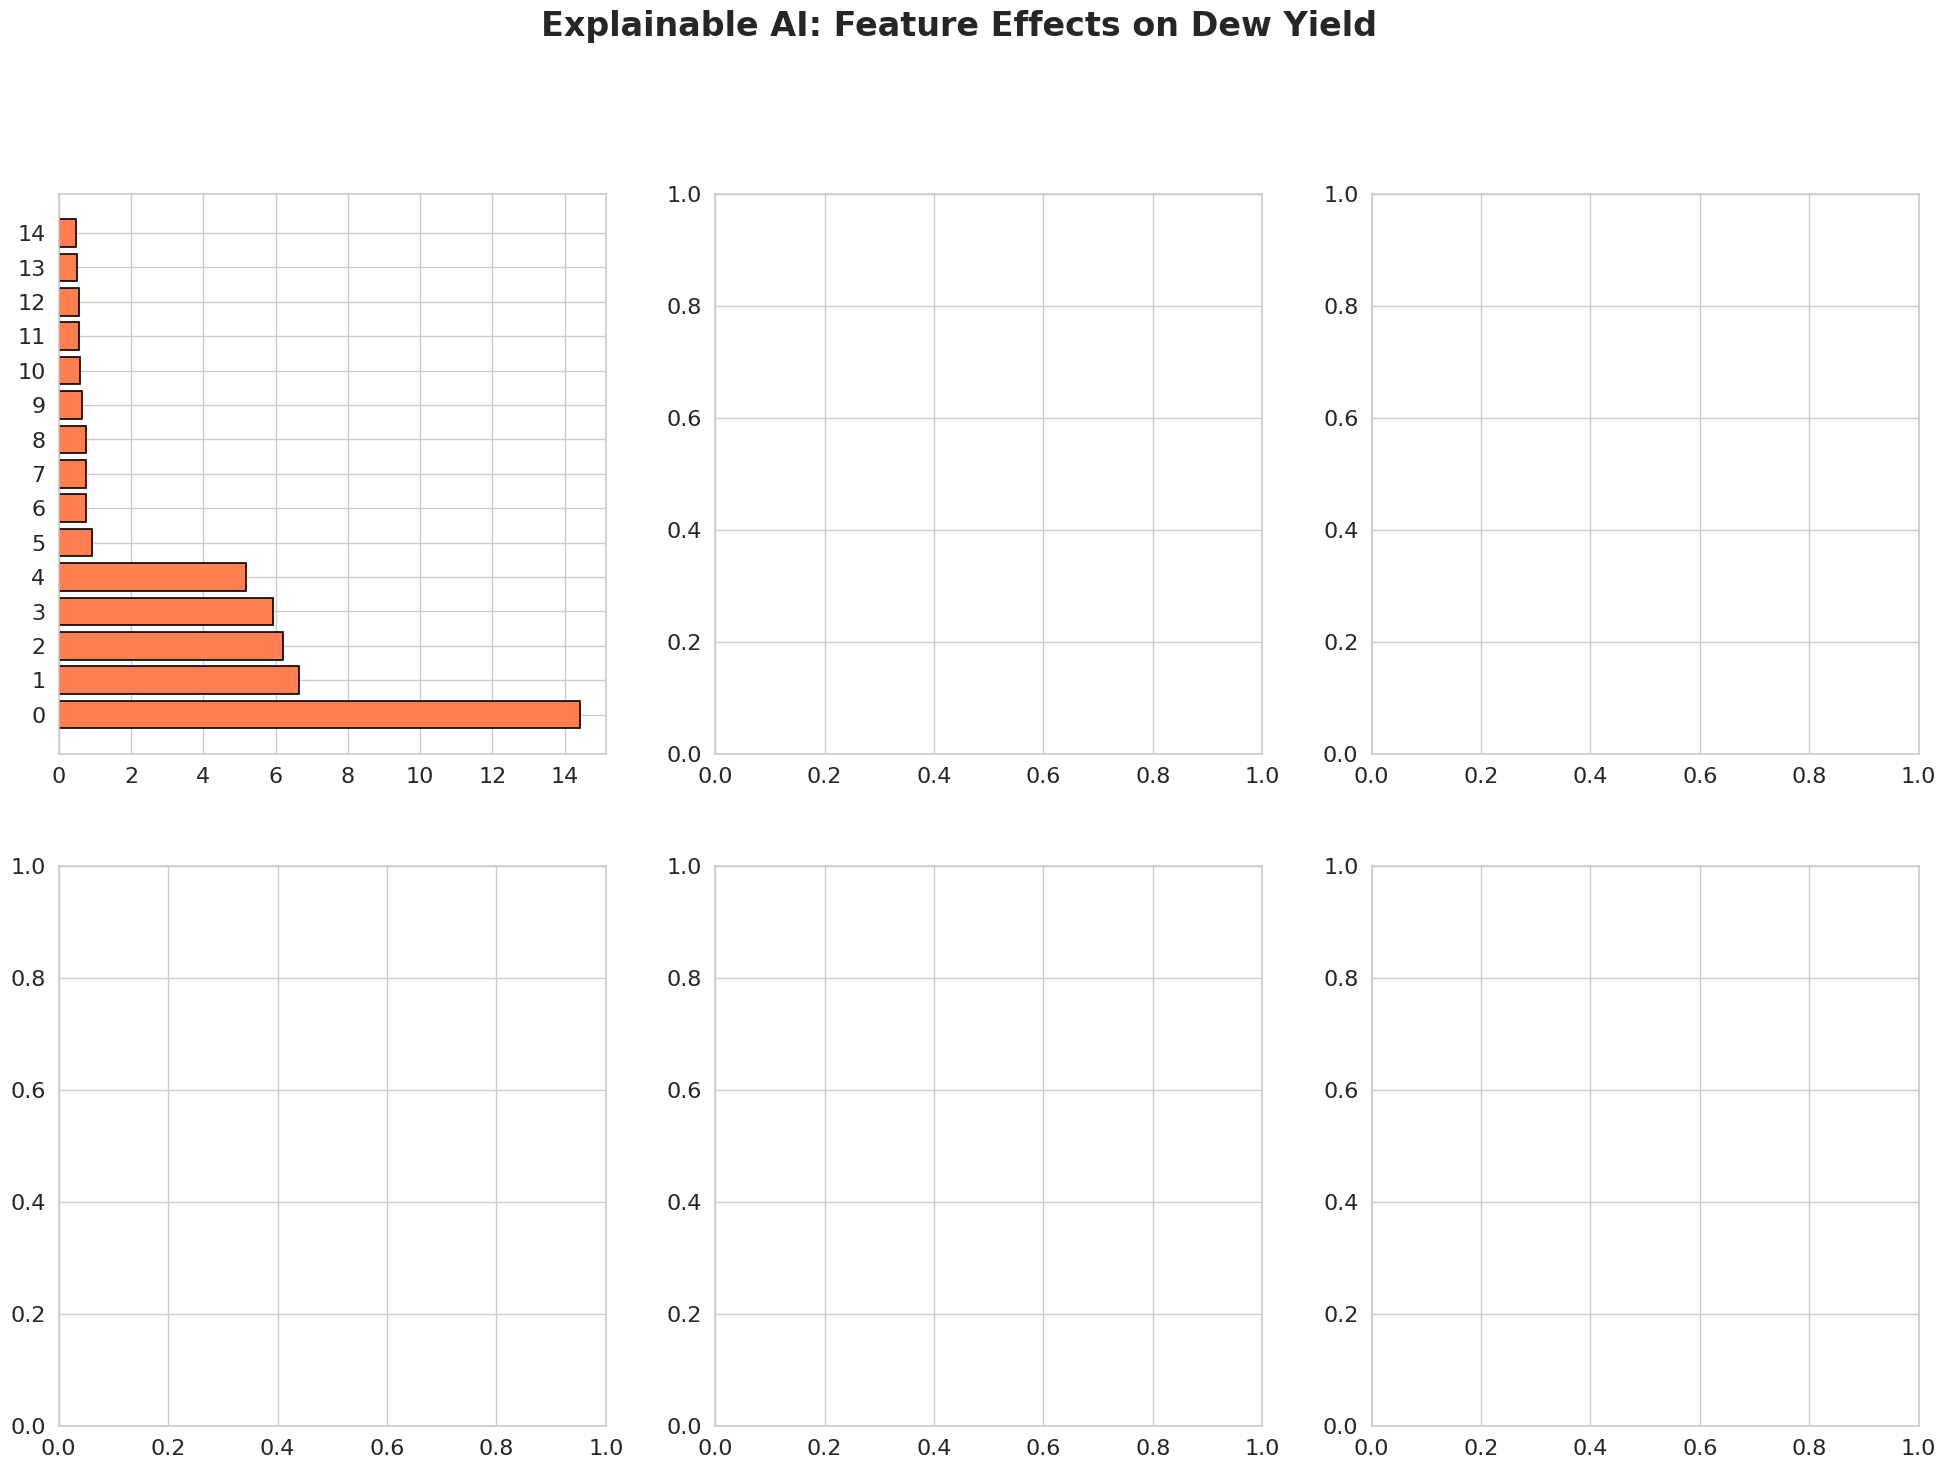

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import warnings

warnings.filterwarnings('ignore')

# Set style with increased font sizes
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

np.random.seed(42)

print("="*80)
print("STEP 1: GENERATING NONLINEAR SYNTHETIC DATASET")
print("="*80)

# --- 1. Data Generation Logic (From Previous Nonlinear Analysis) ---
table1_data = {
    '0-50':    {'N': 30, 'RH_max': (87.9, 6.3), 'RH_avg': (80.4, 9.8), 'e_hPa': (9.96, 3.43), 'TI_C': (3.9, 1.8), 'WV_m_s': (1.2, 0.6)},
    '51-100':  {'N': 47, 'RH_max': (88.4, 5.0), 'RH_avg': (81.2, 8.5), 'e_hPa': (11.34, 3.40), 'TI_C': (4.4, 1.6), 'WV_m_s': (1.2, 0.7)},
    '101-150': {'N': 51, 'RH_max': (90.8, 4.5), 'RH_avg': (85.7, 6.1), 'e_hPa': (11.09, 3.18), 'TI_C': (4.5, 1.3), 'WV_m_s': (1.0, 0.5)},
    '>150':    {'N': 26, 'RH_max': (92.4, 2.4), 'RH_avg': (85.0, 17.7), 'e_hPa': (13.02, 3.08), 'TI_C': (4.4, 0.9), 'WV_m_s': (0.9, 0.5)},
}

# Define Polynomial Models
x_means = np.array([25, 75, 125, 175])
model_rhmax = np.poly1d(np.polyfit(x_means, [87.9, 88.4, 90.8, 92.4], 2))
model_rhavg = np.poly1d(np.polyfit(x_means, [80.4, 81.2, 85.7, 85.0], 2))
model_e     = np.poly1d(np.polyfit(x_means, [9.96, 11.34, 11.09, 13.02], 3))
model_ti    = np.poly1d(np.polyfit(x_means, [3.9, 4.4, 4.5, 4.4], 2))
slope_wv_gen = -0.07

def generate_nonlinear_data(table_data):
    all_samples = []
    for efficiency_class, stats in table_data.items():
        n = stats['N']

        # Assign Dew Yield
        if efficiency_class == '0-50': low, high = 0, 50
        elif efficiency_class == '51-100': low, high = 51, 100
        elif efficiency_class == '101-150': low, high = 101, 150
        else: low, high = 151, 200
        yields = np.random.uniform(low, high, n)
        yields_sorted = np.sort(yields)

        # Generate Variables
        mu_rh, sd_rh = stats['RH_max']
        rh_max_raw = np.random.normal(mu_rh, sd_rh, n)
        rh_max_sorted = np.sort(rh_max_raw)

        mu_rhavg, sd_rhavg = stats['RH_avg']
        rhavg_final = model_rhavg(yields_sorted) + np.random.normal(0, sd_rhavg, n)

        mu_e, sd_e = stats['e_hPa']
        e_final = model_e(yields_sorted) + np.random.normal(0, sd_e, n)

        mu_ti, sd_ti = stats['TI_C']
        ti_final = model_ti(yields_sorted) + np.random.normal(0, sd_ti, n)

        mu_wv, sd_wv = stats['WV_m_s']
        wv_final = (stats['WV_m_s'][0] + slope_wv_gen * (rh_max_sorted - mu_rh)) + np.random.normal(0, stats['WV_m_s'][1] * 0.6, n)

        bucket_df = pd.DataFrame({
            'Efficiency_Class': efficiency_class,
            'Dew_Yield_mL_m2': yields_sorted, # Renamed to match training loop
            'RH_max': np.clip(rh_max_sorted, 0, 100),
            'RH_avg': np.clip(rhavg_final, 0, 100),
            'e_hPa': np.clip(e_final, 0, None),
            'TI_C': np.clip(ti_final, 0, None),
            'WV_m_s': np.clip(wv_final, 0, None)
        })
        bucket_df['RH_avg'] = np.minimum(bucket_df['RH_avg'], bucket_df['RH_max'])
        all_samples.append(bucket_df)

    return pd.concat(all_samples, ignore_index=True)

# Generate and prepare dataframe
df = generate_nonlinear_data(table1_data)
print(f"✓ Generated {len(df)} samples using Nonlinear Polynomial Mapping.")
df.to_csv('dew_data_nonlinear_training.csv', index=False)
print("✓ Saved generated dataset to 'dew_data_nonlinear_training.csv'")

print("\n" + "="*80)
print("STEP 2: COMPREHENSIVE ML MODEL TRAINING")
print("="*80)

# --- 2. Training Loop (Provided Code) ---

print("\n[1/7] Preparing data...")
# Dataset is already loaded in 'df'
feature_columns = ['RH_max', 'RH_avg', 'e_hPa', 'TI_C', 'WV_m_s']
target_column = 'Dew_Yield_mL_m2'

X = df[feature_columns].values
y = df[target_column].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✓ Data prepared:")
print(f"  - Training samples: {len(X_train)}")
print(f"  - Testing samples: {len(X_test)}")
print(f"  - Features: {len(feature_columns)}")

# Define models to compare
print("\n[2/7] Training multiple regression models...")
print("-" * 80)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf')
}

# Train and evaluate all models
results = []
trained_models = {}

for name, model in models.items():
    print(f"Training {name}...", end=' ')

    # Train model
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model

    # Cross-validation on training set
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5,
                                scoring='r2', n_jobs=-1)

    # Test set predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        'Model': name,
        'CV_R2_Mean': cv_scores.mean(),
        'CV_R2_Std': cv_scores.std(),
        'Test_R2': r2,
        'Test_MAE': mae,
        'Test_RMSE': rmse
    })

    print(f"✓ (R²={r2:.4f})")

results_df = pd.DataFrame(results).sort_values('Test_R2', ascending=False)

print("\n" + "="*80)
print("MODEL COMPARISON RESULTS")
print("="*80)
print(results_df.to_string(index=False))

# Select best model
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
best_r2 = results_df.iloc[0]['Test_R2']

print(f"\n✓ Best model: {best_model_name} (R² = {best_r2:.4f})")

# Hyperparameter tuning for best model
print(f"\n[3/7] Hyperparameter tuning for {best_model_name}...")

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'Ridge Regression':
    param_grid = {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
    }
elif best_model_name == 'SVR':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
        'epsilon': [0.01, 0.1, 0.2]
    }
else:
    param_grid = {}

if param_grid:
    grid_search = GridSearchCV(best_model, param_grid, cv=5,
                               scoring='r2', n_jobs=-1, verbose=0)
    grid_search.fit(X_train_scaled, y_train)
    tuned_model = grid_search.best_estimator_
    print(f"✓ Best parameters: {grid_search.best_params_}")
else:
    tuned_model = best_model
    print(f"✓ No hyperparameter tuning needed for {best_model_name}")

# Final predictions with tuned model
y_pred_train = tuned_model.predict(X_train_scaled)
y_pred_test = tuned_model.predict(X_test_scaled)

# Calculate final metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
residuals = y_test - y_pred_test

print("\n" + "="*80)
print("FINAL MODEL PERFORMANCE")
print("="*80)
print(f"\nModel: {best_model_name} (Tuned)")
print(f"\nTraining Set:")
print(f"  R² Score:      {train_r2:.4f}")
print(f"\nTest Set:")
print(f"  R² Score:      {test_r2:.4f}")
print(f"  MAE:           {test_mae:.4f} mL/m²")
print(f"  RMSE:          {test_rmse:.4f} mL/m²")
print(f"\nResiduals:")
print(f"  Mean:          {residuals.mean():.4f}")
print(f"  Std Dev:       {residuals.std():.4f}")

# Visualization
print("\n[4/7] Generating performance visualizations...")

fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# 1. Model Comparison
ax = fig.add_subplot(gs[0, :])
models_sorted = results_df.sort_values('Test_R2')
colors = ['#2ecc71' if m == best_model_name else '#3498db' for m in models_sorted['Model']]
ax.barh(models_sorted['Model'], models_sorted['Test_R2'], color=colors,
        edgecolor='black', linewidth=1.2)
ax.set_xlabel('R² Score', fontsize=18, fontweight='bold')
ax.set_title('Model Comparison (Test Set)', fontsize=22, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
for i, (idx, row) in enumerate(models_sorted.iterrows()):
    ax.text(row['Test_R2'], i, f"  {row['Test_R2']:.4f}",
            va='center', fontsize=14, fontweight='bold')

# 2. Residual Plot
ax = fig.add_subplot(gs[1, 0])
ax.scatter(y_pred_test, residuals, alpha=0.6, s=100, edgecolors='black', linewidth=0.8)
ax.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax.set_xlabel('Predicted Values', fontsize=18, fontweight='bold')
ax.set_ylabel('Residuals', fontsize=18, fontweight='bold')
ax.set_title('Residual Plot', fontsize=20, fontweight='bold')
ax.grid(True, alpha=0.3)

# 3. Prediction vs Actual
ax = fig.add_subplot(gs[1, 1])
ax.scatter(y_test, y_pred_test, alpha=0.6, s=100, edgecolors='black', linewidth=0.8)
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
ax.set_xlabel('Actual Values', fontsize=18, fontweight='bold')
ax.set_ylabel('Predicted Values', fontsize=18, fontweight='bold')
ax.set_title('Prediction vs Actual', fontsize=20, fontweight='bold')
ax.legend(fontsize=14)
ax.grid(True, alpha=0.3)
ax.text(0.05, 0.95, f'R² = {test_r2:.4f}', transform=ax.transAxes,
        fontsize=16, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 4. Error Distribution
ax = fig.add_subplot(gs[1, 2])
ax.hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black', linewidth=1.2)
ax.axvline(x=0, color='r', linestyle='--', linewidth=2)
ax.set_xlabel('Residual Value', fontsize=18, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=18, fontweight='bold')
ax.set_title('Error Distribution', fontsize=20, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.text(0.05, 0.95, f'Mean: {residuals.mean():.2f}\nStd: {residuals.std():.2f}',
        transform=ax.transAxes, fontsize=14, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 5. Feature Importance
ax = fig.add_subplot(gs[2, 0])
if hasattr(tuned_model, 'feature_importances_'):
    importances = tuned_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    ax.barh(range(len(importances)), importances[indices], color='steelblue',
            edgecolor='black', linewidth=1.2)
    ax.set_yticks(range(len(importances)))
    ax.set_yticklabels([feature_columns[i] for i in indices], fontsize=16)
    ax.set_xlabel('Importance', fontsize=18, fontweight='bold')
    ax.set_title('Feature Importance', fontsize=20, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
else:
    from sklearn.inspection import permutation_importance
    perm_importance = permutation_importance(tuned_model, X_test_scaled, y_test,
                                            n_repeats=10, random_state=42)
    importances = perm_importance.importances_mean
    indices = np.argsort(importances)[::-1]
    ax.barh(range(len(importances)), importances[indices], color='steelblue',
            edgecolor='black', linewidth=1.2)
    ax.set_yticks(range(len(importances)))
    ax.set_yticklabels([feature_columns[i] for i in indices], fontsize=16)
    ax.set_xlabel('Permutation Importance', fontsize=18, fontweight='bold')
    ax.set_title('Feature Importance', fontsize=20, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')

# 6. Learning Curve
ax = fig.add_subplot(gs[2, 1])
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    tuned_model, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='r2')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

ax.plot(train_sizes, train_mean, 'o-', color='r', linewidth=2,
        markersize=8, label='Training Score')
ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.15, color='r')
ax.plot(train_sizes, test_mean, 'o-', color='g', linewidth=2,
        markersize=8, label='Cross-validation Score')
ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 alpha=0.15, color='g')

ax.set_xlabel('Training Set Size', fontsize=18, fontweight='bold')
ax.set_ylabel('R² Score', fontsize=18, fontweight='bold')
ax.set_title('Learning Curve', fontsize=20, fontweight='bold')
ax.legend(fontsize=14, loc='best')
ax.grid(True, alpha=0.3)

# 7. Summary Statistics
ax = fig.add_subplot(gs[2, 2])
ax.axis('off')

summary_text = f"""MODEL PERFORMANCE SUMMARY
{'='*40}

Model: {best_model_name} (Tuned)

Training Set:
  R² Score:      {train_r2:.4f}

Test Set Metrics:
  R² Score:      {test_r2:.4f}
  MAE:           {test_mae:.4f} mL/m²
  RMSE:          {test_rmse:.4f} mL/m²

Residuals:
  Mean:          {residuals.mean():.4f}
  Std Dev:       {residuals.std():.4f}
  Min:           {residuals.min():.4f}
  Max:           {residuals.max():.4f}

Data Info:
  Training:      {len(X_train)} samples
  Testing:       {len(X_test)} samples
  Features:      {len(feature_columns)}
"""

ax.text(0.1, 0.95, summary_text, transform=ax.transAxes,
        fontsize=15, verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

fig.suptitle(f'Model Performance Analysis: {best_model_name}',
             fontsize=24, fontweight='bold', y=0.995)

plt.tight_layout()
plt.savefig('model_performance_sklearn.png', dpi=150, bbox_inches='tight')
print("✓ Performance visualizations saved")

# EXPLAINABLE AI with InterpretML
print("\n[5/7] Training Explainable Boosting Machine (InterpretML)...")

try:
    from interpret.glassbox import ExplainableBoostingRegressor
    from interpret import show

    # Train EBM model
    ebm = ExplainableBoostingRegressor(random_state=42, n_jobs=-1)
    ebm.fit(X_train, y_train)  # EBM doesn't require scaling

    # Evaluate EBM
    ebm_pred_train = ebm.predict(X_train)
    ebm_pred_test = ebm.predict(X_test)
    ebm_train_r2 = r2_score(y_train, ebm_pred_train)
    ebm_test_r2 = r2_score(y_test, ebm_pred_test)
    ebm_mae = mean_absolute_error(y_test, ebm_pred_test)
    ebm_rmse = np.sqrt(mean_squared_error(y_test, ebm_pred_test))

    print(f"✓ EBM Model trained successfully")
    print(f"  Training R²: {ebm_train_r2:.4f}")
    print(f"  Test R²:     {ebm_test_r2:.4f}")
    print(f"  MAE:         {ebm_mae:.4f} mL/m²")
    print(f"  RMSE:        {ebm_rmse:.4f} mL/m²")

    print("\n[6/7] Generating explainability visualizations...")

    # Create feature effect plots
    fig, axes = plt.subplots(2, 3, figsize=(24, 16))
    fig.suptitle('Explainable AI: Feature Effects on Dew Yield',
                 fontsize=24, fontweight='bold', y=0.995)

    # Feature importance
    ax = axes[0, 0]
    feature_importance = ebm.term_importances()
    sorted_idx = np.argsort(feature_importance)[::-1]
    ax.barh(range(len(feature_importance)), feature_importance[sorted_idx],
            color='coral', edgecolor='black', linewidth=1.2)
    ax.set_yticks(range(len(feature_importance)))
    ax.set_yticklabels([feature_columns[i] for i in sorted_idx], fontsize=16)
    ax.set_xlabel('Importance Score', fontsize=18, fontweight='bold')
    ax.set_title('EBM Feature Importance', fontsize=20, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')

    # Individual feature effects
    for idx, feature_idx in enumerate(sorted_idx[:5]):
        row = (idx + 1) // 3
        col = (idx + 1) % 3
        ax = axes[row, col]

        feature_name = feature_columns[feature_idx]
        feature_data = ebm.explain_global().data(feature_idx)

        if 'scores' in feature_data and 'values' in feature_data:
            scores = feature_data['scores']
            values = feature_data['values']

            ax.plot(values, scores, linewidth=3, color='darkblue')
            ax.fill_between(values, scores, alpha=0.3, color='lightblue')
            ax.axhline(y=0, color='r', linestyle='--', linewidth=2, alpha=0.7)
            ax.set_xlabel(feature_name, fontsize=18, fontweight='bold')
            ax.set_ylabel('Effect on Prediction', fontsize=18, fontweight='bold')
            ax.set_title(f'{feature_name} Effect', fontsize=20, fontweight='bold')
            ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('explainable_ai_analysis.png', dpi=150, bbox_inches='tight')
    print("✓ Explainability visualizations saved")

    # Generate interactive dashboards
    print("\n[7/7] Generating interactive explainability dashboards...")
    # ebm_global = ebm.explain_global()
    # show(ebm_global)
    # print("✓ Global explanation dashboard opened")
    print("Note: Interactive 'show()' skipped in script mode.")

    # Model comparison
    print("\n" + "="*80)
    print("MODEL COMPARISON SUMMARY")
    print("="*80)
    print(f"\nBest Sklearn Model ({best_model_name}):")
    print(f"  Training R²: {train_r2:.4f}")
    print(f"  Test R²:     {test_r2:.4f}")
    print(f"  MAE:         {test_mae:.4f} mL/m²")
    print(f"  RMSE:        {test_rmse:.4f} mL/m²")

    print(f"\nExplainable Boosting Machine (EBM):")
    print(f"  Training R²: {ebm_train_r2:.4f}")
    print(f"  Test R²:     {ebm_test_r2:.4f}")
    print(f"  MAE:         {ebm_mae:.4f} mL/m²")
    print(f"  RMSE:        {ebm_rmse:.4f} mL/m²")

    if ebm_test_r2 > test_r2:
        print(f"\n✓ EBM provides better performance (+{(ebm_test_r2-test_r2)*100:.2f}% R²)")
        print("  with full explainability!")
    else:
        print(f"\n✓ {best_model_name} provides better performance")
        print(f"  (+{(test_r2-ebm_test_r2)*100:.2f}% R²)")

except ImportError:
    print("⚠ InterpretML not installed. Run: pip install interpret")
    print("  Skipping explainability analysis...")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)
print("\nGenerated Files:")
print("  1. dew_data_nonlinear_training.csv - The dataset used")
print("  2. model_performance_sklearn.png - Model performance visualizations")
if 'ebm' in locals():
    print("  3. explainable_ai_analysis.png - Feature effect plots")
print("\n✓ All analysis complete!")
print("="*80)